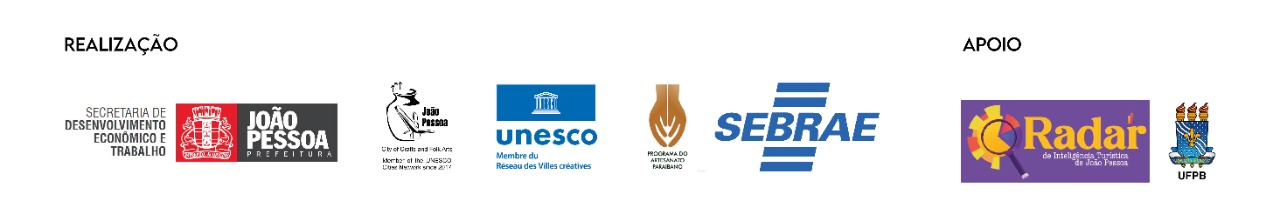

# Análise da Oferta de Artesanato na Paraíba 2022

```Autor: Flávio Macaúbas Torres Filho - UFPB (Labimec)```

```Email: flaviomacaubas@gmail.com```

[Linkedin](https://www.linkedin.com/in/fl%C3%A1vio-maca%C3%BAbas-630143143/)


## Do que se trata este documento?

A presente análise destina-se a identificar as principais características do artesãos(ãs) da cidade de João Pessoa. As informações foram coletadas no mês de janeiro do ano 2022, a partir da aplicação de três questionários sobre Oferta Artesanal, Visitantes Turistas e Visitantes Locais.

A equipe de pesquisa é composta pela Prefeitura Municipal de João Pessoa, Unesco, Programa do Artesanato Paraíbano, SEBRAE, Radar e UFPB. 

Foi efetuado um processo de limpeza dos dados para garantir consistência nas informações, um detalhamento mais minuncioso dos processos transcorridos nessa etapa podem ser encontrados nos links listados abaixo. Assim como, vinculado a esta análise estão os dados pós-processados e os scripts utilizados para este fim. Destaca-se ainda que em decorrência da quantidade de respostas, uma parcela considerável do procedimento de limpeza foi realizado diretamente no *Google Sheets*.


Detalhamento do pré-processamento das respostas dos questionários:

[Limpeza Oferta Artesanal](https://docs.google.com/document/d/1rAhrYfnl47qwHYagN2bblDwvtjVRbgHuBjNZTNJ0Iis/edit?usp=sharing)

[Limpeza Demanda Local](https://docs.google.com/document/d/1F8BcG0cu3uy6Lnxo_HG8cvg8PuV9i2Ewt_4N9mm0dDg/edit?usp=sharing)

[Limpeza Demanda Turista](https://docs.google.com/document/d/10HpInqpiq5yJrF0pqnVCCmuRGKwrdHP_PX9kt6oKEKc/edit?usp=sharing)

Complementarmente, ajustes via código foram feitos a partir do script abaixo:

[Ajuste dos dados](https://github.com/FlavioMacaubas/Portfolio/blob/5a77a8891b819f547cf74cdfd1adbcc452e5f81d/ArtesanatoPB/Ajuste_Dados.ipynb)

Os mapas foram construídos no R, conforme o detalhamento abaixo:

[Mapas](https://github.com/FlavioMacaubas/Portfolio/blob/5f494603fdd3dd75f5988b347fecc92bef6bf440/ArtesanatoPB/Mapas.R)


In [1]:
#@title Instalações de pacotes necessários
#!pip install squarify

In [2]:
#@title Importação dos pacotes e importação da base

# Bibliotecas utilizadas
import pandas as pd # Manipulação de planilhas
import numpy as np # Manipulações matemáticas
from os.path import join # Cria paths 

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from matplotlib import lines
from matplotlib import patches
from wordcloud import WordCloud

# Manuseio de imagens
from IPython.display import Image
from IPython.core.display import HTML 

# Processamento de texto
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Path arquivos
path_limpos = 'C:/Users/Macaubas/Desktop/Python/Labimec/Artesanato/Dados/Limpos'

# Leitura dos dados
df = pd.read_csv(join(path_limpos, "oferta_artesanal_pb_2022_limpo.csv"), index_col = False)
demanda_local = pd.read_csv(join(path_limpos, "DEMANDA_LOCAL_LIMPO.csv"), index_col = False)
demanda_turista = pd.read_csv(join(path_limpos, "DEMANDA_TURISTA_LIMPO.csv"), index_col = False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Macaubas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
#@title Variáveis globais
# Variáveis globais
STOP_WORD_PT = [pal.upper() for pal in stopwords.words('portuguese')]

In [4]:
#@title

# Configurações globais para plotagem
sns.set_style('whitegrid') # background
sns.set_context('paper') # Formato artigo
sns.set_palette('deep') 

# Ajusta imagem no aspect/ratio
plt.tight_layout()

# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 15,
              'figure.figsize': (15,7), # Largura e altura
              'axes.labelsize': 'x-large', 
              'axes.titlesize':'x-large',
              'xtick.labelsize':'x-large',
              'ytick.labelsize':'x-large'}

# Atualiza os padrões que defini acima
plt.rcParams.update(parametros)

<Figure size 432x288 with 0 Axes>

In [5]:
## Funções de facilitação

# Template dos gráficos
def template_grafico(TITULO:str,
                     SUB_TITULO:str, 
                     FONTE = 'Fonte: Elaboração própria a partir dos dados coletados.', 
                     AUTOR = "Flávio Macaúbas (Labimec)"
                    ):
    
    barra_1 = fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color="#E3120B", solid_capstyle="butt"))
    barra_2 = fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color="#E3120B"))

    
    # Título
    titulo_template = fig.text(
        0, 0.935, TITULO, 
        fontsize=22, fontweight="bold"
        )

    # Sub título
    subtitulo_template = fig.text(
        0, 0.90, SUB_TITULO, 
        fontsize=20
        )

    # Fonte
    fonte_template = fig.text(
        0, 0.03, FONTE, color="#a2a2a2", 
        fontsize=14
      )

    # Autor
    autor_template = fig.text(
        0, 0.005, "Flávio Macaúbas (Labimec)", color="#a2a2a2",
        fontsize=16
      )
    
    return barra_1, barra_2, titulo_template, subtitulo_template, fonte_template, autor_template
    
    


## Quem é o artesão(ã)? - OFERTA

### Perfil Cultural

> Maior parcela dos artesãos vivem em JOÃO PESSOA e possuem em média 55 anos.

A maioria dos artesão vivem em **João Pessoa (57,14%)**, seguidos por Campina Grande com (9,24%) e Cabedelo (6,72%). Este resultado é esperado dado que o questionário foi aplicado no Salão de Artesanato de João Pessoa.

Apesar da predominância de João Pessoa, os artesãos estão aqui a **menos tempo** quando comparados a outros municípios do estado. Algumas pessoas moram a vida inteira na sua cidade de origem que não é capital, como nos casos de Ingá, Boa Vista e Itabaiana.

A média de idade dos artesãos é de **55 anos**, indicando que é um ofício que pode não estar atraindo um público mais jovem. Por outro lado, é possível que o tempo necessário para profissionalizar essa atividade seja consideravelmente mais elevado do que os demais setores. Na Tabela 1 também podemos verificar que a média de idade dos artesãos que vivem em João Pessoa é de 56, 1 ano acima da média geral.

> Tabela 1 - Informações sobre município que os artesãos vivem, há quanto tempo e idade média.


|                 |   Qnt |   Participação |   Média de anos na cidade |   Média Idade |   Diferença |
|:----------------|------:|---------------:|--------------------------:|--------------:|------------:|
| JOÃO PESSOA     |    68 |          57.14 |                        31 |            56 |          25 |
| CAMPINA GRANDE  |    11 |           9.24 |                        41 |            58 |          17 |
| CABEDELO        |     8 |           6.72 |                        32 |            56 |          24 |
| NOVA PALMEIRA   |     4 |           3.36 |                        46 |            52 |           6 |
| PITIMBU         |     3 |           2.52 |                        43 |            59 |          16 |
| SANTA RITA      |     2 |           1.68 |                        11 |            69 |          58 |
| REMÍGIO         |     2 |           1.68 |                        42 |            52 |          10 |
| SERRA BRANCA    |     2 |           1.68 |                        41 |            61 |          20 |
| BAYEUX          |     2 |           1.68 |                        27 |            38 |          11 |
| AREIA           |     2 |           1.68 |                        34 |            44 |          10 |
| JUAREZ TÁVORA   |     2 |           1.68 |                        60 |            73 |          13 |
| BEZERROS        |     1 |           0.84 |                        24 |            25 |           1 |
| BAIA DA TRAIÇÃO |     1 |           0.84 |                        19 |            22 |           3 |
| LAGOA SECA      |     1 |           0.84 |                         5 |            25 |          20 |
| CAAPORÃ         |     1 |           0.84 |                        26 |            64 |          38 |
| INGÁ            |     1 |           0.84 |                        60 |            60 |           0 |
| ALAGOA NOVA     |     1 |           0.84 |                        50 |            70 |          20 |
| CONDE           |     1 |           0.84 |                         3 |            63 |          60 |
| ZABELÊ          |     1 |           0.84 |                        54 |            57 |           3 |
| BOA VISTA       |     1 |           0.84 |                        55 |            55 |           0 |
| ITABAIANA       |     1 |           0.84 |                        49 |            49 |           0 |
| CABACEIRAS      |     1 |           0.84 |                        38 |            41 |           3 |
| TAPEROÁ         |     1 |           0.84 |                        22 |            23 |           1 |
| GURJÃO          |     1 |           0.84 |                        32 |            39 |           7 |



In [6]:
#@title
media_tempo_vivem = df.groupby('1_1_CIDADE_ONDE_VIVE')['1_2_HA_QUANTO_TEMPO']
media_idade = df.groupby('1_1_CIDADE_ONDE_VIVE')['IDADE']

sumario_1 = pd.concat([df['1_1_CIDADE_ONDE_VIVE'].value_counts(),
                           round(df['1_1_CIDADE_ONDE_VIVE'].value_counts(normalize=True).mul(100),2),
                           round(media_tempo_vivem.mean()),
                           round(media_idade.mean()),
                           round(media_idade.mean()) - round(media_tempo_vivem.mean())], 
                           axis = 1, keys = ('Qnt', 
                                             'Participação', 
                                             'Média de anos na cidade', 
                                             'Média Idade', 
                                             'Diferença'))

## Resultado utilizado no markdown
#print(sumario_1.to_markdown())


> Maior parte dos artesãos(ãs) possuem nível **MÉDIO COMPLETO**

Uma parcela considerável das pessoas entrevistadas possuem nível Superior Completo. Logo atrás está os de nível Fundamental, tanto incompleto, quanto incompleto. Apesar desse indicador ser importante para análise, destacamos que ele não captura a habilidade em ofício dos artesãos, que muitas vezes é repassado por familiares.

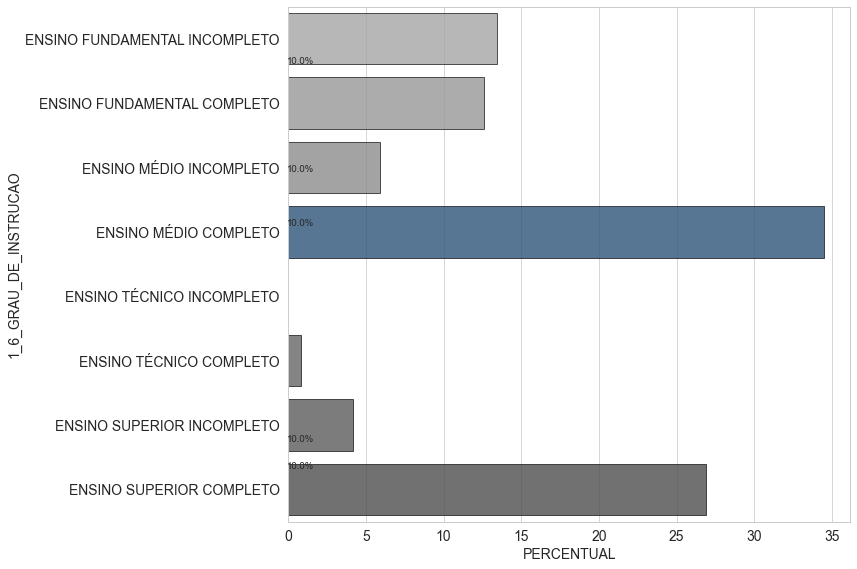

<Figure size 1080x504 with 0 Axes>

In [103]:
#@title

# Agrupando e calculando contadores
formacao = df.loc[df['1_6_GRAU_DE_INSTRUCAO'] != 'NAN']
formacao = formacao.groupby('1_6_GRAU_DE_INSTRUCAO').agg({'1_6_GRAU_DE_INSTRUCAO':'count'})
formacao['PERCENTUAL'] = formacao['1_6_GRAU_DE_INSTRUCAO']*100/119 # Colocando em percentual
formacao = formacao.sort_values('PERCENTUAL')

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, 10)))

# Cor em destaque
colors[3] = '#215584'

# Gráfico de contagem
ax = sns.barplot(y = formacao.index,
                 x = formacao['PERCENTUAL'], 
                 palette=colors,
                 order = ['ENSINO FUNDAMENTAL INCOMPLETO',
                       'ENSINO FUNDAMENTAL COMPLETO',
                       'ENSINO MÉDIO INCOMPLETO',
                       'ENSINO MÉDIO COMPLETO',
                       'ENSINO TÉCNICO INCOMPLETO',
                       'ENSINO TÉCNICO COMPLETO',
                       'ENSINO SUPERIOR INCOMPLETO',
                       'ENSINO SUPERIOR COMPLETO'],
                   alpha = 0.8,
                   edgecolor='black')


# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True);

template_grafico(TITULO = "A maior parte dos entrevistado possuem nível Médio", 
                 SUB_TITULO = "Apesar da boa representação daqueles que têm nível Superior")

ax;

In [8]:
formacao

1_6_GRAU_DE_INSTRUCAO  PERCENTUAL
1_6_GRAU_DE_INSTRUCAO                                           
ENSINO TÉCNICO COMPLETO                            1    0.840336
ENSINO MÉDIO COMPLETO.                             2    1.680672
ENSINO SUPERIOR INCOMPLETO                         5    4.201681
ENSINO MÉDIO INCOMPLETO                            7    5.882353
ENSINO FUNDAMENTAL COMPLETO                       15   12.605042
ENSINO FUNDAMENTAL INCOMPLETO                     16   13.445378
ENSINO SUPERIOR COMPLETO                          32   26.890756
ENSINO MÉDIO COMPLETO                             41   34.453782

> O aprendizado do ofício ocorre principalmente a partir de **PARENTES** e do **AUTODITATISMO**


Parentes e autodidatismo representam respectivamente 35,29% e 29,41%, juntos representam 64,7% das respostas dos entrevistado. Logo atrás estão Cursos (10%) e Amigos (8,4%), a menor taxa de resposta encontre-se na Internet (2,52%) e nas Igrejas (0,84%). 

|            |   Aprendizado do Ofício                     |
|:-----------|---------------------------------------------:|
| PARENTES   |                                        35.29 |
| AUTODIDATA |                                        29.41 |
| CURSO      |                                        10.08 |
| AMIGOS     |                                         8.4 |
| VIZINHOS   |                                         5.04 |
| ESCOLA     |                                         3.36 |
| TUTOR      |                                         2.52 |
| GOVERNO    |                                         2.52 |
| INTERNET   |                                         2.52 |
| IGREJA     |                                         0.84 |

O resultado da Internet causa estranheza, dado a disponibilidade de material. Por outro lado, é possível que no artesanato há uma predominância de tarefas manuais, indicando que a modalidade remota satisfaça os interesses dos entrevistados.

Destaca-se ainda que em decorrência da elavada média de idade (55 anos), é possível que os entrevistados não saibam como procurar por suas necessidades de forma adequada na internet.

In [9]:
#@title
#round((df['1_9_COM_QUEM,_OU_ONDE,_APRENDEU_ARTESANATO'].value_counts(normalize=True)*100),2).to_markdown()

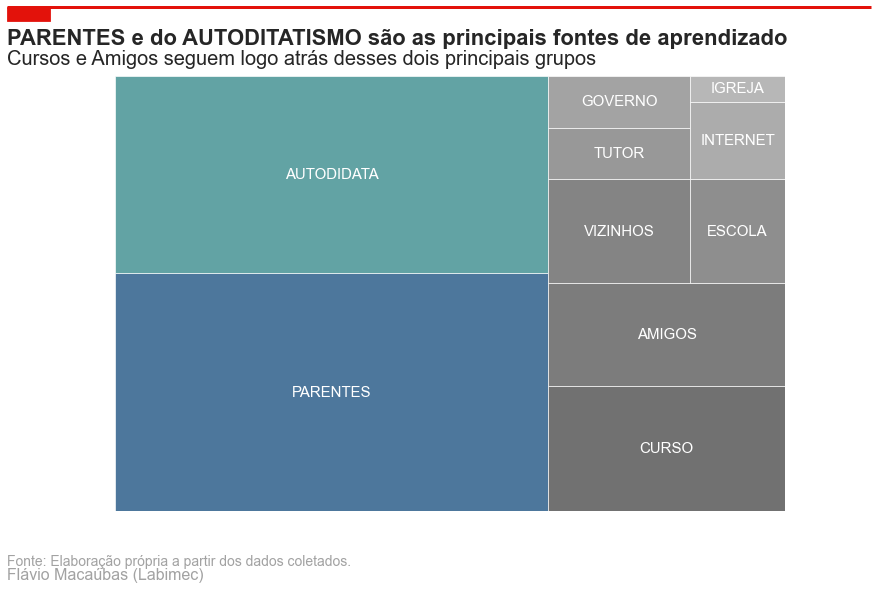

In [10]:
#@title

# Informações
info_aprendizado_oficio = df['1_9_COM_QUEM,_OU_ONDE,_APRENDEU_ARTESANATO'].value_counts()

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 10)))

# Cor em destaque
colors[0] = '#215584'
colors[1] = '#3b8c8e'
 
# Paleta de cores
pal = sns.color_palette('crest', 10)
pal = list(pal.as_hex())

# Gráfico
squarify.plot(sizes=info_aprendizado_oficio.values, 
              label=info_aprendizado_oficio.index, 
              alpha=.8,
              color = colors,
              text_kwargs={'fontsize':15, 'color': 'white'});

# Estética
template_grafico(TITULO = "PARENTES e do AUTODITATISMO são as principais fontes de aprendizado", 
                 SUB_TITULO = "Cursos e Amigos seguem logo atrás desses dois principais grupos")

plt.axis('off');

#plt.savefig("Graficos/artesao_aprendizado.png", dpi=1200, bbox_inches = "tight");
plt.show();

> A maioria dos artesãos já **ENSINARAM** seu ofício a alguém.

Cerca de 21% dos entrevistado relataram que já ensinaram entre 1-5 pessoas, uma parte considerável (16%) responderam que já ensinaram mais de 100 pessoas. Muitas dessas pessoas também informaram que realizaram cursos, ensinando pessaos desses ofício, em outras palavras, a maioria dos entrevistados tem algum tipo de familiaridade com tutoria.

<AxesSubplot:xlabel='Percentual (%)'>

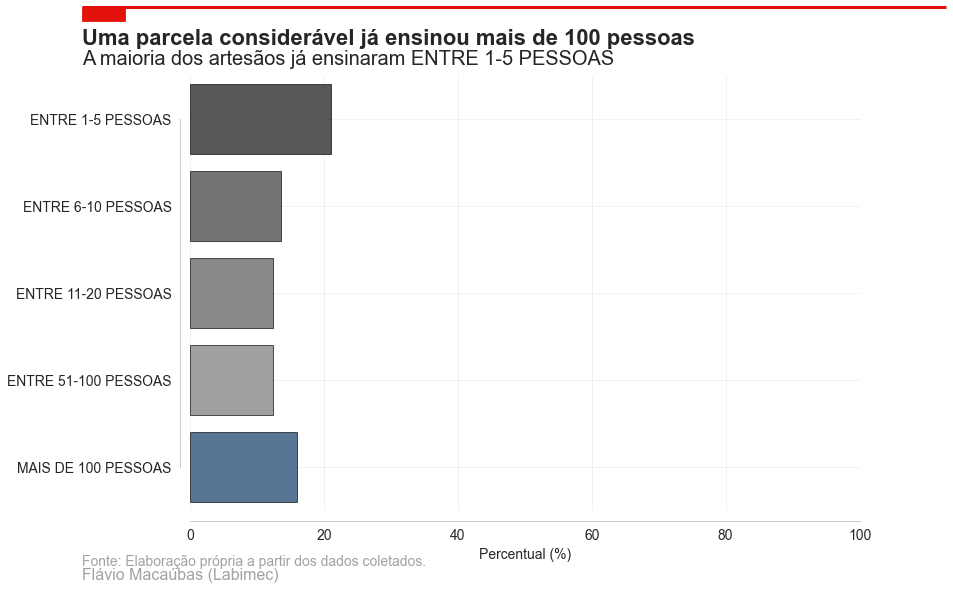

In [11]:
#@title


# Agrupando e calculando contadores
alunos = df.loc[df['2_10_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUANTAS_PESSOAS_VOCE_JA_ENSINOU'] != 'NAN']
alunos = alunos.groupby('2_10_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUANTAS_PESSOAS_VOCE_JA_ENSINOU').agg({'2_10_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUANTAS_PESSOAS_VOCE_JA_ENSINOU':'count'})
alunos['PERCENTUAL'] = alunos['2_10_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUANTAS_PESSOAS_VOCE_JA_ENSINOU']*100/81 # Colocando em percentual
alunos = alunos.sort_values('PERCENTUAL')

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[-1] = '#215584'

# Gráfico de contagem
ax = sns.barplot(y=alunos.index, 
                 x = alunos['PERCENTUAL'],
                 palette=colors,
                 order = ['ENTRE 1-5 PESSOAS',
                       'ENTRE 6-10 PESSOAS',
                       'ENTRE 11-20 PESSOAS',
                       'ENTRE 51-100 PESSOAS',
                       'MAIS DE 100 PESSOAS'],
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True);

template_grafico(TITULO = "Uma parcela considerável já ensinou mais de 100 pessoas", 
                 SUB_TITULO = "A maioria dos artesãos já ensinaram ENTRE 1-5 PESSOAS")

ax

#plt.savefig("Graficos/artesao_ensinou.png", dpi=1200, bbox_inches = "tight");

Sabemos que os artesãos estão familiarizados com ensino, porém, mais de metade revelou nunca ter feito nenhum curso de artes. Trata-se de um resultado esperado pois o artesanato tem forte vínculos parentais/familiares que são passados de geração em geração.

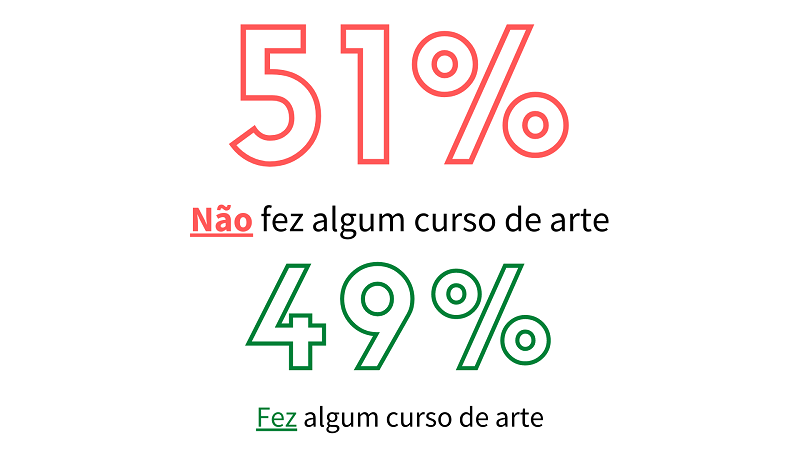

In [12]:
#@title
sumario_2 = pd.concat([df['1_7_JA_FEZ_ALGUM_CURSO_DE_ARTES'].value_counts(),
                           round(df['1_7_JA_FEZ_ALGUM_CURSO_DE_ARTES'].value_counts(normalize=True).mul(100),2)], 
                           axis = 1, keys = ('Qnt', 'Percentual'))


#sumario_2

> A maioria dos artesãos possuem **MAIS DE 20 ANOS** de experiência

Cerca de 90% dos entrevistados possuem mais de 5 anos de experiência no ofício, o que explica, em parte, a razão de muitos deles terem ensinado alguém no decorrer de sua carreira.

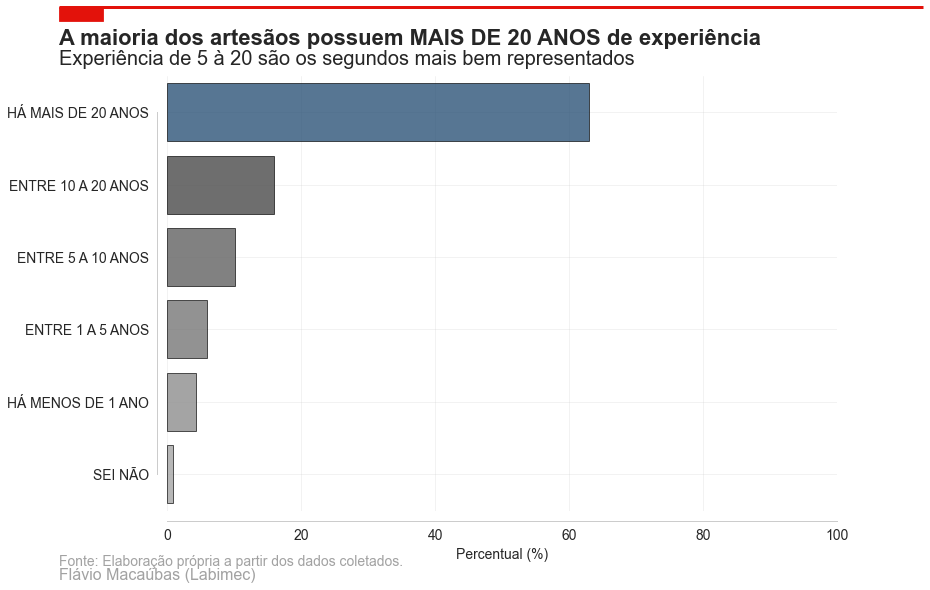

In [13]:
#@title


# Agrupando e calculando contadores
experiencia = df.loc[df['1_10_HA_QUANTO_TEMPO_FAZ_ARTESANATO'] != 'NAN']
experiencia = experiencia.groupby('1_10_HA_QUANTO_TEMPO_FAZ_ARTESANATO').agg({'1_10_HA_QUANTO_TEMPO_FAZ_ARTESANATO':'count'})
experiencia['PERCENTUAL'] = experiencia['1_10_HA_QUANTO_TEMPO_FAZ_ARTESANATO']*100/119 # Colocando em percentual
experiencia = experiencia.sort_values('PERCENTUAL', ascending = False)

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 6)))

# Cor em destaque
colors[0] = '#215584'

# Ordem
ordem = ['SEI NÃO',
         'HÁ MENOS DE 1 ANO',
         'ENTRE 1 A 5 ANOS',
         'ENTRE 5 A 10 ANOS',
         'ENTRE 10 A 20 ANOS',
         'HÁ MAIS DE 20 ANOS']

# Gráfico de contagem
ax = sns.barplot(y =experiencia.index,
                 x = experiencia.PERCENTUAL, 
                 palette=colors,
                 order = ordem[::-1],
                alpha = 0.8,
                edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)

template_grafico(TITULO = "A maioria dos artesãos possuem MAIS DE 20 ANOS de experiência", 
                 SUB_TITULO = "Experiência de 5 à 20 são os segundos mais bem representados")

ax;

> Há uma predileção pela área de **DECORAÇÃO**

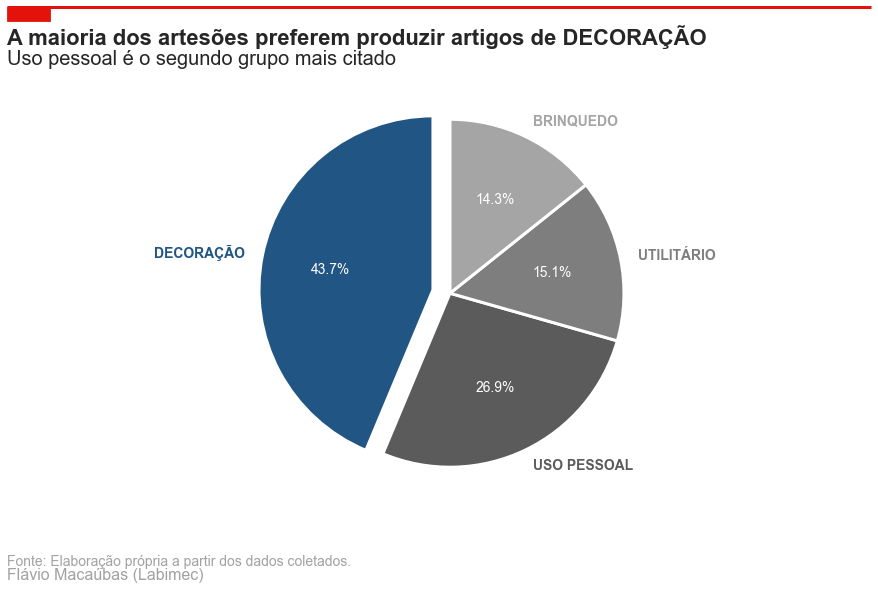

In [14]:
#@title 

# Informações
produtos_prediletos = df['1_11_QUAL_PRODUTO_GOSTA_MAIS_DE_FAZER'].value_counts(normalize = True)*100

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Quatro diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 4)))

# Cor em destaque
colors[0] = '#215584'

# Valores
values = produtos_prediletos.values
names = produtos_prediletos.index

# Cores
pal = sns.color_palette('crest', 4)
pal = list(pal.as_hex())


patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())
    
# Estética
template_grafico(TITULO = "A maioria dos artesões preferem produzir artigos de DECORAÇÃO", 
                 SUB_TITULO = "Uso pessoal é o segundo grupo mais citado")

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

#plt.savefig("Graficos/artesao_preferem.png", dpi=1200, bbox_inches = "tight");

> **BONECAS, BOLSAS, VESTUÁRIOS, ESCULTURAS e MESAS** são os produtos preferidos dos artesãos

Essa informação pode a princípio ser contruitiva, dado que bonecas pode se encaixar diretamente na categoria de brinquedos e essa foi a menos citada na preferência dos entrevistados.

Uma possível explicação deve-se ao fato de na área de decoração existir itens como "Bonecas de Biscuit" e "Bonecas de cerâmica". Além disso, naqueles que respodenram brinquedos, bonecas/os são a resposta predominante representando 47% das respostas totais.  

Em outras palavras, as pessoas que preferem decoração - que são a maioria - preferem trabalhar com uma maior diversidade de produtos.

In [15]:
#@title

#df.loc[df['1_11_QUAL_PRODUTO_GOSTA_MAIS_DE_FAZER'] == 'BRINQUEDO', '1_11_1_DESCREVA_O_PRINCIPAL_PRODUTO_(REFERENTE_AO_ITEM_ANTERIOR)'].value_counts(normalize=True)

#df.loc[df['1_11_QUAL_PRODUTO_GOSTA_MAIS_DE_FAZER'] == 'DECORAÇÃO', '1_11_1_DESCREVA_O_PRINCIPAL_PRODUTO_(REFERENTE_AO_ITEM_ANTERIOR)'].value_counts(normalize=True)

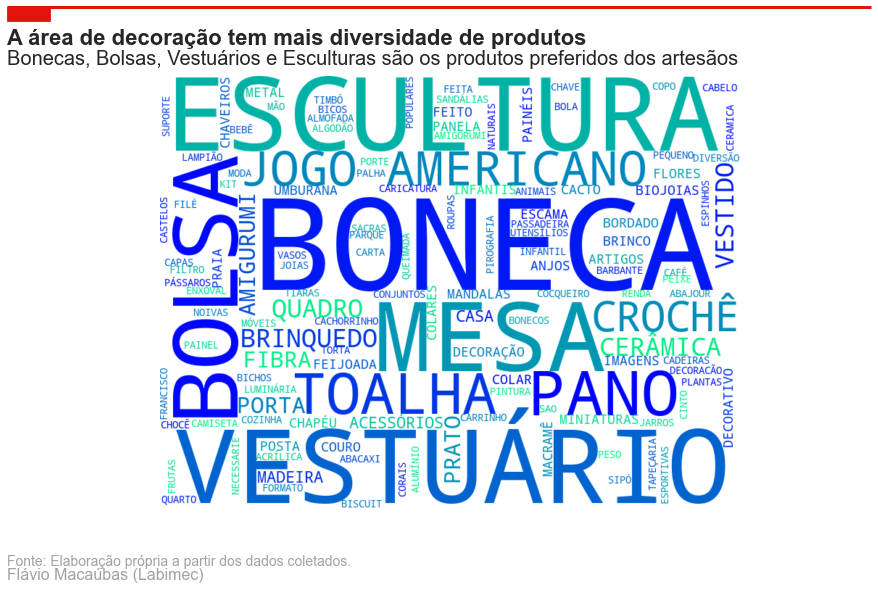

In [16]:
#@title
# Criando texto dos produtos
produtos = df.loc[df['1_11_1_DESCREVA_O_PRINCIPAL_PRODUTO_(REFERENTE_AO_ITEM_ANTERIOR)'] != 'NAN', '1_11_1_DESCREVA_O_PRINCIPAL_PRODUTO_(REFERENTE_AO_ITEM_ANTERIOR)'].values
produtos = list(produtos)
produtos = ' '.join(produtos)
produtos = produtos.split()
produtos = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in produtos] # Retira caracteres indesejados
produtos = [pal for pal in produtos if pal not in STOP_WORD_PT] # Retira stop word
produtos = ' '.join(produtos)


# Dimensão
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 1,
                      background_color = 'white').generate(produtos)

# Estética
template_grafico(TITULO = "A área de decoração tem mais diversidade de produtos", 
                 SUB_TITULO = "Bonecas, Bolsas, Vestuários e Esculturas são os produtos preferidos dos artesãos")

# Mostrando a imagem gerada:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#fig.savefig("Graficos/artesao_produzem.png", dpi=1200);

> **TECIDOS, FIOS e MADEIRA** são as matérias primas predominantes.

Couro, barro e escamas também são umas resposta frequente. Algodão colorido é citado e por ser uma especilidade do estado, é possível que seja um diferencial da produção de artesanato paraibano.


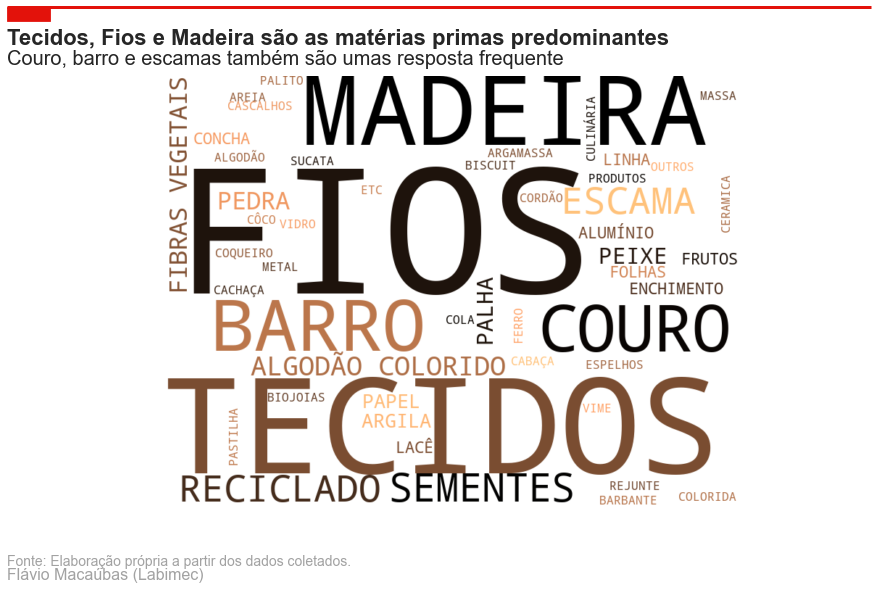

In [17]:
#@title
# Criando texto dos materia_prima
materia_prima = df.loc[df['1_12_COM_QUAIS_MATERIAS_PRIMAS_TRABALHA'] != 'NAN', '1_12_COM_QUAIS_MATERIAS_PRIMAS_TRABALHA'].values
materia_prima = list(materia_prima)
materia_prima = ' '.join(materia_prima)
materia_prima = materia_prima.split()
materia_prima = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in materia_prima] # Retira caracteres indesejados
materia_prima = [pal for pal in materia_prima if pal not in STOP_WORD_PT] # Retira stop word
materia_prima = ' '.join(materia_prima)


# Dimensão
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='copper',
                      random_state = 1,
                      background_color = 'white').generate(materia_prima)

# Estética
template_grafico(TITULO = "Tecidos, Fios e Madeira são as matérias primas predominantes", 
                 SUB_TITULO = "Couro, barro e escamas também são umas resposta frequente")

# Mostrando a imagem gerada:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#fig.savefig("Graficos/artesao_materia_prima.png", dpi=1200);

> 60% buscam suas referência em sua **HISTÓRIA PESSOAL** 

|                                  |   Qnt |   Percentual |
|:---------------------------------|------:|-------------:|
| DE SUA HISTÓRIA PESSOAL          |    71 |        59.66 |
| DO LOCAL ONDE VIVE ATUALMENTE OU |    40 |        33.61 |
| NAN                              |     8 |         6.72 |

**E que história é essa?**

In [18]:
#@title
sumario_3 = pd.concat([df['1_13_PREFERE_UTILIZAR_EM_SEUS_TRABALHOS_REFERENCIAS'].value_counts(),
                       round(df['1_13_PREFERE_UTILIZAR_EM_SEUS_TRABALHOS_REFERENCIAS'].value_counts(normalize=True).mul(100),2)], 
                       axis = 1, keys = ('Qnt', 'Percentual'))


#sumario_3.to_markdown()

> A maiorias dos artesão tem suas **origens no interior**

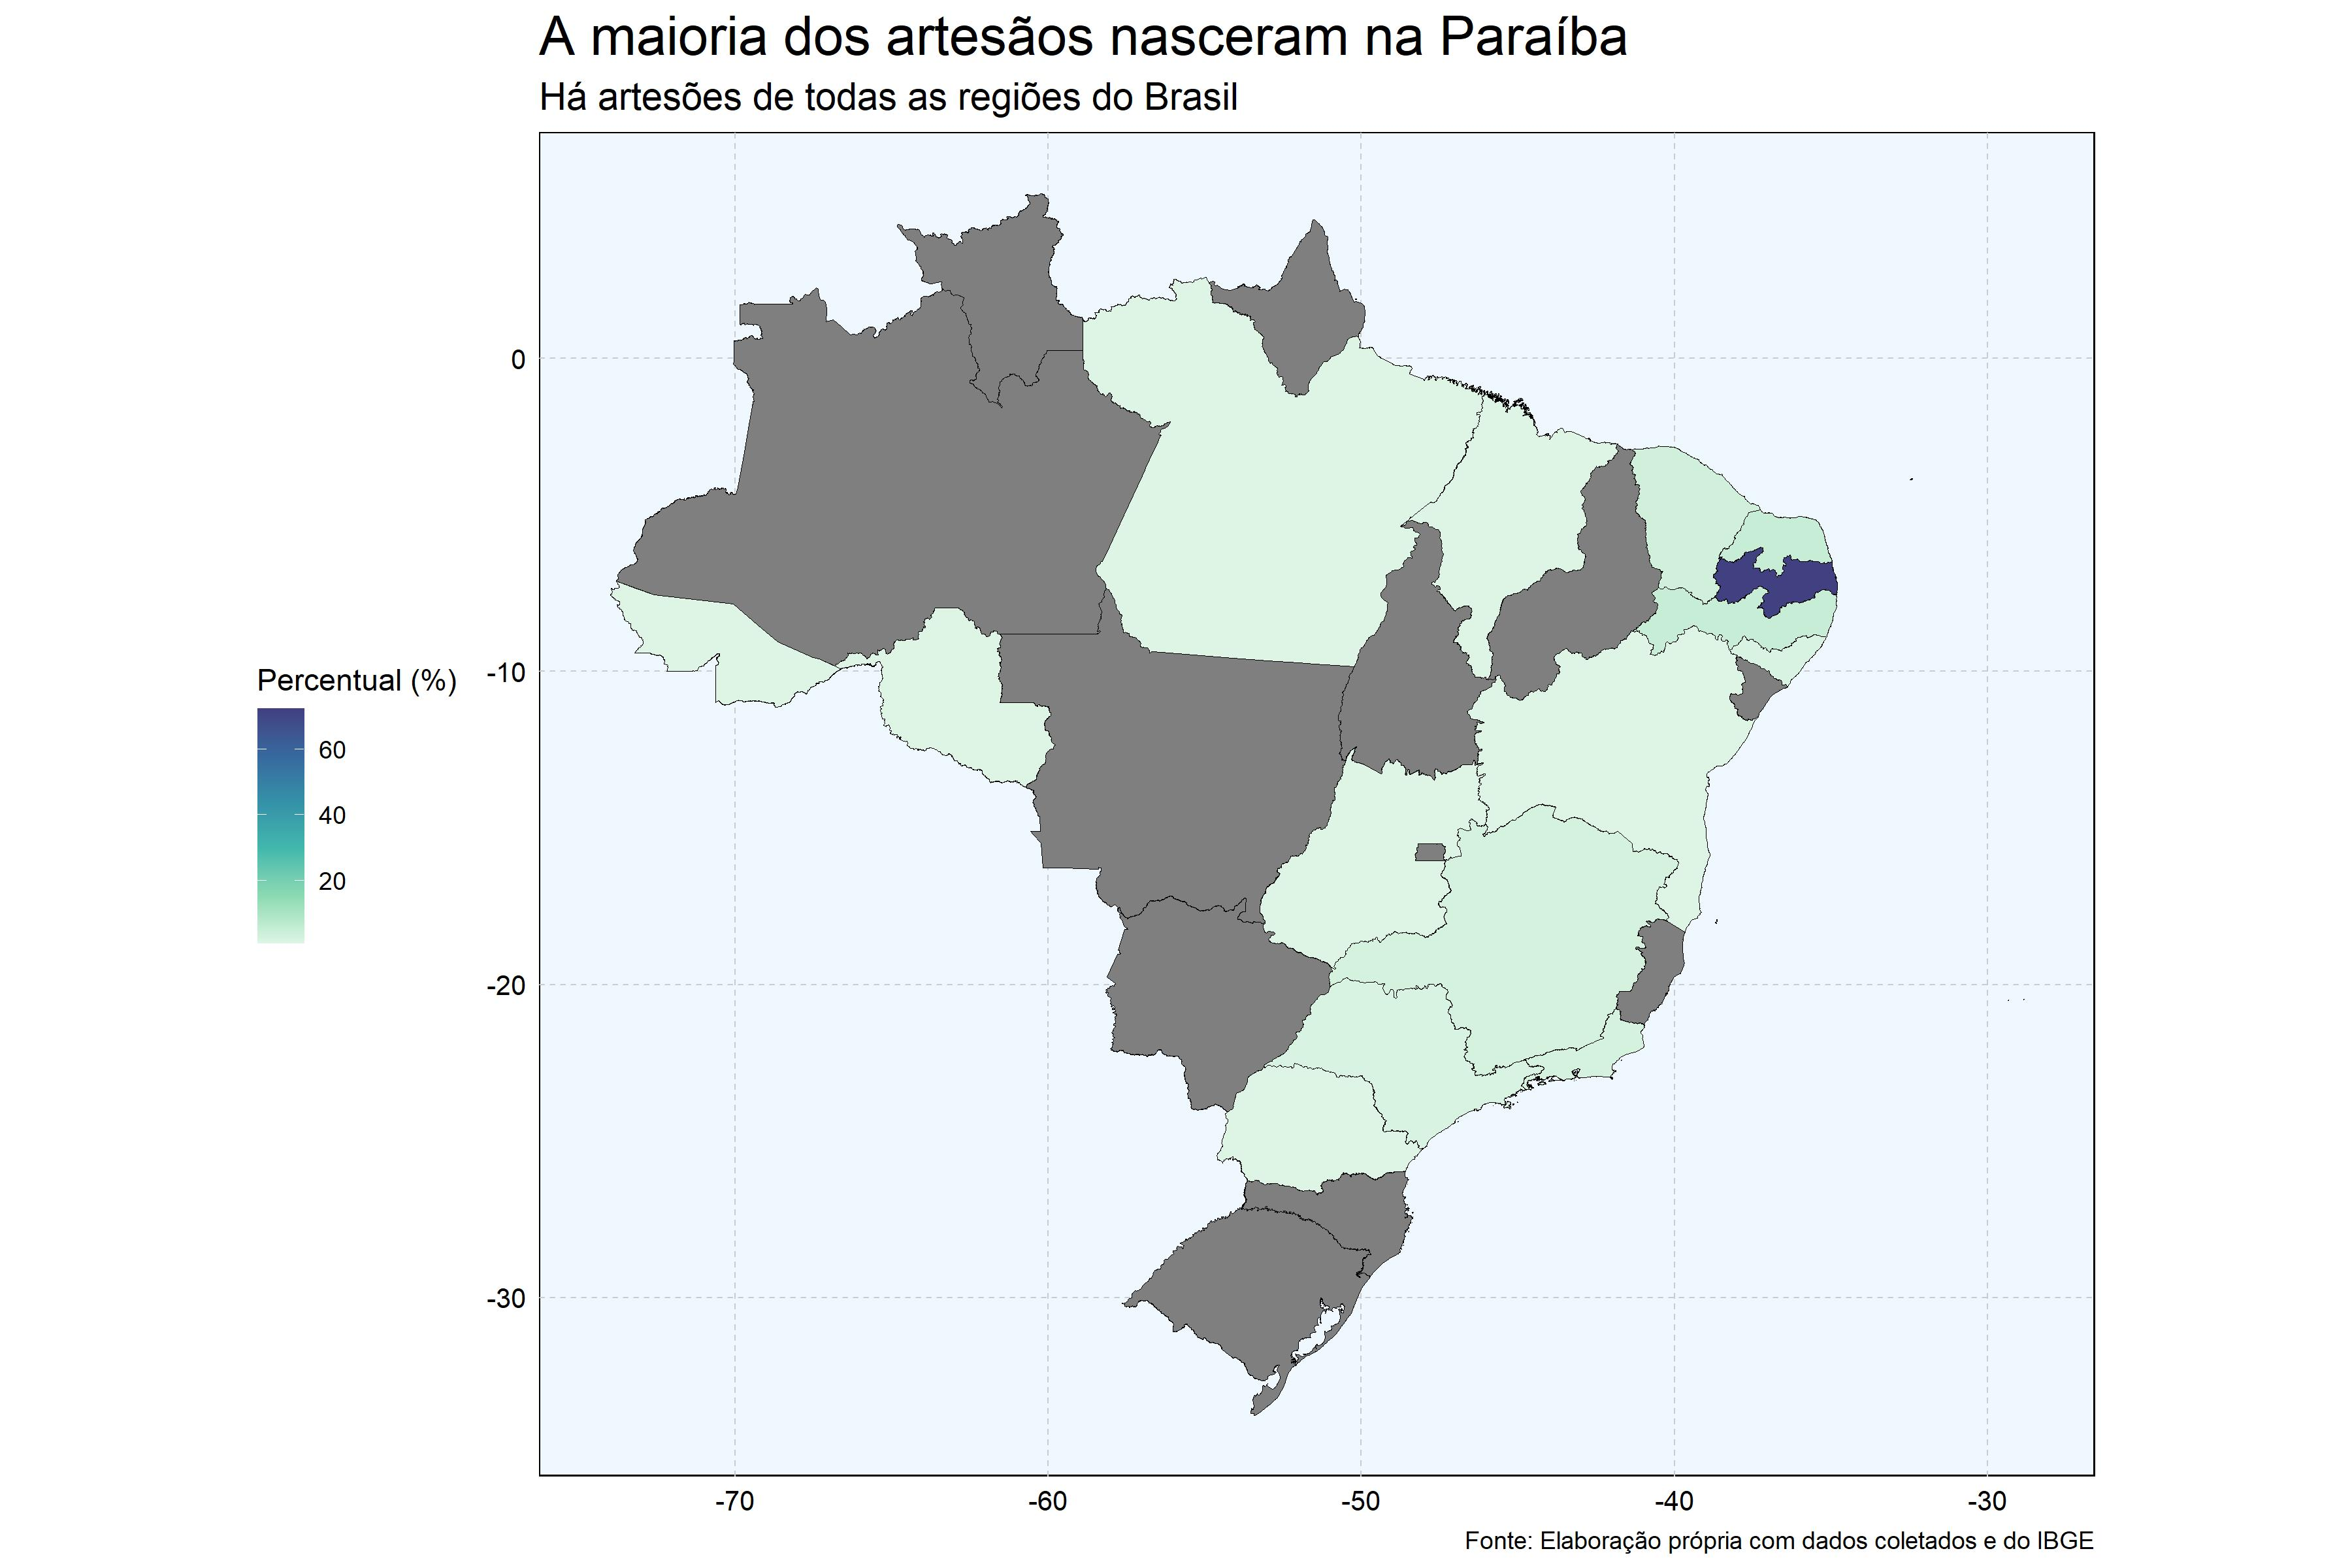

In [19]:
#@title
IMAGEM = "C:/Users/Macaubas/Desktop/Python/Labimec/Artesanato/Imagens/Mapas/estados_nasceram.jpg"
Image(filename = IMAGEM, width=900, height=600)

> **Cidades na Paraíba** são a maioria das cidades as quais os artesão já moraram em algum momento da vida.

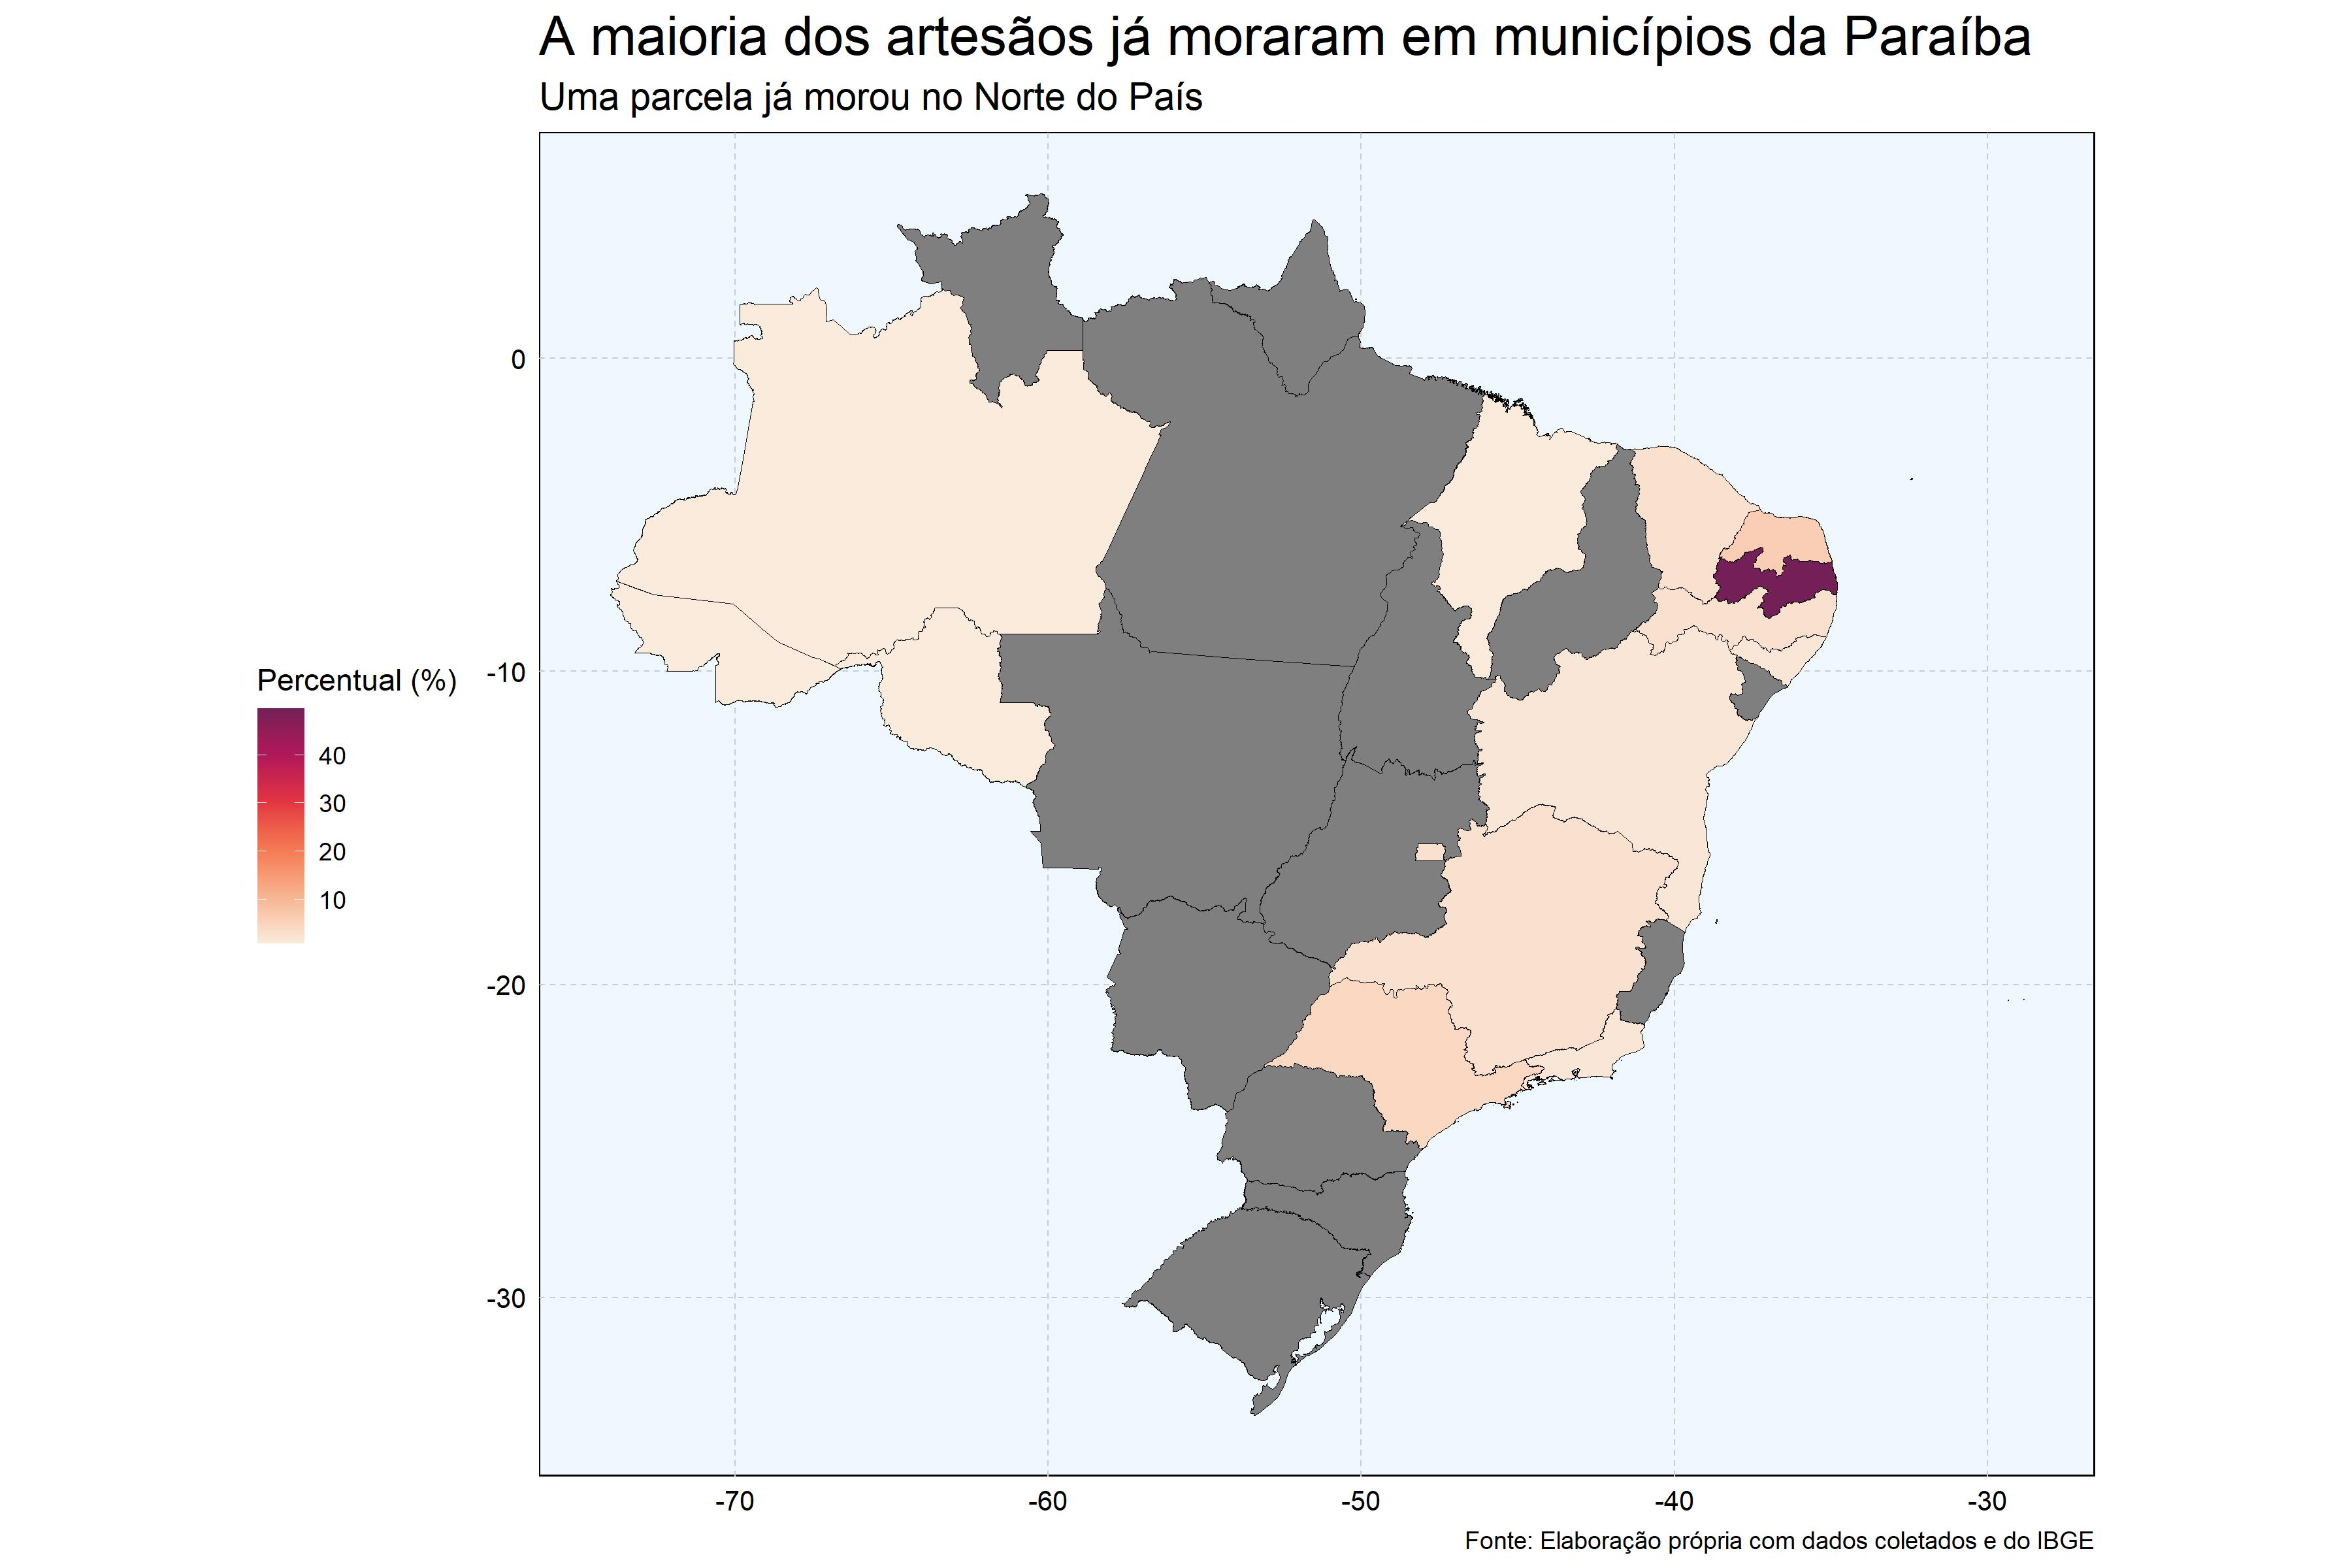

In [20]:
#@title
IMAGEM = "C:/Users/Macaubas/Desktop/Python/Labimec/Artesanato/Imagens/Mapas/estados_morou.jpg"
Image(filename = IMAGEM, width=900, height=600)

### Perfil Social

> A maior parcela dos artesãos são **CASADOS**, possuem **FAMILIARES NO ARTESANATO** e são **COOPERADOS**.


A maioria dos artesãos não possuem filhos menores de idade morando com eles. Porém, esta informação por si não é suficiente para identificar se existem dependentes. Cerca de 61% relataram que **possuem familiares** que também fazem artesanato, exatamente o mesmo percentual relatou que pertecene alguma **associação ou cooperativa**.

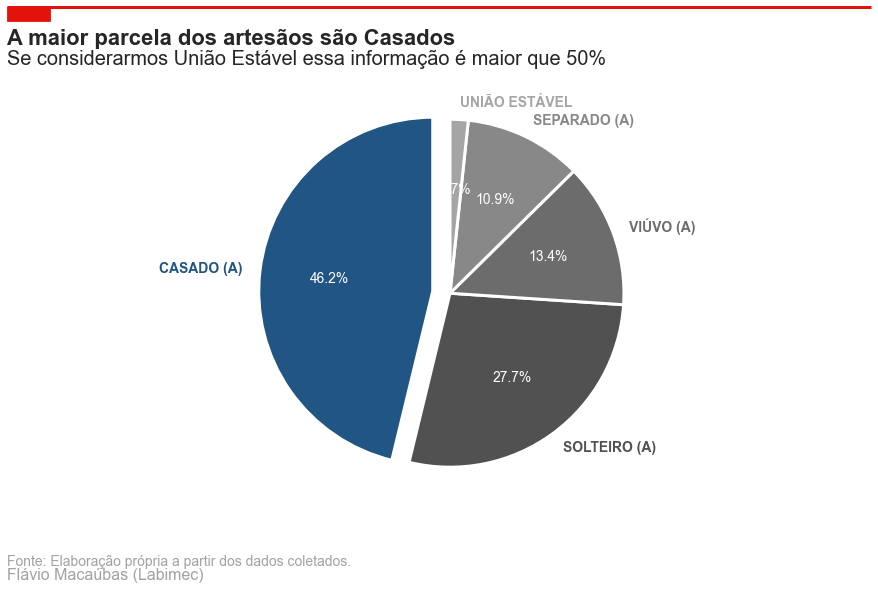

In [21]:
#@title
estado_civil = df['2_1_ESTADO_CIVIL_ATUAL'].value_counts()

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Quatro diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'

# Valores
values = estado_civil.values
names = estado_civil.index

# Cores
pal = sns.color_palette('crest', 4)
pal = list(pal.as_hex())


patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())
    

# Estética
template_grafico(TITULO = "A maior parcela dos artesãos são Casados", 
                 SUB_TITULO = "Se considerarmos União Estável essa informação é maior que 50%")


plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

>> Estatística descritiva da quatidade de filhos que moram com os artsãos

|       |   2_2_QUANTOS_FILHOS_MENORES_DE_IDADE_VIVEM_COM_VOCE |
|:------|-----------------------------------------------------:|
| count |                                           119        |
| mean  |                                             0.336134 |
| std   |                                             0.866293 |
| min   |                                             0        |
| 25%   |                                             0        |
| 50%   |                                             0        |
| 75%   |                                             0        |
| max   |                                             6        |

>> Percentual dos membros da famílias que também fazem artesanato

|     |   2_3_ALGUM_MEMBRO_DA_FAMILIA_TAMBEM_FAZ_ARTESANATO |
|:----|----------------------------------------------------:|
| SIM |                                             61.3445 |
| NÃO |                                             38.6555 |

>> Percentual dos artesãos que são cooperados/associados

|     |   2_5_VOCE_FAZ_PARTE_DE_ALGUMA_ASSOCIACAO_OU_COOPERATIVA |
|:----|---------------------------------------------------------:|
| SIM |                                                  61.3445 |
| NÃO |                                                  38.6555 |

In [22]:
#@title
#print(df['2_2_QUANTOS_FILHOS_MENORES_DE_IDADE_VIVEM_COM_VOCE'].describe().to_markdown())

#print('\n')

#print((df['2_3_ALGUM_MEMBRO_DA_FAMILIA_TAMBEM_FAZ_ARTESANATO'].value_counts(normalize = True)*100).to_markdown())

#print('\n')

#print((df['2_5_VOCE_FAZ_PARTE_DE_ALGUMA_ASSOCIACAO_OU_COOPERATIVA'].value_counts(normalize = True)*100).to_markdown())


> **IRMÃS, FILHOS E FILHAS** são os principais familiares que também fazem artesanato.

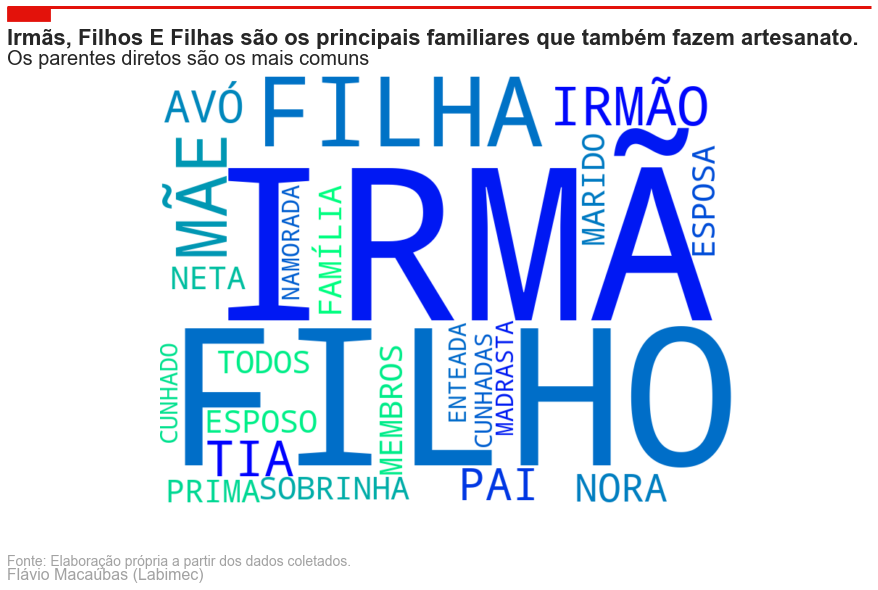

In [23]:
#@title
# Criando texto dos familiares
familiares = df.loc[df['2_4_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_MEMBRO_TRABALHA_COM_ARTESANATO'] != 'NAN', '2_4_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_MEMBRO_TRABALHA_COM_ARTESANATO'].values
familiares = list(familiares)
familiares = ' '.join(familiares)
familiares = familiares.split()
familiares = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in familiares] # Retira caracteres indesejados
familiares = [pal for pal in familiares if pal not in STOP_WORD_PT] # Retira stop word
familiares = ' '.join(familiares)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 1,
                      background_color = 'white').generate(familiares)

template_grafico(TITULO = "Irmãs, Filhos E Filhas são os principais familiares que também fazem artesanato.", 
                 SUB_TITULO = "Os parentes diretos são os mais comuns")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

> As cooperativas são bem distribuídas, com uma pequena predominância da **ASSOCIAÇÃO DOS ARTESÃOS DE CABEDELO**

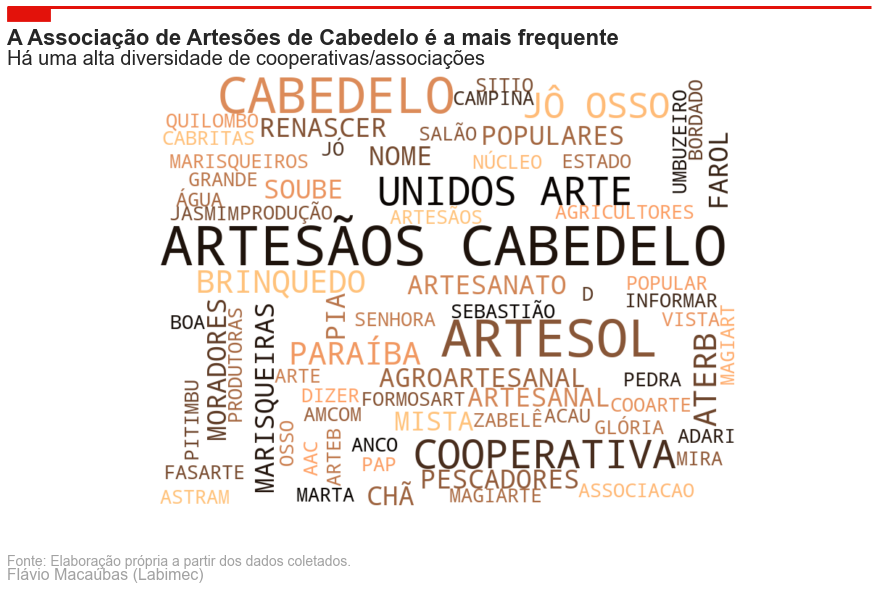

In [24]:
#@title
# Criando texto dos cooperativas
cooperativas = df.loc[df['2_6_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_ASSOCIACAO_OU_COOPERATIVA'] != 'NAN', '2_6_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_ASSOCIACAO_OU_COOPERATIVA'].values
cooperativas = list(cooperativas)
cooperativas = ' '.join(cooperativas)
cooperativas = cooperativas.split()
cooperativas = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in cooperativas] # Retira caracteres indesejados
cooperativas = [pal for pal in cooperativas if pal not in STOP_WORD_PT] # Retira stop word
cooperativas = [pal for pal in cooperativas if pal != 'ASSOCIAÇÃO'] # Retirando a palavra Associação
cooperativas = ' '.join(cooperativas)


# Tamanho da figura
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='copper',
                      random_state = 1,
                      background_color = 'white').generate(cooperativas)

template_grafico(TITULO = "A Associação de Artesões de Cabedelo é a mais frequente", 
                 SUB_TITULO = "Há uma alta diversidade de cooperativas/associações")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

> Dos entrevistados, cerca **84% NÃO CONTRATAM AJUDANTES**. 

A outra parcela contrata em média **6 AJUDANTES** quando necessário, em alguns casos chegando até 20 AJUDANTES.

>> Percentual de artesãos que contratam auxiliares

|     |   2_7_CONTRATA_AUXILIAR_OU_AJUDANTE_PARA_TRABALHAR_COM_VOCE |
|:----|------------------------------------------------------------:|
| NÃO |                                                     84.8739 |
| SIM |                                                     15.1261 |

>> Estatística descritiva daqueles que contratam auxiliares

|       |   2_8_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUANTOS_AUXILIARES_OU_AJUDANTES_VOCE_CONTRATA |
|:------|---------------------------------------------------------------------------------:|
| count |                                                                         18       |
| mean  |                                                                          6.05556 |
| std   |                                                                          6.53922 |
| min   |                                                                          1       |
| 25%   |                                                                          2       |
| 50%   |                                                                          3       |
| 75%   |                                                                          5       |
| max   |                                                                         20       |

In [25]:
#@title
#print((df['2_7_CONTRATA_AUXILIAR_OU_AJUDANTE_PARA_TRABALHAR_COM_VOCE'].value_counts(normalize = True)*100).to_markdown())

#print('\n')

#print(df['2_8_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUANTOS_AUXILIARES_OU_AJUDANTES_VOCE_CONTRATA'].describe().to_markdown())

> 76% dos entrevistados tem interesse de participar de algum tipo de **CAPACITAÇÃO**

Como criar novos produtos de sucesso e como dilvugar seus trabalhos nas redes sociais são as respostas predominantes representando 65% do total de respostas. 

Há umas parcela de respostas individuais, que revelam necessidades específicas, que foi retirada dessa demonstração. Algumas respostas indicam que tem interesse em todos os cursos ofertados, outros combinaram 2 ou 3 da opções disponível. Uma respondente alegou já ter feito todos esses cursos. Vitrificação, atendimento ao cliente e técnicas de marcenaria foram necessidades listadas.

In [26]:
#@title

#df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'].value_counts(normalize = True)

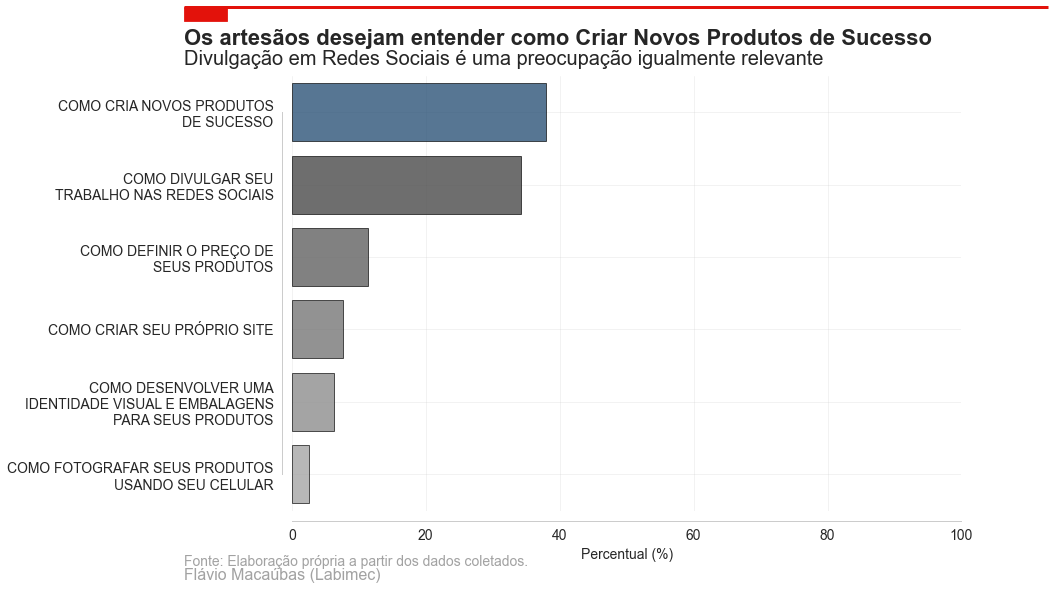

In [27]:
#@title

# Filtrando apenas para respostas validadas
capacitacao = df.loc[df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'] != 'NAN']
capacitacao = df.loc[(df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'] == 'COMO DEFINIR O PREÇO DE SEUS PRODUTOS') |
                     (df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'] == 'COMO CRIAR NOVOS PRODUTOS DE SUCESSO') |
                     (df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'] == 'COMO DIVULGAR SEUS TRABALHOS NAS REDES SOCIAIS') |
                     (df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'] == 'COMO CRIAR SEU PRÓPRIO SITE') |
                     (df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'] == 'COMO FOTOGRAFAR SEUS PRODUTOS USANDO SEU CELULAR') |
                     (df['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE'] == 'COMO DESENVOLVER UMA IDENTIDADE VISUAL E EMBALAGENS PARA SEUS PRODUTOS') ]

                     
# Agrupando e calculando contadores
capacitacao = capacitacao.groupby('2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE').agg({'2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE':'count'})
capacitacao['PERCENTUAL'] = capacitacao['2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE']*100/79 # Colocando em percentual
capacitacao = capacitacao.sort_values('PERCENTUAL', ascending = False)

#Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 6)))

# Cor em destaque
colors[0] = '#215584'

# Ajustando index
EIXO_Y = list(capacitacao.index)
EIXO_Y[0] = 'COMO CRIA NOVOS PRODUTOS\nDE SUCESSO'
EIXO_Y[2] = 'COMO DEFINIR O PREÇO DE\nSEUS PRODUTOS'
EIXO_Y[-1] = 'COMO FOTOGRAFAR SEUS PRODUTOS\nUSANDO SEU CELULAR'
EIXO_Y[-2] = 'COMO DESENVOLVER UMA\nIDENTIDADE VISUAL E EMBALAGENS\nPARA SEUS PRODUTOS'
EIXO_Y[1] = 'COMO DIVULGAR SEU\nTRABALHO NAS REDES SOCIAIS'

# Gráfico
ax = sns.barplot(y=EIXO_Y,
                 x = capacitacao['PERCENTUAL'] ,
                 data=capacitacao, 
                 palette=colors,
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)

template_grafico(TITULO = "Os artesãos desejam entender como Criar Novos Produtos de Sucesso", 
                 SUB_TITULO = "Divulgação em Redes Sociais é uma preocupação igualmente relevante");

#fig.savefig("Graficos/artesao_qual_curso.png", dpi=1200, bbox_inches = "tight");

In [28]:
capacitacao

2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_TEM_INTERESSE  \
2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_T...                                                                
COMO CRIAR NOVOS PRODUTOS DE SUCESSO                                                               30             
COMO DIVULGAR SEUS TRABALHOS NAS REDES SOCIAIS                                                     27             
COMO DEFINIR O PREÇO DE SEUS PRODUTOS                                                               9             
COMO CRIAR SEU PRÓPRIO SITE                                                                         6             
COMO DESENVOLVER UMA IDENTIDADE VISUAL E EMBALA...                                                  5             
COMO FOTOGRAFAR SEUS PRODUTOS USANDO SEU CELULAR                                                    2             

                                                    PERCENTUAL  
2_12_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_O_TEMA_T...              
COMO CRIAR NOVOS PRODUTOS DE SUCESSO                 37.974684  
COMO DIVULGAR SEUS TRABALHOS NAS REDES SOCIAIS       34.177215  
COMO DEFINIR O PREÇO DE SEUS PRODUTOS                11.392405  
COMO CRIAR SEU PRÓPRIO SITE                           7.594937  
COMO DESENVOLVER UMA IDENTIDADE VISUAL E EMBALA...    6.329114  
COMO FOTOGRAFAR SEUS PRODUTOS USANDO SEU CELULAR      2.531646

> **Instagram** é a rede social ao qual os artesãos são mais ativos

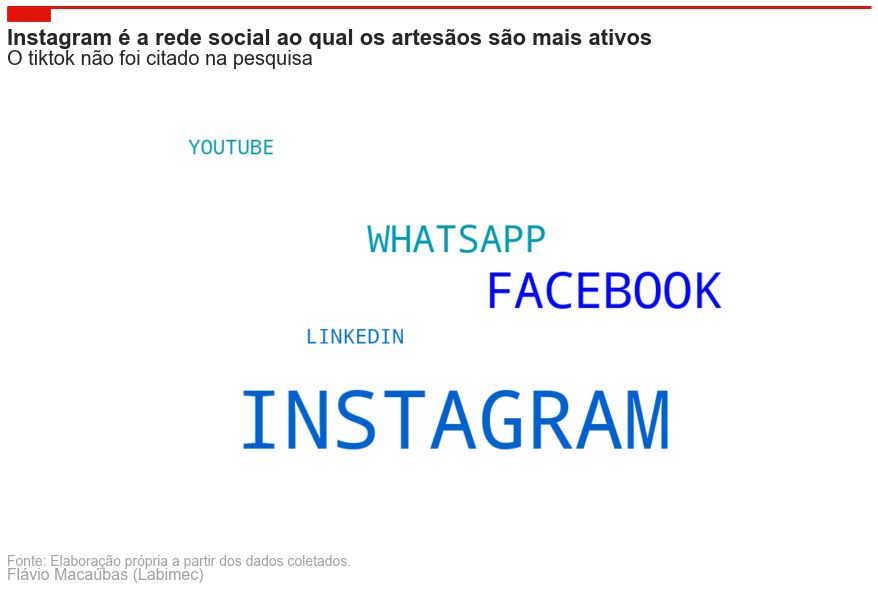

In [29]:
#@title
# Criando texto dos redes_sociais
redes_sociais = df.loc[df['2_13_PARTICIPA_ATIVAMENTE_DE_QUAIS_REDES_SOCIAIS'] != 'NAN', '2_13_PARTICIPA_ATIVAMENTE_DE_QUAIS_REDES_SOCIAIS'].values
redes_sociais = list(redes_sociais)
redes_sociais = ' '.join(redes_sociais)
redes_sociais = redes_sociais.split()
redes_sociais = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in redes_sociais] # Retira caracteres indesejados
redes_sociais = [pal for pal in redes_sociais if pal not in STOP_WORD_PT] # Retira stop word
redes_sociais = [pal for pal in redes_sociais if pal != 'NAO'] # Retirando a palavra NAO
redes_sociais = [pal for pal in redes_sociais if pal != 'PARTICIPA'] # Retirando a palavra PARTICIPA

redes_sociais = ' '.join(redes_sociais)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 1,
                      background_color = 'white').generate(redes_sociais)

template_grafico(TITULO = "Instagram é a rede social ao qual os artesãos são mais ativos", 
                 SUB_TITULO = "O tiktok não foi citado na pesquisa");

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Perfil Econômico

> 74% dos entrevistados alegam que o artesanato é sua **ATIVIDADE PRINCIPAL**

In [30]:
#@title

#df['3_1_O_ARTESANATO_E_SUA_ATIVIDADE'].value_counts(normalize = True)

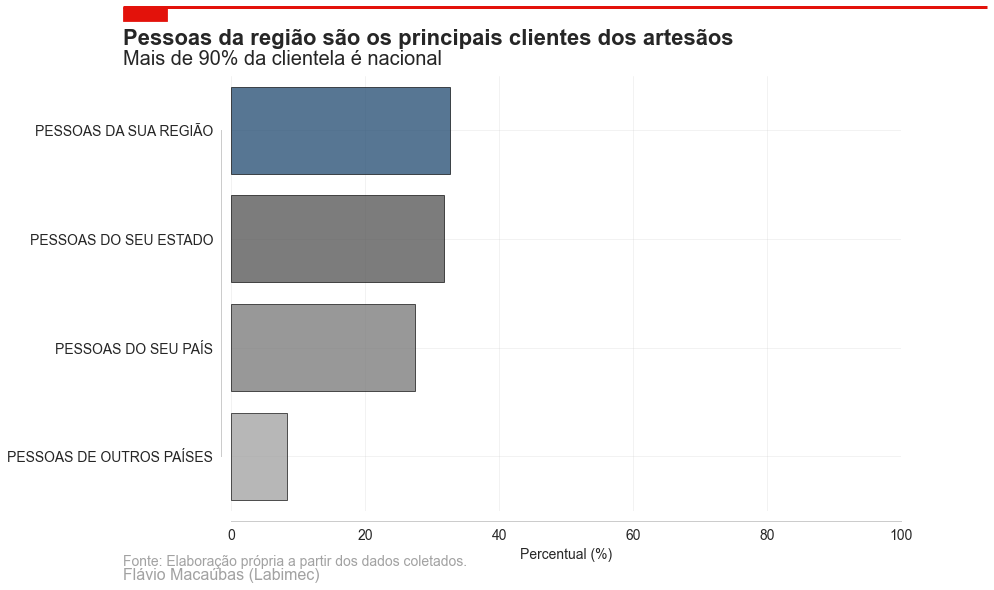

In [31]:
#@title
clientela = df['3_2_QUEM_E_QUE_COMPRA_SEUS_PRODUTOS'].values         

clientela = list(clientela)

# Separa as opções selecionadas
clientela = [item.split(',') if ',' in item else item for item in clientela]

# Cria uma nova lista onde cada opção é 1 elemento
clientela_final = []
for opcao in clientela:
    if isinstance(opcao, list):
        for opcao_2 in opcao: 
            clientela_final.append(opcao_2.strip())
    else:
        clientela_final.append(opcao.strip())

# Cria dicionário de frequência
RESPOSTAS = ['PESSOAS DA SUA REGIÃO',
             'PESSOAS DO SEU ESTADO',
             'PESSOAS DE OUTROS PAÍSES',
             'PESSOAS DO SEU PAÍS']

freqs = {'RESPOSTA':RESPOSTAS, 'QUANTIDADE':[0,0,0,0]}

for resp in clientela_final:
    if resp == RESPOSTAS[0]:
        freqs['QUANTIDADE'][0] += 1
    elif resp == RESPOSTAS[1]:
        freqs['QUANTIDADE'][1] += 1
    elif resp == RESPOSTAS[2]:
        freqs['QUANTIDADE'][2] += 1
    else:
        freqs['QUANTIDADE'][3] += 1

# Cria data frame com frequência das respostas
clientes = pd.DataFrame(freqs)

# Cria porcentagem
clientes['PORCENTAGEM'] = clientes.QUANTIDADE*100/clientes.QUANTIDADE.sum()     

# Ordena as listas
clientes = clientes.sort_values('PORCENTAGEM', ascending = False)

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 4)))

# Cor em destaque
colors[0] = '#215584'

# Gráfico
ax = sns.barplot(y = 'RESPOSTA',
                 x = 'PORCENTAGEM',
                 data = clientes,
                 palette=colors,
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)

template_grafico(TITULO = "Pessoas da região são os principais clientes dos artesãos", 
                 SUB_TITULO = "Mais de 90% da clientela é nacional");

#fig.savefig("Graficos/artesao_clientes.png", dpi=1200, bbox_inches = "tight");

> A maioria dos entrevistados trabalham entre **6h-8h** em média 

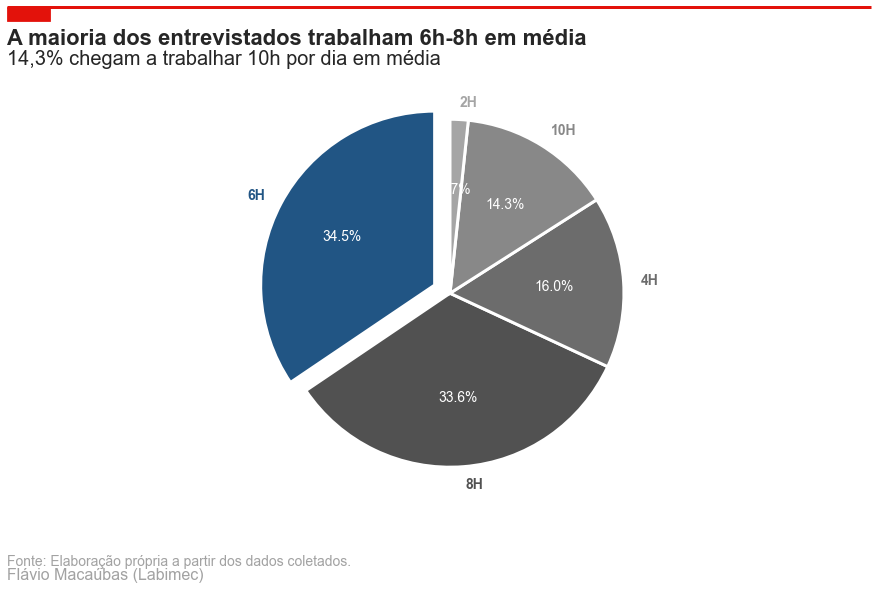

In [32]:
#@title

# Informações
estado_civil = df['3_3_QUANTAS_HORAS_TRABALHA_EM_MEDIA_POR_DIA_FAZENDO_ARTESANATO'].value_counts()

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Quatro diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'

# Valores
values = estado_civil.values
names = estado_civil.index

# Cores
pal = sns.color_palette('crest', 4)
pal = list(pal.as_hex())

# Gráfico
patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())


# Estética
template_grafico(TITULO = "A maioria dos entrevistados trabalham 6h-8h em média", 
                 SUB_TITULO = "14,3% chegam a trabalhar 10h por dia em média")


plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

> Quantas pessoas trabalham com você?

In [33]:
#@title
#df['3_4_QUANTAS_PESSOAS_TRABALHAM_COM_VOCE'].value_counts(normalize = True)

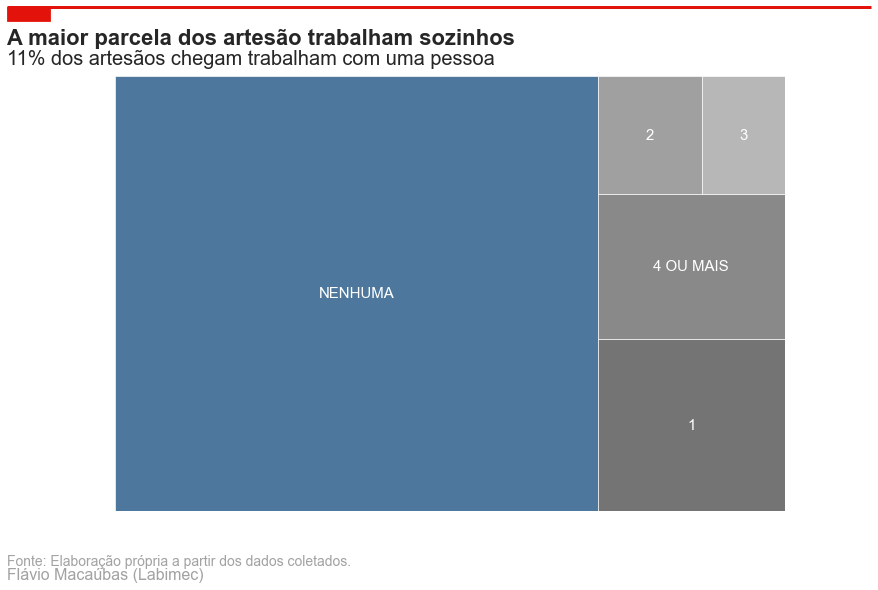

In [34]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'
 
# Informações
empregados = df['3_4_QUANTAS_PESSOAS_TRABALHAM_COM_VOCE'].value_counts()

# Paleta de cores
pal = sns.color_palette('crest', 10)
pal = list(pal.as_hex())

# Gráfico
squarify.plot(sizes=empregados.values, 
              label=empregados.index, 
              alpha=.8,
              color = colors,
              text_kwargs={'fontsize':15, 'color': 'white'});

# Estética
template_grafico(TITULO = "A maior parcela dos artesão trabalham sozinhos", 
                 SUB_TITULO = "11% dos artesãos chegam trabalham com uma pessoa")


plt.axis('off');
plt.show();

> **VESTUÁRIO, BONECA E CHAVEIROS** são os produtos mais vendidos

Apesar desses destaques, há uma grande variedade de produtos aos quais os entrevistados alegaram ser o que mais vende. Uma possível explicação está na especialização que cada um deles possuí.

Bolsas, mesas e esculturas de madeiras são itens que também apresentaram um destaque na respostas dos entrevistados.




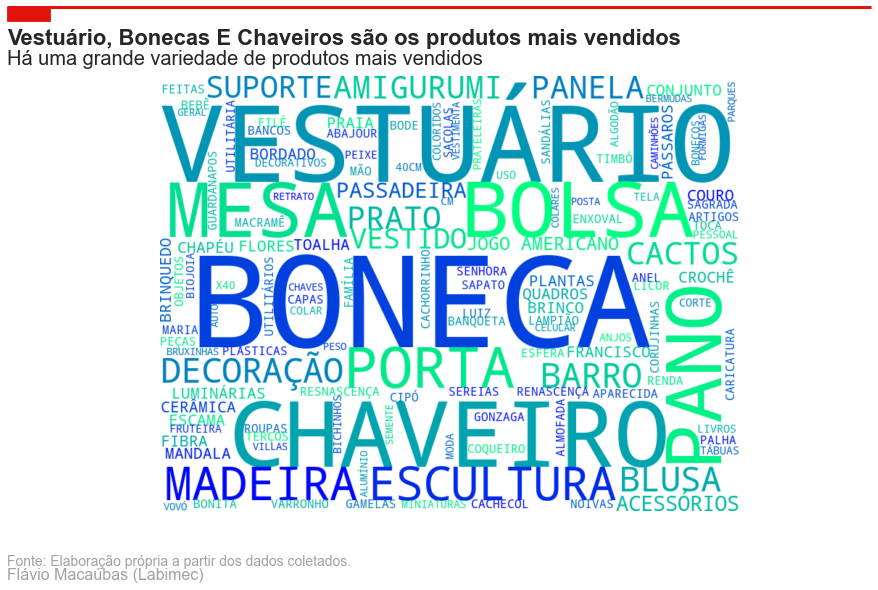

In [35]:
#@title
# Criando texto dos produto_mais_vende
produto_mais_vende = df.loc[df['3_5_QUAL_O_SEU_PRODUTO_QUE_MAIS_VENDE'] != 'NAN', '3_5_QUAL_O_SEU_PRODUTO_QUE_MAIS_VENDE'].values
produto_mais_vende = list(produto_mais_vende)
produto_mais_vende = ' '.join(produto_mais_vende)
produto_mais_vende = produto_mais_vende.split()
produto_mais_vende = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in produto_mais_vende] # Retira caracteres indesejados
produto_mais_vende = [pal for pal in produto_mais_vende if pal not in STOP_WORD_PT] # Retira stop word

produto_mais_vende = ' '.join(produto_mais_vende)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 2,
                      background_color = 'white').generate(produto_mais_vende)

# Estética
template_grafico(TITULO = "Vestuário, Bonecas E Chaveiros são os produtos mais vendidos", 
                 SUB_TITULO = "Há uma grande variedade de produtos mais vendidos")


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#fig.savefig("Graficos/artesao_mais_vendem.png", dpi=1200);

> A média de preço do ataco é **14,6%** menor do que no Varejo.


Há uma maior dispersão dos dados no varejo, em alguns casos o preço do atacado chegou a centavos.

>> Estatística descritiva dos preços unitários de atacado e varejo

|       |   Preço Unitário Atacado | Preço Unitário Varejo |
|:------|----------------:|--------------:| 
| Média  |     R\$ 75,52 |     R\$ 86,22 |
| Desvio Padrão   |     R\$ 68,78   |     R\$ 74,58 |
| Mínimo   |     R\$ 0,05    |      R\$ 5,22 |
| 25%   |     R\$ 25,00   |     R\$ 30,00 |
| 50%   |     R\$ 54,37   |     R\$ 60,00 |
| 75%   |    R\$ 100,00   |    R\$ 120,00 |
| Máximo   |    R\$ 275,62   |    R\$ 315,00 |

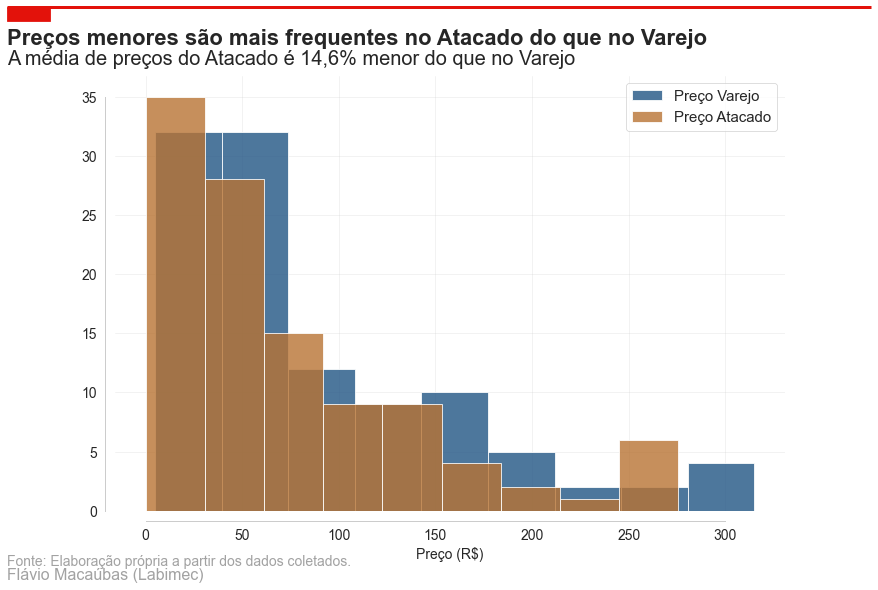

In [36]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))


# Criando dataframe para os preços
precos = df.copy()
precos = precos.rename(columns={"3_6_QUAL_O_PRECO_UNITARIO_NO_VAREJO_($)":"PRECO_UNI_VAR",
                               '3_7_QUAL_O_PRECO_UNITARIO_NO_ATACADO_($)_OU_QUAL_SERIA_O_PRECO_UNITARIO_SE_VENDESSE_NO_ATACADO':'PRECO_UNI_ATA'})
# Intervalo interquartílico
Q1 = precos['PRECO_UNI_VAR'].quantile(0.25)
Q3 = precos['PRECO_UNI_VAR'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando dataframe apenas para os preços dentro do intervalor interquartílico
preco_var = precos.query('(@Q1 - 1.5 * @IQR) <= PRECO_UNI_VAR <= (@Q3 + 1.5 * @IQR)')

# Filtrando dataframe apenas para os preços dentro do intervalor interquartílico
Q1 = precos['PRECO_UNI_ATA'].quantile(0.25)
Q3 = precos['PRECO_UNI_ATA'].quantile(0.75)
IQR = Q3 - Q1
preco_ata = precos.query('(@Q1 - 1.5 * @IQR) <= PRECO_UNI_ATA <= (@Q3 + 1.5 * @IQR)')

# Estética
template_grafico(TITULO = "Preços menores são mais frequentes no Atacado do que no Varejo",
                SUB_TITULO = "A média de preços do Atacado é 14,6% menor do que no Varejo")


# Gráficos
fig = sns.histplot(preco_var['PRECO_UNI_VAR'], 
                   label = 'Preço Varejo', 
                   color = '#215584', 
                   alpha = 0.8)

fig = sns.histplot(preco_ata['PRECO_UNI_ATA'], 
                   label = 'Preço Atacado', 
                   color = '#b87333', 
                   alpha = 0.8)

# Configurações dos eixos
ax.set(xlabel = 'Preço (R$)', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixos
sns.despine(offset=10, trim=True)


plt.legend()
#plt.savefig("Graficos/artesao_precos_ata_var.png", dpi=1200);
plt.show();


In [37]:
#@title 

#print(preco_var.PRECO_UNI_VAR.describe().to_markdown())

#print('\n')

#print(preco_ata.PRECO_UNI_ATA.describe().to_markdown())


> Tempo trabalho e custos com matéria prima são os **principais determinantes** do preço dos artesãos

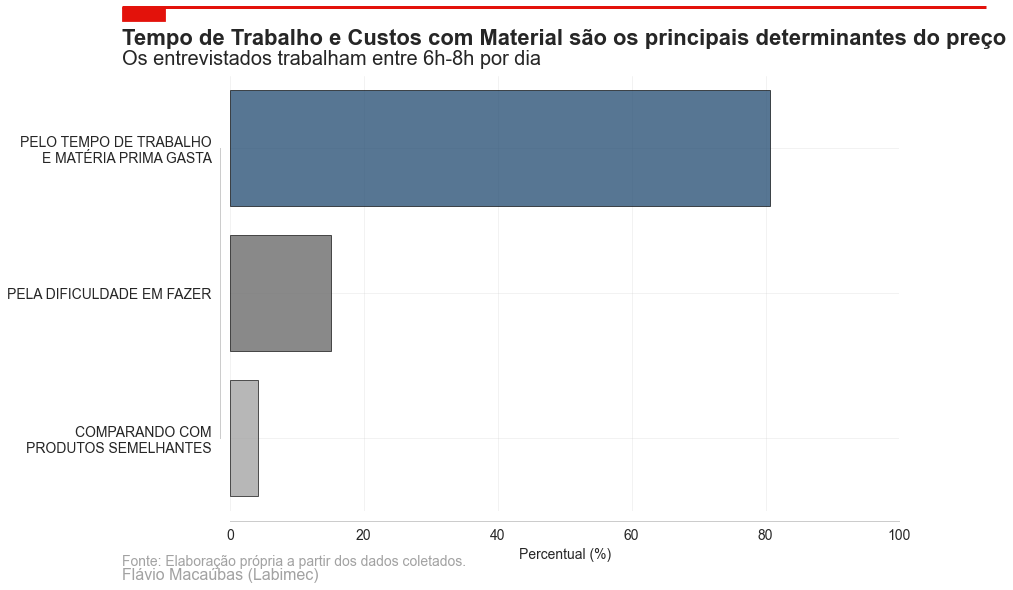

In [38]:
#@title 
# Informações
definidor_preco = df['3_8_COMO_DEFINE_O_PRECO_DOS_SEUS_PRODUTOS'].value_counts(normalize = True)*100

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 3)))

# Cor em destaque
colors[0] = '#215584'

# Ajuste eixo
EIXO_Y = list(definidor_preco.index)
EIXO_Y[0] = 'PELO TEMPO DE TRABALHO\nE MATÉRIA PRIMA GASTA'
EIXO_Y[2] = 'COMPARANDO COM\nPRODUTOS SEMELHANTES'

# Gráfico 
ax = sns.barplot(y=EIXO_Y,
                 x = definidor_preco.values ,
                 palette=colors,
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)

template_grafico(TITULO = "Tempo de Trabalho e Custos com Material são os principais determinantes do preço",
                SUB_TITULO = "Os entrevistados trabalham entre 6h-8h por dia");

#fig.savefig("Graficos/artesao_determinantes_preco.png", dpi=1200, bbox_inches = "tight");

> A maioria dos artesãos compram seus insumos **EM SUA CIDADE**.

A internet é o canal menos utilziado, representando apenas 5% das respostas.

>> Origem das matérias-primas/insumos

|                                         |   3_18_ONDE_CONSEGUE_COMPRAR_AS_MATERIAS_PRIMAS_E_INSUMOS_QUE_UTILIZA |
|:----------------------------------------|----------------------------------------------------------------------:|
| EM LOJAS ESPECIALIZADAS EM SUA CIDADE   |                                                              76.4706  |
| RETIRA OU EXTRAI DA NATUREZA E PROCESSA |                                                              18.4874  |
| COMPRA PELA INTERNET                    |                                                               5.04202 |

In [39]:
#@title
#print((df['3_18_ONDE_CONSEGUE_COMPRAR_AS_MATERIAS_PRIMAS_E_INSUMOS_QUE_UTILIZA'].value_counts(normalize = True)*100).to_markdown())

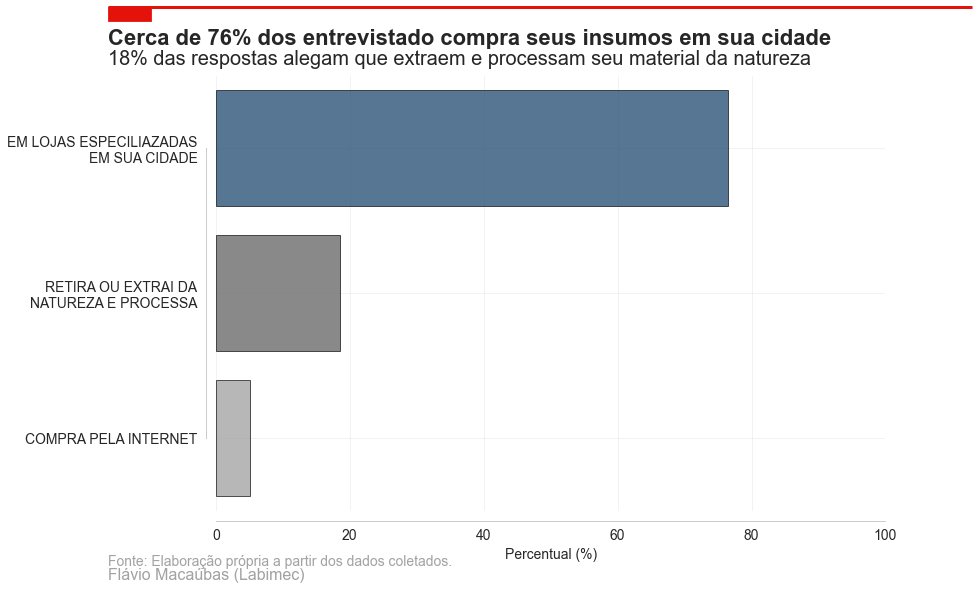

In [40]:
#@title 

# Informações
fornecedor = df['3_18_ONDE_CONSEGUE_COMPRAR_AS_MATERIAS_PRIMAS_E_INSUMOS_QUE_UTILIZA'].value_counts(normalize = True)*100

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 3)))

# Cor em destaque
colors[0] = '#215584'

# Ajuste eixo
EIXO_Y = list(fornecedor.index)
EIXO_Y[0] = 'EM LOJAS ESPECILIAZADAS\nEM SUA CIDADE'
EIXO_Y[1] = 'RETIRA OU EXTRAI DA\nNATUREZA E PROCESSA'

# Gráfico de contagem
ax = sns.barplot(y=EIXO_Y,
                 x = fornecedor.values ,
                 palette=colors,
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)

template_grafico(TITULO = "Cerca de 76% dos entrevistado compra seus insumos em sua cidade",
                SUB_TITULO = "18% das respostas alegam que extraem e processam seu material da natureza");

#fig.savefig("Graficos/artesao_fornecedores.png", dpi=1200, bbox_inches = "tight");

> A maior parte dos entrevistado possuem **produção e venda de peças equilibrados**

Apesar do tratamento de possíveis *outliers*, existe uma parcela com um alto déficit/superávit. É possível que a razão para essa grande discrepância seja um mal entendimento da pergunta por parte do entrevistados. 

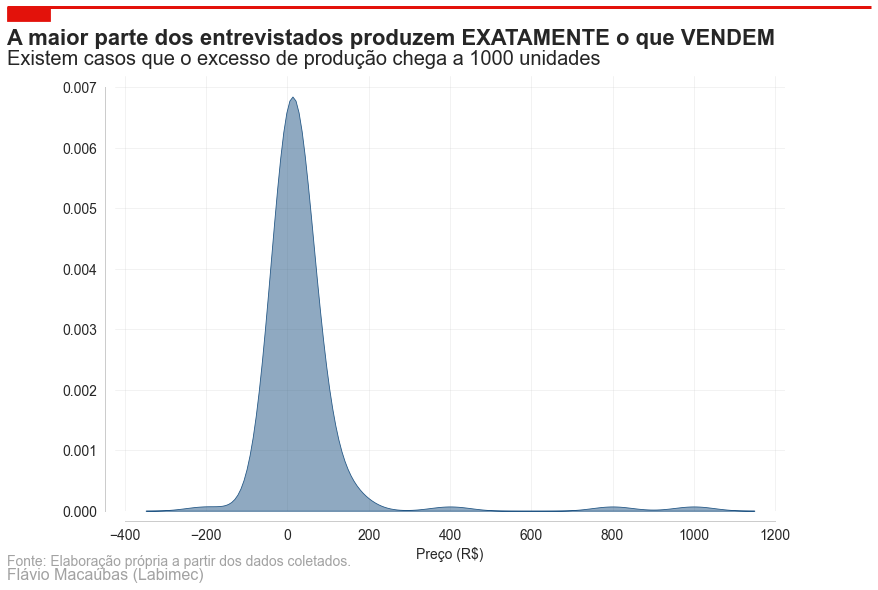

In [41]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Criando novo dataframe para peças
pecas = df.copy()
pecas = pecas.rename(columns={"3_9_QUANTAS_PECAS_CONSEGUE_PRODUZIR_POR_MES":"PECAS_PROD_MES",
                               '3_10_QUANTAS_PECAS_TEM_VENDIDO_EM_MEDIA_POR_MES':'PECAS_VEND_MES'})

# Diferença entre produção e venda de peças
pecas['DIF_PECAS'] = pecas['PECAS_PROD_MES'] - pecas['PECAS_VEND_MES']


# Estética
template_grafico(TITULO = "A maior parte dos entrevistados produzem EXATAMENTE o que VENDEM",
                SUB_TITULO = "Existem casos que o excesso de produção chega a 1000 unidades");


fig = sns.kdeplot(pecas['DIF_PECAS'], 
                  color = '#215584',
                  shade = True, 
                  alpha = 0.5)


# Configurações dos eixos
ax.set(xlabel = 'Preço (R$)', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixo
sns.despine(offset=10, trim=True)

plt.show();


> O artesanato como atividade principal rende em média 28% mais do que como atividade sencudária.


A tabela abaixo descreve o rendimento médio em cada uma das situações:

In [42]:
#@title
## 
# Criando dataframe para os preços
renda = df.copy()
renda = renda.rename(columns={'3_12_QUANTO_GANHA_EM_MEDIA_COM_ARTESANATO_NOS_MELHORES_MESES_(R$)':"RENDA_MELHORES",
                               '3_13_QUANTO_GANHA_EM_MEDIA_COM_ARTESANATO_NOS_PIORES_MESES_(R$)':'RENDA_PIORES',
                              '3_1_O_ARTESANATO_E_SUA_ATIVIDADE':'ATIVIDADE'})

# Convertendo de wide para long
renda = renda[['ATIVIDADE','RENDA_MELHORES','RENDA_PIORES']]
renda = renda.melt(id_vars=['ATIVIDADE'], var_name='CATEGORIA', value_name='RENDA')


# Intervalo interquartílico
Q1 = renda['RENDA'].quantile(0.25)
Q3 = renda['RENDA'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando dataframe apenas para os preços dentro do intervalor interquartílico
renda = renda.query('(@Q1 - 1.5 * @IQR) <= RENDA <= (@Q3 + 1.5 * @IQR)')


renda.groupby(['ATIVIDADE','CATEGORIA']).agg({'RENDA':'mean'})



RENDA
ATIVIDADE  CATEGORIA                  
PRINCIPAL  RENDA_MELHORES  2150.704225
           RENDA_PIORES     745.731707
SECUNDÁRIA RENDA_MELHORES  1672.916667
           RENDA_PIORES     576.551724

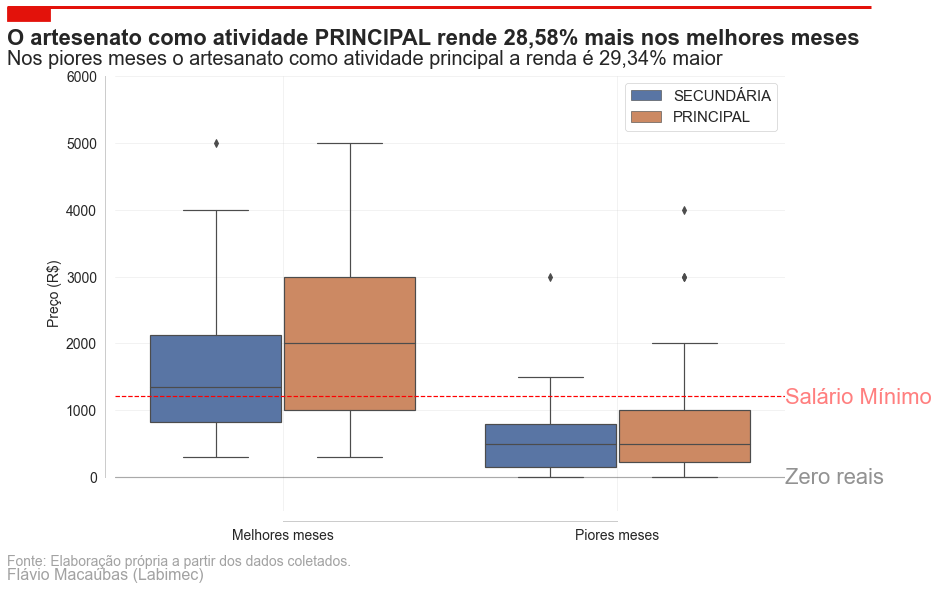

In [43]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Estética
template_grafico(TITULO = "O artesenato como atividade PRINCIPAL rende 28,58% mais nos melhores meses",
                SUB_TITULO = "Nos piores meses o artesanato como atividade principal a renda é 29,34% maior")

# ZERO reais
ax.axhline(0, ls='-', color = 'Black', alpha = 0.3)


# Gráfico
fig = sns.boxplot(y = 'RENDA',
                  x = 'CATEGORIA',
                  hue = 'ATIVIDADE',
                  data = renda)

# Salário Minínimo
ax.axhline(1212, ls='--', color = 'Red')


# Configurações dos eixos
ax.set(xlabel = '', 
       ylabel = 'Preço (R$)',
       xticklabels = ['Melhores meses', 'Piores meses'])

# Ajustando legenda

# Opacidade do grid
ax.grid(alpha = 0.3)

# Limites dos eixos
ax.set_ylim(-500, 6000)

# Formato do eixos
sns.despine(offset=10, trim=True)

# Anotações
plt.annotate('Zero reais', 
             xy=(1.5,-100),
             alpha = 0.5,  
             fontsize = 22)

# Salário mínimo

plt.annotate('Salário Mínimo', 
             xy=(1.5,1100),
             color = 'Red',
             alpha = 0.5,  
             fontsize = 22)

plt.legend()
#plt.savefig("Graficos/artesao_renda.png", dpi=1200, bbox_inches = "tight");
plt.show();



> Ter algum curso de artes pode **não afetar** o rendimento médio dos artesãos

Quando comparamos os melhores meses, aqueles que não fizeram nenhum curso ganham em média 17,12% mais. Nos piores meses essa diferença é de 61,34% significativamente maior. Esta informação reforça que a prática e aprendizado do artesanato tá **fortemente vinculado a questões familiarias e regionais**.

>**IMPORTANTE**

Para medir o real efeito de um curso (tratamento) sobre os artesãos, é necessário uma abordagem específica ao qual, em decorrência das limitações dos dados, não é possível. Como não como delimitar um grupo de controle pré-tratamento e pós-tratamento (similar para um grupo tratado), não é possível fazer conclusões precisas em relação do efeito de um curso no rendimento médio dos artesãos.

In [44]:
#@title
## 

# Criando dataframe para os preços
renda_arte = df.copy()
renda_arte = renda_arte.rename(columns={'3_12_QUANTO_GANHA_EM_MEDIA_COM_ARTESANATO_NOS_MELHORES_MESES_(R$)':"RENDA_ARTE_MELHORES",
                               '3_13_QUANTO_GANHA_EM_MEDIA_COM_ARTESANATO_NOS_PIORES_MESES_(R$)':'RENDA_ARTE_PIORES',
                              '1_7_JA_FEZ_ALGUM_CURSO_DE_ARTES':'CURSO'})

# Convertendo de wide para long
renda_arte = renda_arte[['CURSO','RENDA_ARTE_MELHORES','RENDA_ARTE_PIORES']]
renda_arte = renda_arte.melt(id_vars=['CURSO'], var_name='CATEGORIA', value_name='RENDA')


# Intervalo interquartílico
Q1 = renda_arte['RENDA'].quantile(0.25)
Q3 = renda_arte['RENDA'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando dataframe apenas para os preços dentro do intervalor interquartílico
renda_arte = renda_arte.query('(@Q1 - 1.5 * @IQR) <= RENDA <= (@Q3 + 1.5 * @IQR)')


renda_arte.groupby(['CURSO','CATEGORIA']).agg({'RENDA':'mean'})

RENDA
CURSO CATEGORIA                       
NÃO   RENDA_ARTE_MELHORES  2195.652174
      RENDA_ARTE_PIORES     860.877193
SIM   RENDA_ARTE_MELHORES  1874.489796
      RENDA_ARTE_PIORES     533.333333

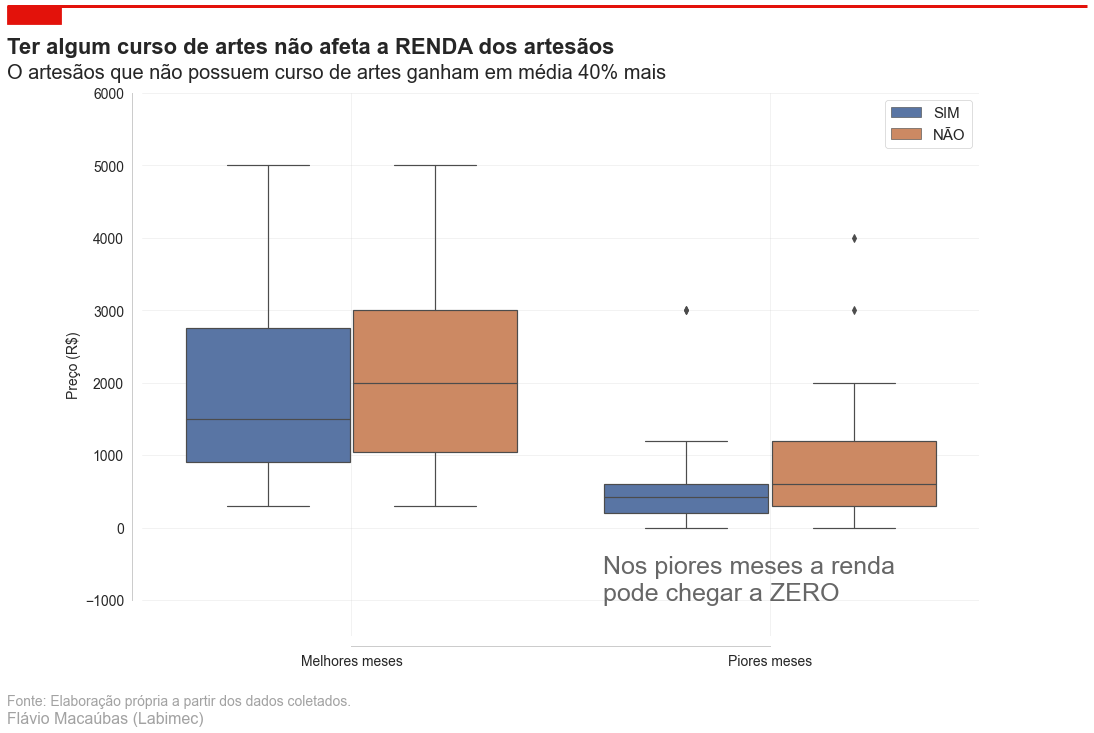

In [45]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(15, 10))

# Estética

# Estética
template_grafico(TITULO = "Ter algum curso de artes não afeta a RENDA dos artesãos",
                SUB_TITULO = "O artesãos que não possuem curso de artes ganham em média 40% mais")

# Gráfico
fig = sns.boxplot(y = 'RENDA',
                  x = 'CATEGORIA',
                  hue = 'CURSO',
                  data = renda_arte)

# Configurações dos eixos
ax.set(xlabel = '', 
       ylabel = 'Preço (R$)',
       xticklabels = ['Melhores meses', 'Piores meses'])

# Ajustando legenda

# Opacidade do grid
ax.grid(alpha = 0.3)

# Limites dos eixos
ax.set_ylim(-1500, 6000)

# Formato do eixos
sns.despine(offset=10, trim=True)

# Anotações
plt.annotate('Nos piores meses a renda\npode chegar a ZERO', 
             xy=(0.6,-1000),
             alpha = 0.7,  
             fontsize = 25)

plt.legend()
plt.show();

> O local que os entrevistados relataram maiores vendas foram nas **FEIRAS**

A internet foi citada em 23,6% das resposta, possivelmente há uma possibilidade de **ampliação do mercado** se este recurso for explorado de forma adequada. Loja própria foi a menos citada das respostas, representando apenas 7,9%.

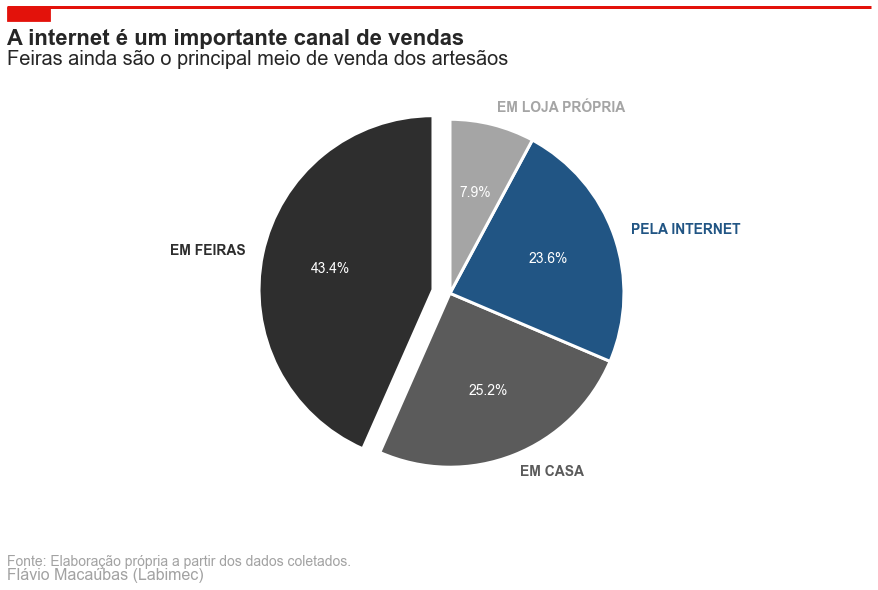

In [46]:
#@title 

# Informações
divulgacao = df['3_14_ONDE_VENDE_SEUS_PRODUTOS'].values         

divulgacao = list(divulgacao)

# Separa as opções selecionadas
divulgacao = [item.split(',') if ',' in item else item for item in divulgacao]

# Cria uma nova lista onde cada opção é 1 elemento
divulgacao_final = []
for opcao in divulgacao:
    if isinstance(opcao, list):
        for opcao_2 in opcao: 
            divulgacao_final.append(opcao_2.strip())
    else:
        divulgacao_final.append(opcao.strip())

# Cria dicionário de frequência
RESPOSTAS = ['EM CASA',
             'EM LOJA PRÓPRIA',
             'PELA INTERNET',
             'EM FEIRAS']

freqs = {'RESPOSTA':RESPOSTAS, 'QUANTIDADE':[0,0,0,0]}

for resp in divulgacao_final:
    if resp == RESPOSTAS[0]:
        freqs['QUANTIDADE'][0] += 1
    elif resp == RESPOSTAS[1]:
        freqs['QUANTIDADE'][1] += 1
    elif resp == RESPOSTAS[2]:
        freqs['QUANTIDADE'][2] += 1
    elif resp == RESPOSTAS[3]:
        freqs['QUANTIDADE'][3] += 1

# Cria data frame com frequência das respostas
divulgacoes = pd.DataFrame(freqs)

# Cria porcentagem
divulgacoes['PORCENTAGEM'] = divulgacoes.QUANTIDADE*100/divulgacoes.QUANTIDADE.sum()     

# Ordena as listas
divulgacoes = divulgacoes.sort_values('PORCENTAGEM', ascending = False)

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 4)))

# Cor em destaque
colors[2] = '#215584'

# Gráfico de pizza
values = divulgacoes['QUANTIDADE']
names = divulgacoes['RESPOSTA']

patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

# Estética
sns.despine(offset=10, trim=True)

template_grafico(TITULO = "A internet é um importante canal de vendas",
                SUB_TITULO = "Feiras ainda são o principal meio de venda dos artesãos");


#fig.savefig("Graficos/artesao_onde_mais_vendem.png", dpi=1200, bbox_inches = "tight");


> 69% dos artesãos **NÃO POSSUEM** CNPJ/Razão Social

Esta é uma informação preocupante, dado que com as facilitações geradas pelo MEI, espera-se uma tendência maior a formalização. A estruturação do negócio pode viabilizar ao artesão a utilização de recursos contábeis/financeiros, ajudando na previsibilidade e gerência do negócio.

>> Percentual de artesões que possuem CNPJ

|     |   3_15_POSSUI_CNPJ__RAZAO_SOCIAL |
|:----|---------------------------------:|
| NÃO |                          63.0252 |
| SIM |                          36.9748 |

In [47]:
#@title

#print((df['3_15_POSSUI_CNPJ__RAZAO_SOCIAL'].value_counts(normalize = True)*100).to_markdown())

> Os artesãos desejam **AUMENTAR AS VENDAS**.

Quando considerado todas as respostas, não apenas as listadas, existem artesãos que desejam todos os itens citados, aqueles que desejam mordenizar o maquinário e, corroborado pela análise anterior, desejam participar de mais feiras.

O desejo de formalizar foi o menos citado entre os entrevistados, apenas 5,95% apontaram ter essa intenção.

In [48]:
#@title
#df['3_17_VOCE_PRETENDE'].value_counts(normalize = True)*100

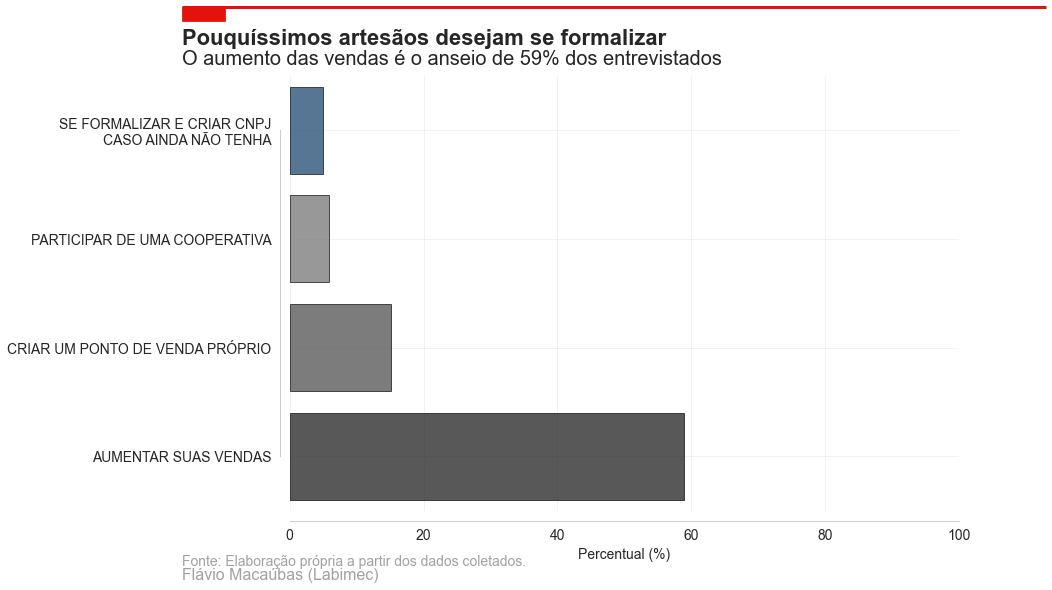

In [49]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, 4)))

# Cor em destaque
colors[0] = '#215584'
 
# Informações
# Filtrando apenas para 4 opções disponíveis
pretensoes = df.loc[(df['3_17_VOCE_PRETENDE'] == 'SE FORMALIZAR E CRIAR CNPJ CASO AINDA NÃO TENHA') |
                     (df['3_17_VOCE_PRETENDE'] == 'PARTICIPAR DE UMA COOPERATIVA') |
                     (df['3_17_VOCE_PRETENDE'] == 'CRIAR UM PONTO DE VENDA PRÓPRIO') |
                     (df['3_17_VOCE_PRETENDE'] == 'AUMENTAR SUAS VENDAS')]

pretensoes = pretensoes['3_17_VOCE_PRETENDE'].value_counts()*100/119

# Paleta de cores
pal = sns.color_palette('crest', 10)
pal = list(pal.as_hex())

# Estética
template_grafico(TITULO = "Pouquíssimos artesãos desejam se formalizar",
                SUB_TITULO = "O aumento das vendas é o anseio de 59% dos entrevistados");

# Ajustando labels
LABELS = list(pretensoes.index)
LABELS[-1] = 'SE FORMALIZAR E CRIAR CNPJ\nCASO AINDA NÃO TENHA'

# Gráfico
ax = sns.barplot(y = LABELS[::-1],
                 x = list(pretensoes.values)[::-1],
                 data = clientes,
                 palette=colors,
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)


#fig.savefig("Graficos/artesao_vontades.png", dpi=1200, bbox_inches = "tight");

In [50]:
pretensoes

AUMENTAR SUAS VENDAS                               58.823529
CRIAR UM PONTO DE VENDA PRÓPRIO                    15.126050
PARTICIPAR DE UMA COOPERATIVA                       5.882353
SE FORMALIZAR E CRIAR CNPJ CASO AINDA NÃO TENHA     5.042017
Name: 3_17_VOCE_PRETENDE, dtype: float64

> **ESPAÇO E CONDIÇÕES DE TRABALHO** representam as maiores dificuldades dos artesões.

O acesso ao crédito também foi um dificuldade bastante citada, representando 20,70%, das respostas.

In [51]:
#@title
#dificuldades_df

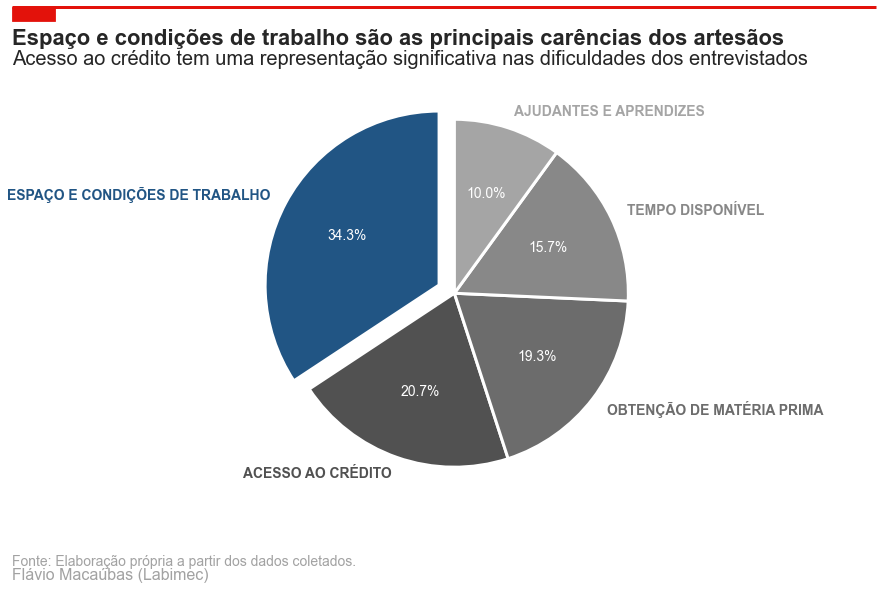

In [52]:
#@title 

# Informações
dificuldades = df['3_19_QUAL_A_MAIOR_DIFICULDADE_PARA_EXPANDIR_SUA_PRODUCAO'].values    
dificuldades = list(dificuldades)

# Separa as opções selecionadas
dificuldades = [item.split(',') if ',' in item else item for item in dificuldades]

# Cria uma nova lista onde cada opção é 1 elemento
dificuldades_final = []
for opcao in dificuldades:
    if isinstance(opcao, list):
        for opcao_2 in opcao: 
            dificuldades_final.append(opcao_2.strip())
    else:
        dificuldades_final.append(opcao.strip())

# Cria dicionário de frequência
RESPOSTAS = ['AJUDANTES E APRENDIZES',
             'ESPAÇO E CONDIÇÕES DE TRABALHO',
             'TEMPO DISPONÍVEL',
             'OBTENÇÃO DE MATÉRIA PRIMA',
             'ACESSO AO CRÉDITO']

freqs = {'RESPOSTA':RESPOSTAS, 'QUANTIDADE':[0,0,0,0,0]}

for resp in dificuldades_final:
    if resp == RESPOSTAS[0]:
        freqs['QUANTIDADE'][0] += 1
    elif resp == RESPOSTAS[1]:
        freqs['QUANTIDADE'][1] += 1
    elif resp == RESPOSTAS[2]:
        freqs['QUANTIDADE'][2] += 1
    elif resp == RESPOSTAS[3]:
        freqs['QUANTIDADE'][3] += 1
    elif resp == RESPOSTAS[4]:
        freqs['QUANTIDADE'][4] += 1

# Cria data frame com frequência das respostas
dificuldades_df = pd.DataFrame(freqs)

# Cria porcentagem
dificuldades_df['PORCENTAGEM'] = dificuldades_df.QUANTIDADE*100/dificuldades_df.QUANTIDADE.sum()     

# Ordena as listas
dificuldades_df = dificuldades_df.sort_values('PORCENTAGEM', ascending = False)

#Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'

# Gráfico de pizza
values = dificuldades_df['QUANTIDADE']
names = dificuldades_df['RESPOSTA']

patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0,0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

# Estética
sns.despine(offset=10, trim=True)

template_grafico(TITULO = "Espaço e condições de trabalho são as principais carências dos artesãos",
                SUB_TITULO = "Acesso ao crédito tem uma representação significativa nas dificuldades dos entrevistados");

#fig.savefig("Graficos/artesao_dificuldades.png", dpi=1200, bbox_inches = "tight");

> 43,3% dos artesãos desejam **MELHORAR A QUALIDADE** DE VIDA em 2022.

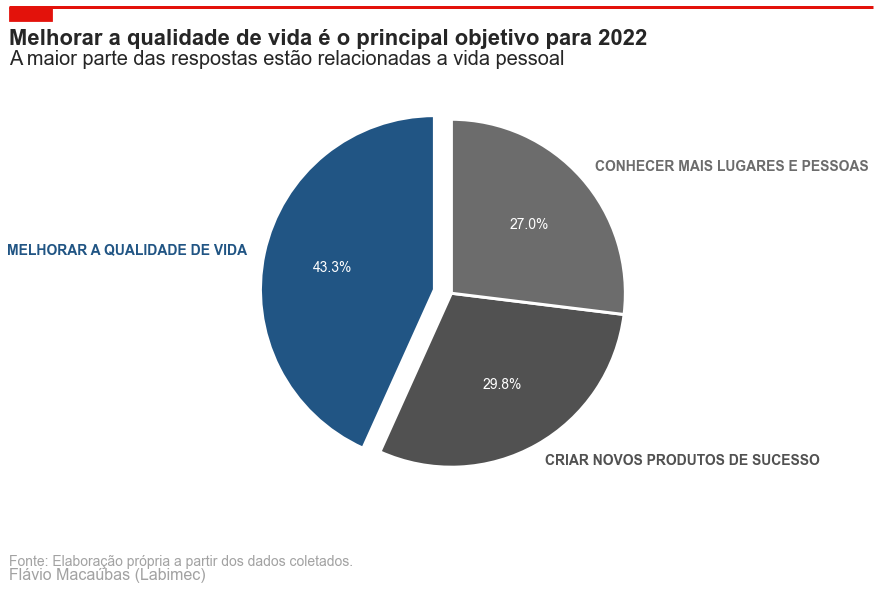

In [53]:
#@title 

# Informações
desejos = df['3_20_QUAL_SEU_MAIOR_DESEJO_PARA_2022,_QUE_O_ARTESANATO_POSSA_TE_PROPORCIONAR'].values    
desejos = list(desejos)

# Separa as opções selecionadas
desejos = [item.split(',') if ',' in item else item for item in desejos]

# Cria uma nova lista onde cada opção é 1 elemento
desejos_final = []
for opcao in desejos:
    if isinstance(opcao, list):
        for opcao_2 in opcao: 
            desejos_final.append(opcao_2.strip())
    else:
        desejos_final.append(opcao.strip())

# Cria dicionário de frequência
RESPOSTAS = ['CRIAR NOVOS PRODUTOS DE SUCESSO',
             'MELHORAR A QUALIDADE DE VIDA',
             'CONHECER MAIS LUGARES E PESSOAS']

freqs = {'RESPOSTA':RESPOSTAS, 'QUANTIDADE':[0,0,0]}

for resp in desejos_final:
    if resp == RESPOSTAS[0]:
        freqs['QUANTIDADE'][0] += 1
    elif resp == RESPOSTAS[1]:
        freqs['QUANTIDADE'][1] += 1
    elif resp == RESPOSTAS[2]:
        freqs['QUANTIDADE'][2] += 1


# Cria data frame com frequência das respostas
desejos_df = pd.DataFrame(freqs)

# Cria porcentagem
desejos_df['PORCENTAGEM'] = desejos_df.QUANTIDADE*100/desejos_df.QUANTIDADE.sum()     

# Ordena as listas
desejos_df = desejos_df.sort_values('PORCENTAGEM', ascending = False)

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'

# Gráfico de pizza
values = desejos_df['QUANTIDADE']
names = desejos_df['RESPOSTA']

patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

# Estética
sns.despine(offset=10, trim=True)


template_grafico(TITULO = "Melhorar a qualidade de vida é o principal objetivo para 2022",
                SUB_TITULO = "A maior parte das respostas estão relacionadas a vida pessoal");


#fig.savefig("Graficos/artesao_anseios.png", dpi=1200, bbox_inches = "tight");


> 80% dos entrevistados **TEM INTERESSE** em participar de uma feira dominical no centro de João pessoa

In [54]:
#@title
#df['3_21_VOCE_TEM_INTERESSE_EM_PARTICIPAR_DE_UMA_FEIRA_DOMINICAL_DE_ARTE_E_ARTESANATO_NO_CENTRO_DE_JOAO_PESSOA'].value_counts(normalize = True)

> Apoio a artesanato, realização de feiras e eventos, um canal de comunicação com a prefeitura são exemplos das **SUGESTÕES** do artesãos. 

As sugestões são as mais variadas possíveis, a recomendação é que cada caso seja analisado de forma individual por um grupo de pessoas com amplo entendimento do setor, para que seja possível um melhor desenho para os formulários no futuro.

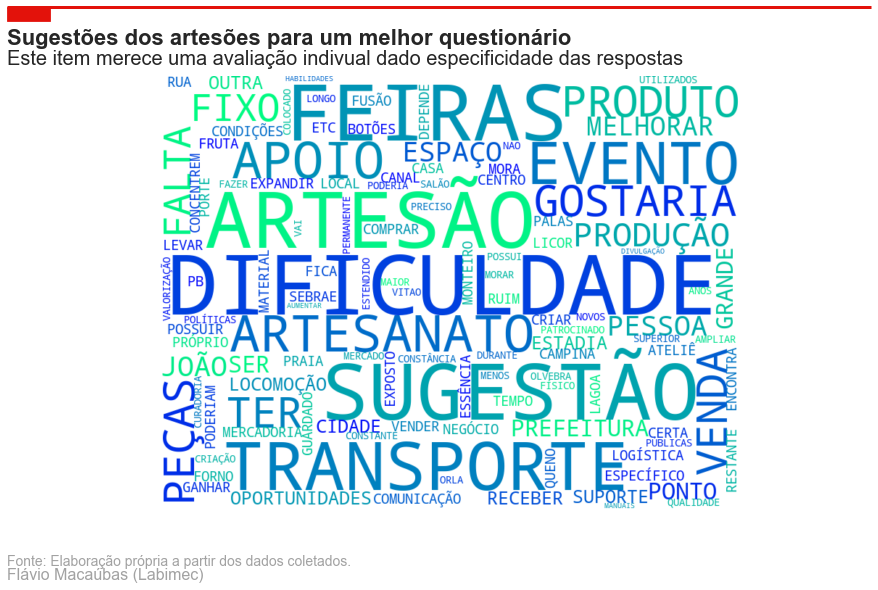

In [55]:
#@title
# Criando texto dos produto_mais_vende
produto_mais_vende = df.loc[df['3_22_GOSTARIA_DE_RELATAR_ALGUMA_DIFICULDADE_OU_PERSPECTIVA_QUE_NAO_FORAM_CONTEMPLADAS_NA_PESQUISA'] != 'NAN', '3_22_GOSTARIA_DE_RELATAR_ALGUMA_DIFICULDADE_OU_PERSPECTIVA_QUE_NAO_FORAM_CONTEMPLADAS_NA_PESQUISA'].values
produto_mais_vende = list(produto_mais_vende)
produto_mais_vende = ' '.join(produto_mais_vende)
produto_mais_vende = produto_mais_vende.split()
produto_mais_vende = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in produto_mais_vende] # Retira caracteres indesejados
produto_mais_vende = [pal for pal in produto_mais_vende if pal not in STOP_WORD_PT] # Retira stop word

produto_mais_vende = ' '.join(produto_mais_vende)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 2,
                      background_color = 'white').generate(produto_mais_vende)


template_grafico(TITULO = "Sugestões dos artesões para um melhor questionário",
                SUB_TITULO = "Este item merece uma avaliação indivual dado especificidade das respostas");

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Graficos/artesao_sugestoes.png", dpi=1200, bbox_inches = "tight");
plt.show()

-----------------------------

## Quem é o cliente? - DEMANDA LOCAL

### A maioria dos visitantes locais moram na Praia

Os bairros mais citados foram Cabo Branco (11,9%) e Bancários (10,9%).

>> Os 5 bairros de onde os turistas locais são

|                       |   Bairro Onde Mora    |
|:----------------------|----------------------:|
| CABO BRANCO           |             0.118812  |
| BANCARIOS             |             0.108911  |
| MANAIRA               |             0.0693069 |
| ALTIPLANO CABO BRANCO |             0.0594059 |
| TAMBAUZINHO           |             0.0594059 |

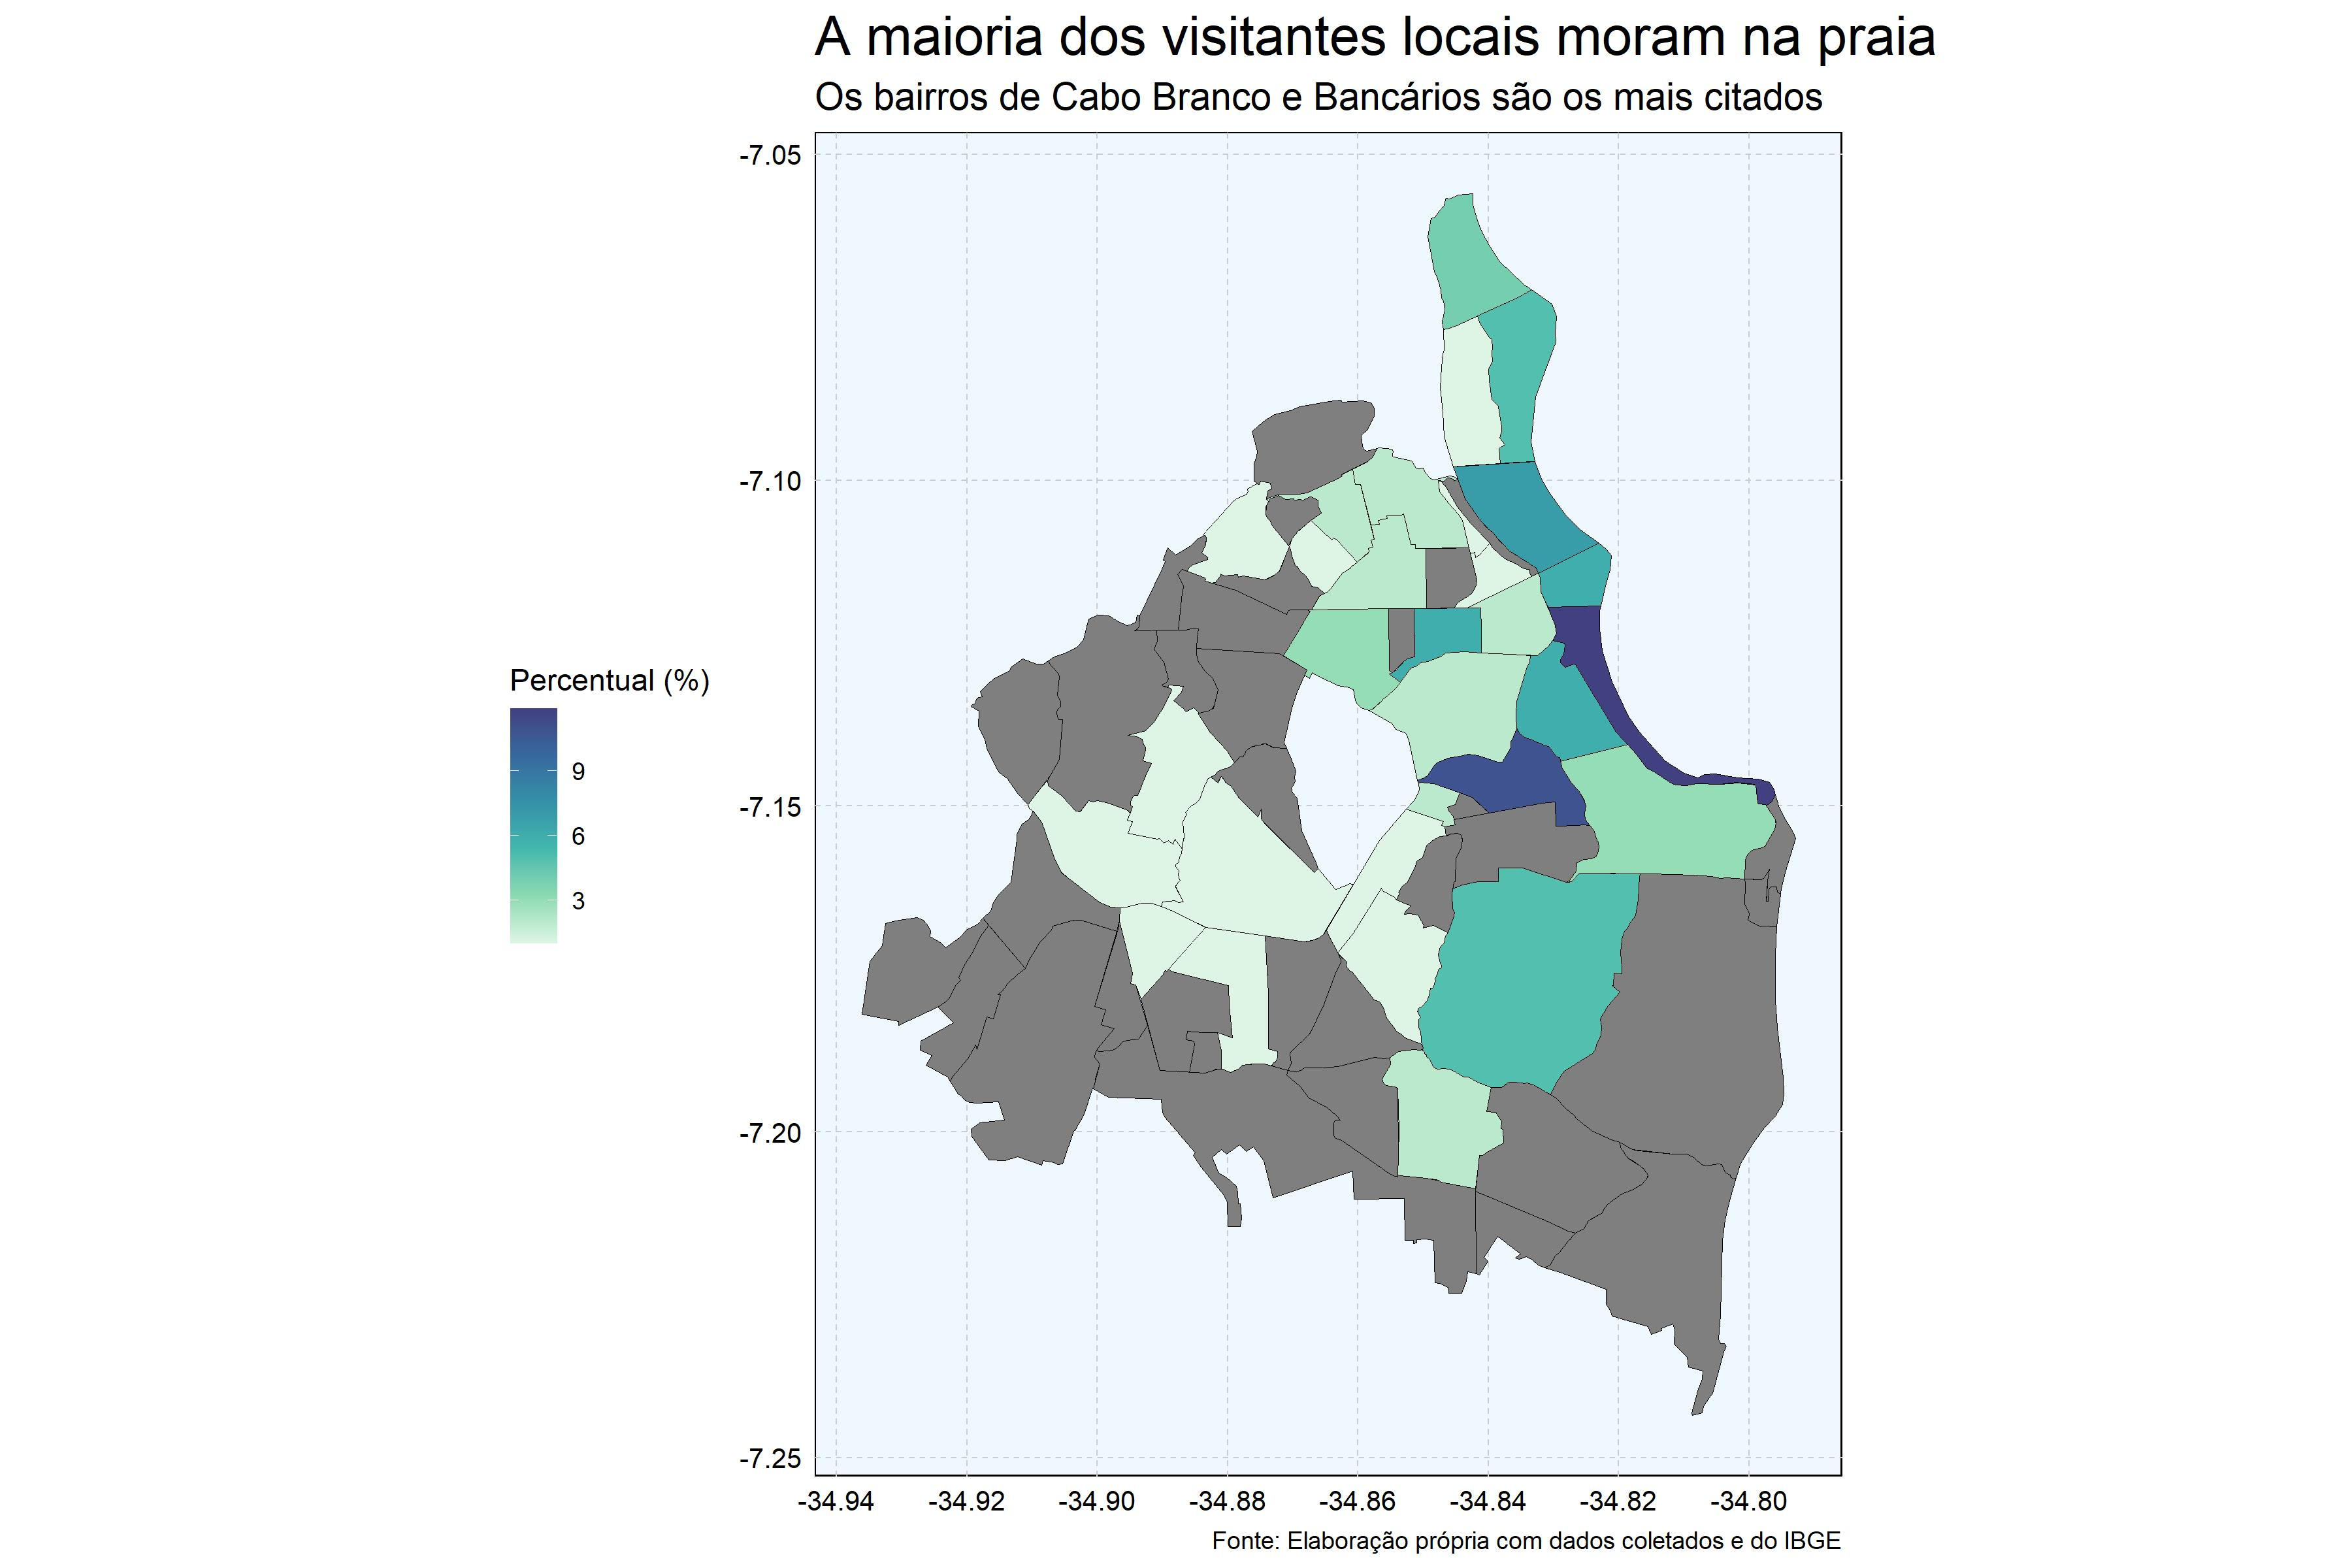

In [56]:
IMAGEM = "C:/Users/Macaubas/Desktop/Python/Labimec/Artesanato/Imagens/Mapas/bairro_vivem.jpg"
Image(filename = IMAGEM, width=900, height=600)

In [57]:
#print(demanda_local['2__BAIRRO_ONDE_MORA'].value_counts(normalize = True).head().to_markdown())

> **Mais da metade** dos visitantes locais vivem com a família

Quando consideramos companheiros(as) esse montante chega a 76,2%

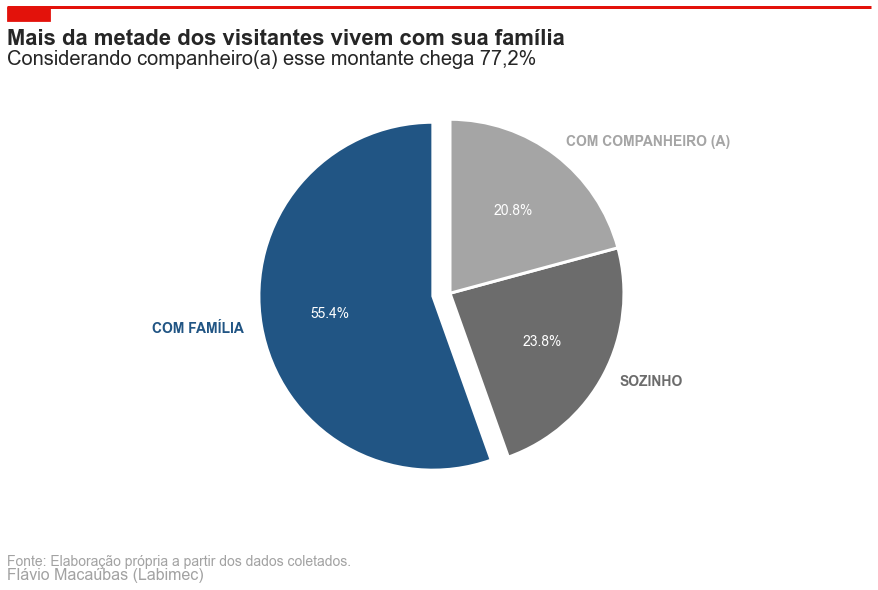

In [58]:
#@title

# Informações
com_quem_vive = demanda_local['3__COM_QUEM_VIVE'].value_counts()

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Quatro diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 3)))

# Cor em destaque
colors[0] = '#215584'

# Valores
values = com_quem_vive.values
names = com_quem_vive.index

# Cores
pal = sns.color_palette('crest', 4)
pal = list(pal.as_hex())

# Gráfico
patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())


# Estética
template_grafico(TITULO = "Mais da metade dos visitantes vivem com sua família", 
                 SUB_TITULO = "Considerando companheiro(a) esse montante chega 77,2%")


plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

> 42,57% dos visitantes são de **João Pessoa**.

Rio de Janeiro (7,9%) e São Paulo (5,9%) são os segundos municípios mais presentes entre os entrevistados. 

>> Percentual da naturalidade dos turistas locais

|                   |   4__NATURAL_DE |
|:------------------|----------------:|
| JOÃO PESSOA       |       42.5743   |
| RIO DE JANEIRO    |        7.92079  |
| SÃO PAULO         |        5.94059  |
| RECIFE            |        3.9604   |
| CAMPINA GRANDE    |        2.9703   |
| NAN               |        2.9703   |
| GUARABIRA         |        2.9703   |
| RIO GRANDE DO SUL |        1.9802   |
| PATOS             |        1.9802   |
| ARARUNA           |        0.990099 |


> A maioria é da **Paraíba**

A Paraíba representa 63% dos turistas locais, seguidos por Pernambuco com 9,9% e Rio de Janeiro com 7,9%

|     |   ESTADO_NATURAL |
|:----|-----------------:|
| PB  |        63.3663   |
| PE  |         9.90099  |
| RJ  |         7.92079  |
| SP  |         6.93069  |
| RS  |         1.9802   |
| DF  |         1.9802   |
| CE  |         1.9802   |
| RN  |         1.9802   |
| NAN |         0.990099 |
| MG  |         0.990099 |


In [59]:
#print((demanda_local['4__NATURAL_DE'].value_counts(normalize = True)*100).head(10).to_markdown())
#print((demanda_local['ESTADO_NATURAL'].value_counts(normalize = True)*100).head(10).to_markdown())

> Aqueles que são de João Pessoa moram em média a anos na cidade

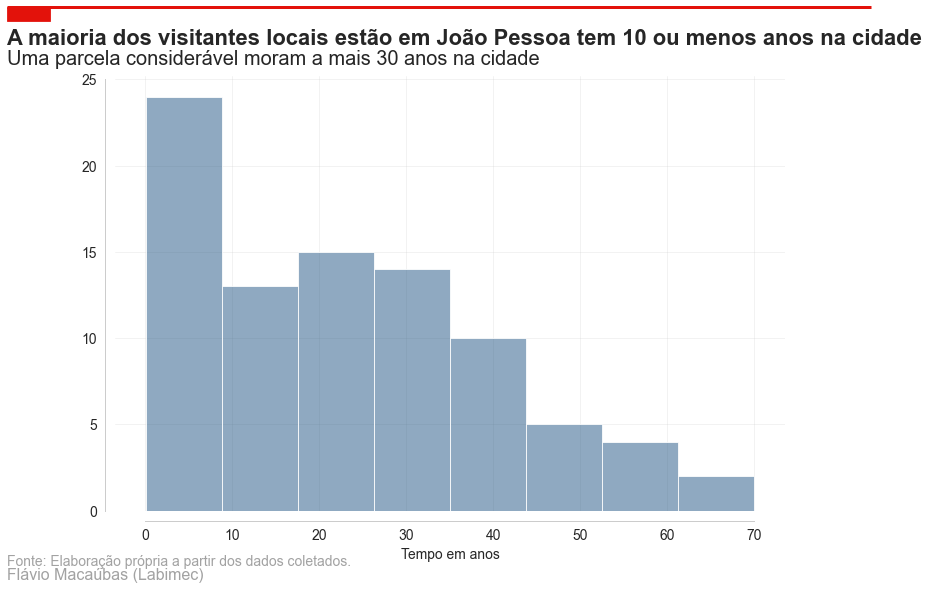

In [60]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Criando novo dataframe para peças
tempo_jp = demanda_local.copy()

# Estética
template_grafico(TITULO = "A maioria dos visitantes locais estão em João Pessoa tem 10 ou menos anos na cidade",
                SUB_TITULO = "Uma parcela considerável moram a mais 30 anos na cidade");


fig = sns.histplot(tempo_jp['5__HA_QUANTO_ANOS_EM_JOAO_PESSOA'], 
                  color = '#215584',
                  alpha = 0.5)


# Configurações dos eixos
ax.set(xlabel = 'Tempo em anos', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixo
sns.despine(offset=10, trim=True)

plt.show();

> 92% **encontraram** o que procuravam na feira

Aqueles que não encontraram o que procuravam elencaram os seguintes pontos:

* Procuravam especificamente **peças de madeira de um artesão de Santa Luzia**;

* Procuravam **Pássaro de Feltro e/ou Crochê**

* Procuravam **Saia** acima do joelho de algodão natural

* Não gostou de ver tecido **Poliester da China** vendido como artesanato

In [61]:
#print((demanda_local['6__VOCE_ENCONTROU_O_QUE_PROCURAVA_NA_FEIRA'].value_counts(normalize = True)*100).to_markdown())

In [62]:
#demanda_local['6_1_SE_A_RESPOSTA_ACIMA_FOR_NAO,_O_QUE_VOCE_NAO_ENCONTROU'].value_counts()

> 75% **não sentiu falta** de nenhum produto

Aqueles que sentiram faltam, elencaram os seguintes itens:

* Itens de alimentação

* Trabalhos feitos com Quartzo

* Espírito Santo de Madeira

* Rende Bilro

* Cristais

* Coca femininos

* Muitos produtos repetidos

* Maior variedade de itens em outros anos

In [63]:
#print((demanda_local['7__SENTIU_FALTA_DE_ALGUM_PRODUTO'].value_counts(normalize = True)*100).to_markdown())

In [64]:
#demanda_local['7_1_SE_A_RESPOSTA_ACIMA_FOR_SIM,_QUAL_PRODUTO_VOCE_SENTIU_FALTA'].value_counts()

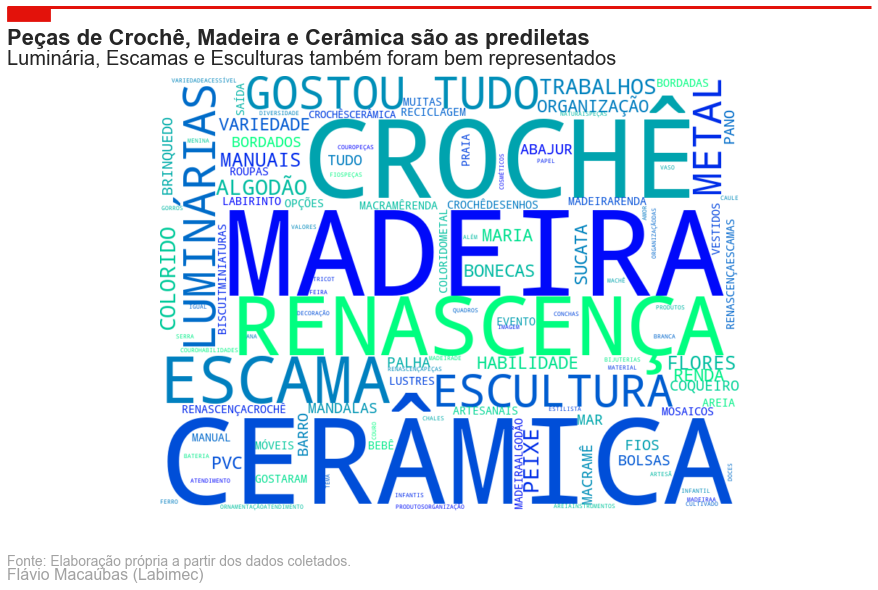

In [65]:
demanda_local['8__DO_QUE_MAIS_GOSTOU'].value_counts()

#@title
# Criando texto dos mais_gostou
mais_gostou = demanda_local.loc[demanda_local['8__DO_QUE_MAIS_GOSTOU'] != 'NAN', '8__DO_QUE_MAIS_GOSTOU'].values
mais_gostou = list(mais_gostou)
mais_gostou = ' '.join(mais_gostou)
mais_gostou = mais_gostou.split()
mais_gostou = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in mais_gostou] # Retira caracteres indesejados
mais_gostou = [pal for pal in mais_gostou if pal not in STOP_WORD_PT] # Retira stop word
mais_gostou = [pal for pal in mais_gostou if pal != 'PEÇAS'] # Retirando palavra peças
mais_gostou = [pal for pal in mais_gostou if pal != 'ARTESANATO'] # Retirando palavra artesanato
mais_gostou = [pal for pal in mais_gostou if pal != 'TRABALHO'] # Retirando palavra TRABALHO


mais_gostou = ' '.join(mais_gostou)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 2,
                      background_color = 'white').generate(mais_gostou)


template_grafico(TITULO = "Peças de Crochê, Madeira e Cerâmica são as prediletas",
                SUB_TITULO = "Luminária, Escamas e Esculturas também foram bem representados");

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

#plt.savefig("Graficos/local_prediletos.png", dpi=1200, bbox_inches = "tight");
plt.show()



> O gasto médio com artesanto por visitantes locais foi de **R\$ 111,80**

In [66]:
# Informações
comprou_local = list(demanda_local.loc[demanda_local['9__QUANTO_COMPROU_DE_ARTESANATO_NA_FEIRA'] != 'NAN', '9__QUANTO_COMPROU_DE_ARTESANATO_NA_FEIRA'].dropna().values)
comprou_local = [float(valor) for valor in comprou_local]

#print(f'Média gasto {np.mean(comprou_local):.2f}')


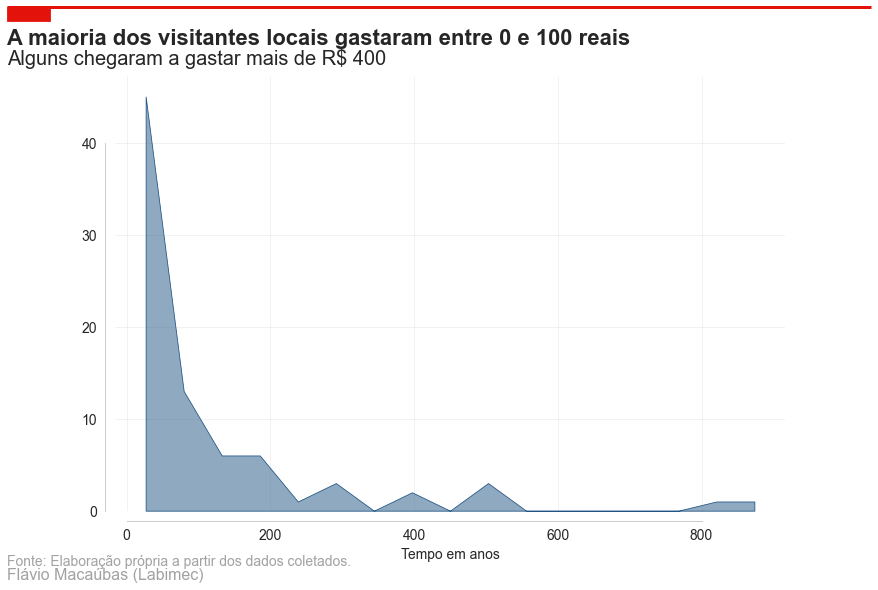

In [67]:
# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Estética
template_grafico(TITULO = "A maioria dos visitantes locais gastaram entre 0 e 100 reais",
                SUB_TITULO = "Alguns chegaram a gastar mais de R$ 400");


fig = sns.histplot(comprou_local, 
                  color = '#215584',
                  element = 'poly',
                  alpha = 0.5)


# Configurações dos eixos
ax.set(xlabel = 'Tempo em anos', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixo
sns.despine(offset=10, trim=True)

#plt.savefig("Graficos/local_gastos.png", dpi=1200, bbox_inches = "tight");

plt.show();

> 43% dos visitantes locais preferem artesanato **tradicional**

37,6% não quiseram opinar e 18,9% preferem artesanato contemporâneo.

In [68]:
#print(demanda_local['10__COMPROU_PRINCIPALMENTE'].value_counts(normalize = True)*100)

> 55,4% dos visitantes locais compraram itens de **Uso Pessoal** ou **Decoração**

48,51% dos entrevistado alegaram terem comprados artigos para uso próprio, enquanto apenas 14% para presente. Uma possível explicação pra discrepância entre os itens 10 e 11 deve-se ao fato de um possível "auto-presente" que os indivíduos possam ter entendido da pergunta.

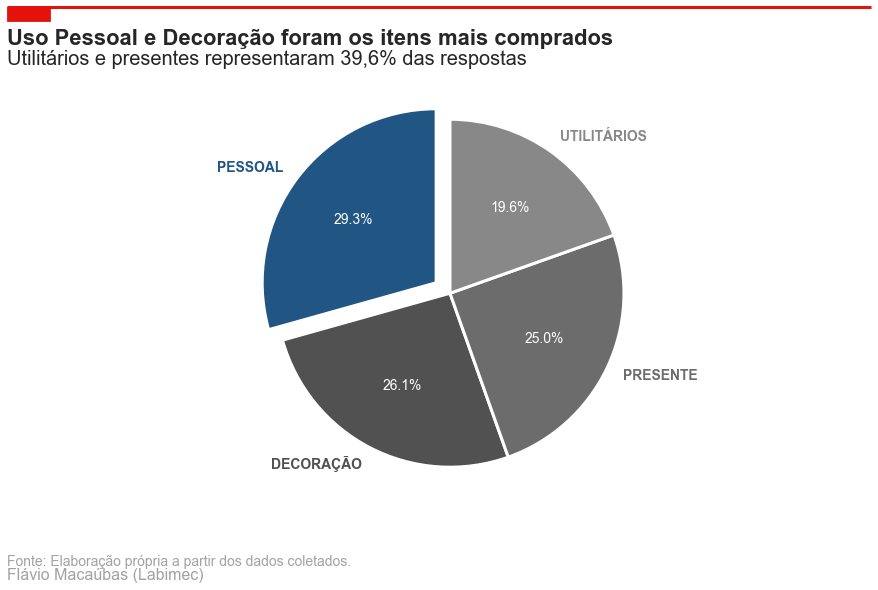

In [69]:
# Informações
uso_da_compra = demanda_local['10_1_O_ARTESANATO_QUE_VOCE_COMPROU_FOI_DE_USO'].values    
uso_da_compra = list(uso_da_compra)

# Separa as opções selecionadas
uso_da_compra = [item.split(',') if ',' in item else item for item in uso_da_compra]

# Cria uma nova lista onde cada opção é 1 elemento
uso_da_compra_final = []
for opcao in uso_da_compra:
    if isinstance(opcao, list):
        for opcao_2 in opcao: 
            uso_da_compra_final.append(opcao_2.strip())
    else:
        uso_da_compra_final.append(opcao.strip())

# Cria dicionário de frequência
RESPOSTAS = ['PESSOAL',
             'DECORAÇÃO',
             'PRESENTE',
             'UTILITÁRIOS']

freqs = {'RESPOSTA':RESPOSTAS, 'QUANTIDADE':[0,0,0,0]}

for resp in uso_da_compra_final:
    if resp == RESPOSTAS[0]:
        freqs['QUANTIDADE'][0] += 1
    elif resp == RESPOSTAS[1]:
        freqs['QUANTIDADE'][1] += 1
    elif resp == RESPOSTAS[2]:
        freqs['QUANTIDADE'][2] += 1
    elif resp == RESPOSTAS[3]:
        freqs['QUANTIDADE'][3] += 1


# Cria data frame com frequência das respostas
uso_da_compra_df = pd.DataFrame(freqs)

# Cria porcentagem
uso_da_compra_df['PORCENTAGEM'] = uso_da_compra_df.QUANTIDADE*100/uso_da_compra_df.QUANTIDADE.sum()     

# Ordena as listas
uso_da_compra_df = uso_da_compra_df.sort_values('PORCENTAGEM', ascending = False)

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'

# Gráfico de pizza
values = uso_da_compra_df['QUANTIDADE']
names = uso_da_compra_df['RESPOSTA']

patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

# Estética
sns.despine(offset=10, trim=True)


template_grafico(TITULO = "Uso Pessoal e Decoração foram os itens mais comprados",
                SUB_TITULO = "Utilitários e presentes representaram 39,6% das respostas");


In [70]:
#print(demanda_local['11__DESTINO_DA_COMPRA'].value_counts(normalize = True)*100)

> 34,65% dos visitantes locais responderam que a Beleza do produto foi determinante para a compra

A maioria não quis responder (37,62%), enquanto preço foi o fator menos determinante com apenas 7,92% das escolhas.

>> Principais motivos de compra

|           |   12__PRINCIPAL_MOTIVACAO_DA_COMPRA |
|:----------|------------------------------------:|
| NÃO RESPONDEU       |                            37.6238  |
| BELEZA    |                            34.6535  |
| UTILIDADE |                            10.8911  |
| NOVIDADE  |                             8.91089 |
| PREÇO     |                             7.92079 |

In [71]:
motivacao_compra = demanda_local['12__PRINCIPAL_MOTIVACAO_DA_COMPRA'].value_counts(normalize = True)*100

#print(motivacao_compra.to_markdown())

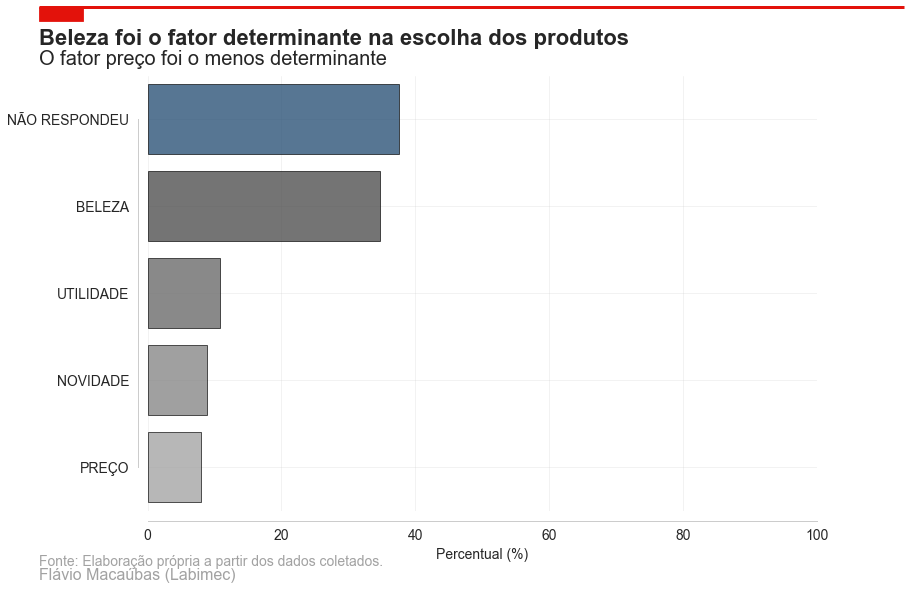

In [72]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'
 

# Paleta de cores
pal = sns.color_palette('crest', 10)
pal = list(pal.as_hex())

# Estética
template_grafico(TITULO = "Beleza foi o fator determinante na escolha dos produtos",
                SUB_TITULO = "O fator preço foi o menos determinante");

# Ajustando labels
LABELS = list(motivacao_compra.index)
LABELS[0] = 'NÃO RESPONDEU'

# Gráfico
ax = sns.barplot(y = LABELS,
                 x = motivacao_compra.values,
                 data = clientes,
                 palette=colors,
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)

> 72% dos visitantes locais são vão a feiras **ocasionalmente**.

26,73% do entrevistados alegaram que são frequentadores assíduos, cerca de um quarto da amostra.

In [73]:
#demanda_local['13__VOCE_SE_CONSIDERA_UM_COMPRADOR_DE_ARTESANATO'].value_counts(normalize = True)*100

> A maior parte das peças de artesanato que os consumidores locais possuem **são da Paraíba**.

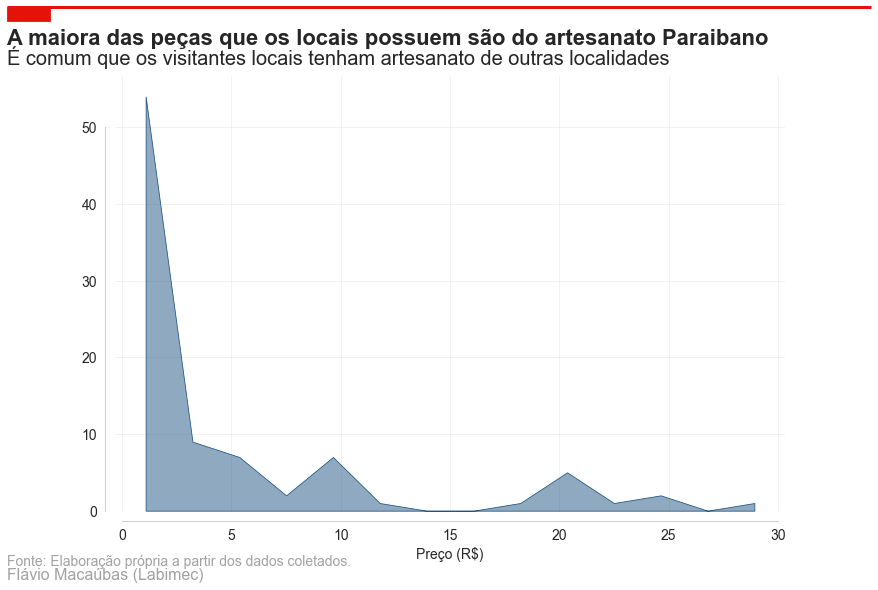

In [74]:
# Informação
demanda_local['DIF_PECA_LOCAL'] = demanda_local['14__QUANTAS_PECAS_DE_ARTESANATO_VOCE_ESTIMA_TER_EM_SUA_CASA'] - demanda_local['15_QUANTAS_SAO_DO_ARTESANATO_PARAIBANO']

# Intervalo interquartílico
Q1 = demanda_local['DIF_PECA_LOCAL'].quantile(0.25)
Q3 = demanda_local['DIF_PECA_LOCAL'].quantile(0.75)
IQR = Q3 - Q1


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Estética
template_grafico(TITULO = "A maiora das peças que os locais possuem são do artesanato Paraibano",
                SUB_TITULO = "É comum que os visitantes locais tenham artesanato de outras localidades");


fig = sns.histplot(demanda_local['DIF_PECA_LOCAL'], 
                   color = '#215584',
                   element = 'poly',
                   alpha = 0.5)


# Configurações dos eixos
ax.set(xlabel = 'Preço (R$)', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixo
sns.despine(offset=10, trim=True)

plt.show();


> A principal sugestão dos consumidores locais é a **DIVULGAÇÃO**

Uma parcela considerável respondeu que gostou de tudo, palavras como incentivar, incentivo e aumentar também estão presentes. Neste ponto, sugere-se uma abordagem mais manual e humana para identificar quais os elementos que são plausíveis e quais sugestões devem ser incorporadas.

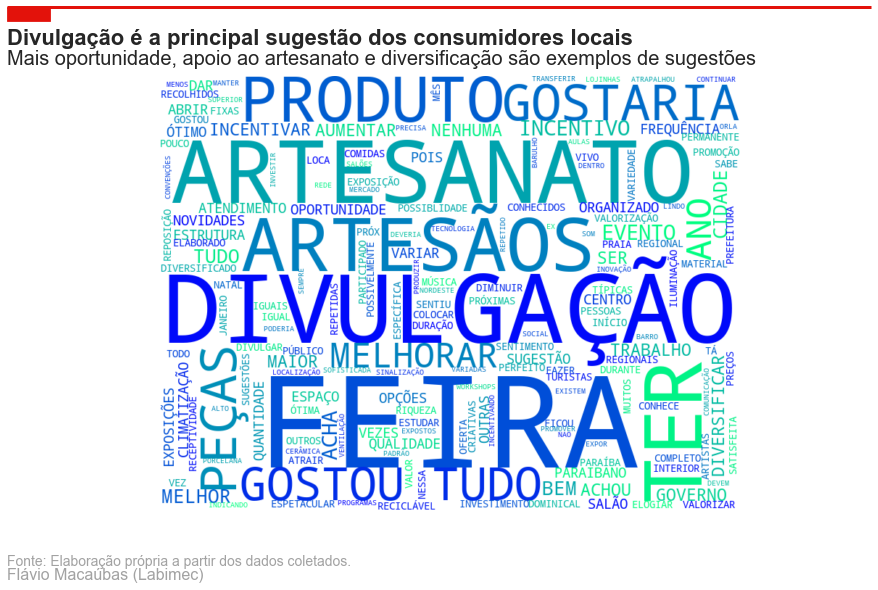

In [75]:
#@title
# Criando texto dos sugestao_melhoria
sugestao_melhoria = demanda_local.loc[demanda_local['16_QUAL_SUA_SUGESTAO_PARA_MELHORAR_OU_DIVERSIFICAR_O_ARTESANATO_PARAIBANO'] != 'NAN', '16_QUAL_SUA_SUGESTAO_PARA_MELHORAR_OU_DIVERSIFICAR_O_ARTESANATO_PARAIBANO'].values
sugestao_melhoria = list(sugestao_melhoria)
sugestao_melhoria = ' '.join(sugestao_melhoria)
sugestao_melhoria = sugestao_melhoria.split()
sugestao_melhoria = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in sugestao_melhoria] # Retira caracteres indesejados
sugestao_melhoria = [pal for pal in sugestao_melhoria if pal not in STOP_WORD_PT] # Retira stop word
sugestao_melhoria = [pal for pal in sugestao_melhoria if pal != 'SUGESTÃO'] # Retirando palavra sugestão



sugestao_melhoria = ' '.join(sugestao_melhoria)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 2,
                      background_color = 'white').generate(sugestao_melhoria)


template_grafico(TITULO = "Divulgação é a principal sugestão dos consumidores locais",
                SUB_TITULO = "Mais oportunidade, apoio ao artesanato e diversificação são exemplos de sugestões");

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Graficos/local_sugestoes.png", dpi=1200, bbox_inches = "tight");
plt.show();

## Quem é o cliente? - DEMANDA TURISTA

>> São Paulo e Paraíba são as **principais origem dos turistas** representando 13,2% das respostas

A Bahia foi responsável por 11,32% das resposta, Distrito Federal (9,43%) e Rio de Janeiro (7,54%). Existiam turistas de todos os estados do Centro-Oeste.

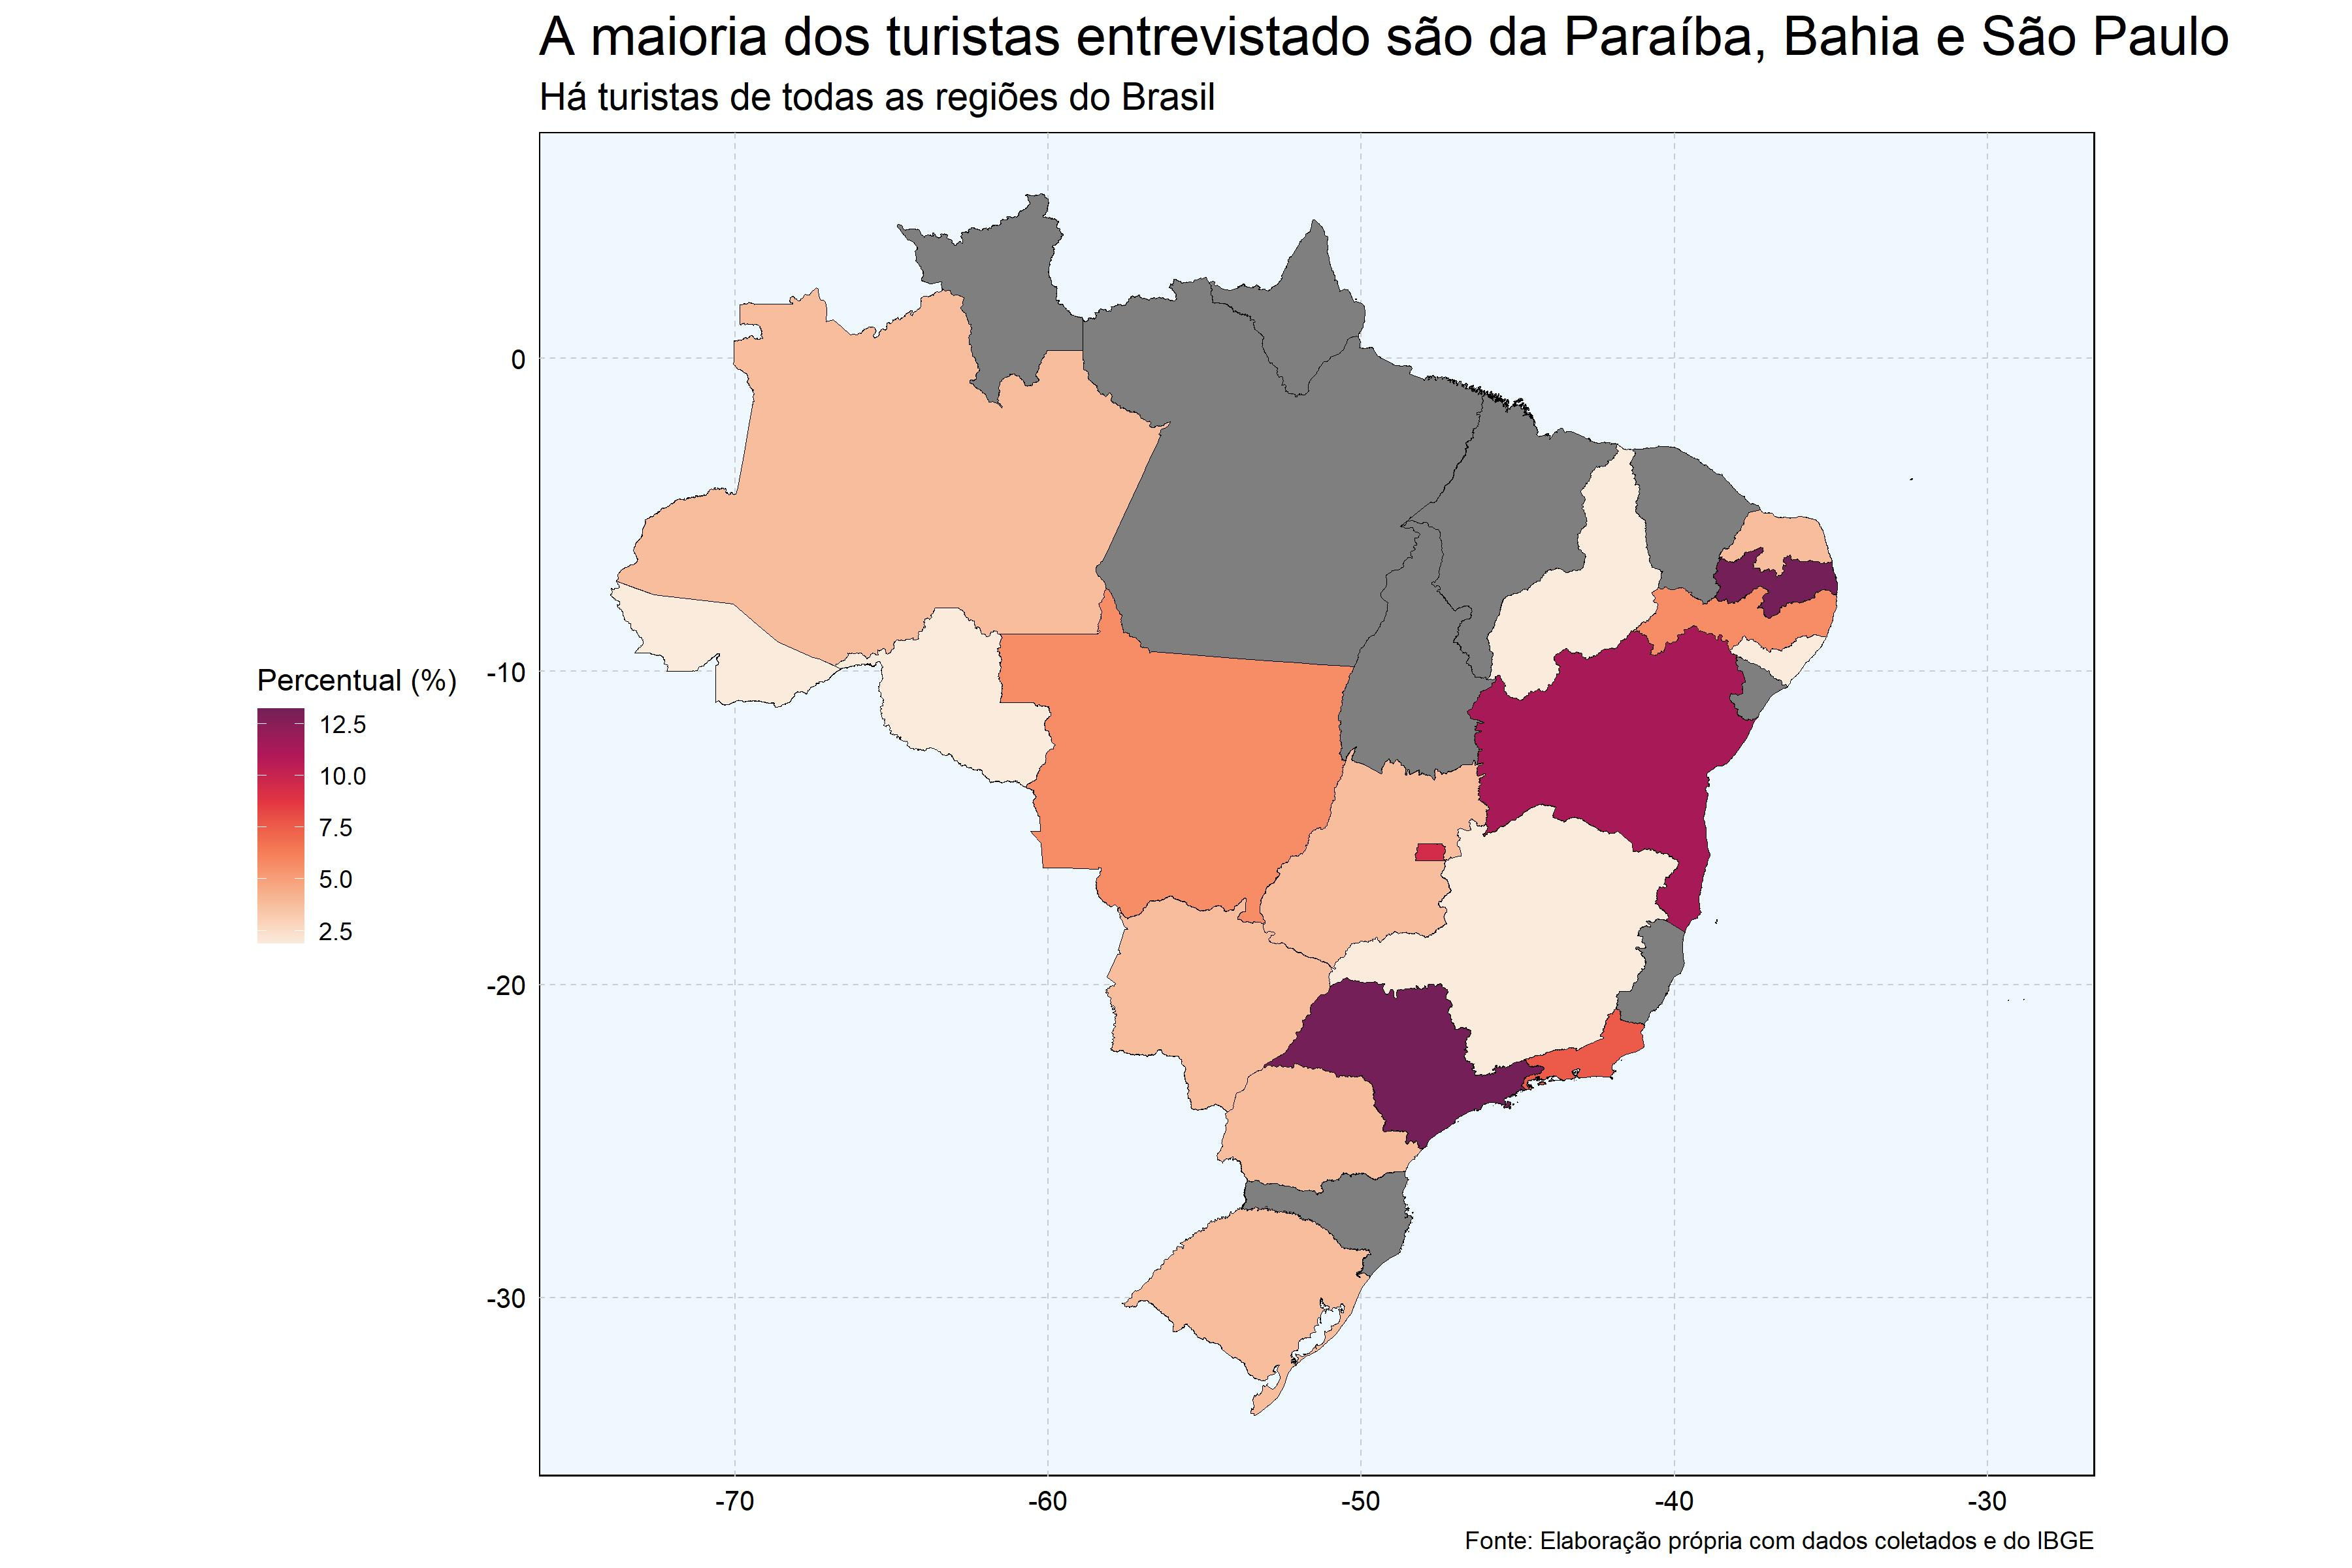

In [76]:
IMAGEM = "C:/Users/Macaubas/Desktop/Python/Labimec/Artesanato/Imagens/Mapas/estados_origem.jpg"
Image(filename = IMAGEM, width=900, height=600)

In [77]:
#print(demanda_turista['ESTADO_ORIGEM'].value_counts(normalize = True)*100)

> 56,60% dos turistas visitiram João Pessoa com a **Família**

Quando consideramos aqueles que visitiram com companheiro(a) este montante chega a 88,7%. Os que visitaram sozinho representaram 9,43%.

In [78]:
#print(demanda_turista['1_3_COM_QUEM_VEIO'].value_counts(normalize = True)*100)

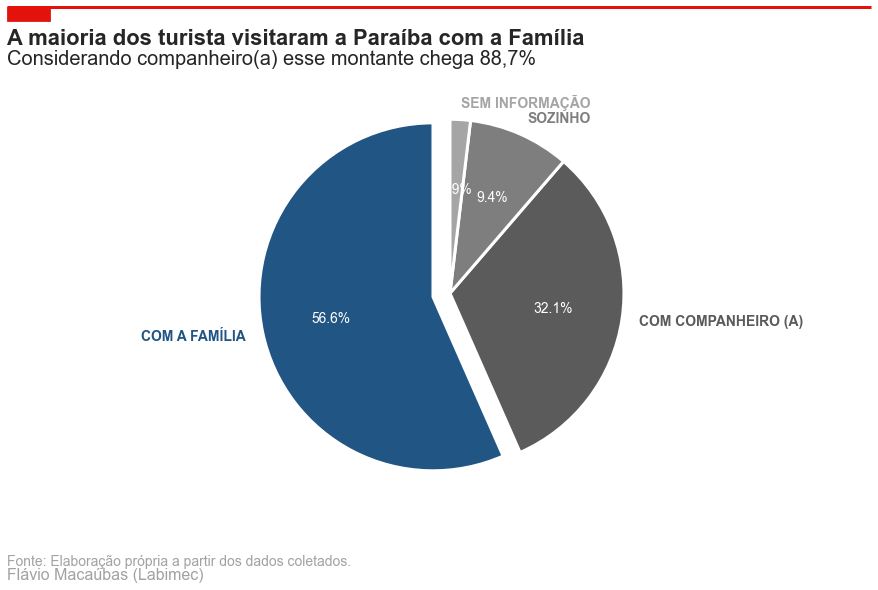

In [79]:
#@title

# Informações
com_quem_veio = demanda_turista['1_3_COM_QUEM_VEIO'].value_counts()

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Quatro diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 4)))

# Cor em destaque
colors[0] = '#215584'

# Valores
values = com_quem_veio.values
names = list(com_quem_veio.index)
names[-1] = 'SEM INFORMAÇÃO'

# Cores
pal = sns.color_palette('crest', 4)
pal = list(pal.as_hex())

# Gráfico
patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())


# Estética
template_grafico(TITULO = "A maioria dos turista visitaram a Paraíba com a Família", 
                 SUB_TITULO = "Considerando companheiro(a) esse montante chega 88,7%")


plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

> Os turistas ficaram em média **14 dias** na cidade

Algumas responderam que passariam 4 meses na cidade. A menor resposta para este quesito foi de 1 dia.

~~~
Tabela - Estatística descritiva da quantidade de dias que os turistas pretendem ficar em João Pessoa
~~~

|       |   1_5_QUANTOS_DIAS_FICARA_EM_JOAO_PESSOA |
|:------|-----------------------------------------:|
| count |                                    51    |
| mean  |                                    14.98 |
| std   |                                    21.77 |
| min   |                                     1    |
| 25%   |                                     4    |
| 50%   |                                     7    |
| 75%   |                                    16    |
| max   |                                   120    |


In [80]:
#print(round(demanda_turista['1_5_QUANTOS_DIAS_FICARA_EM_JOAO_PESSOA'].describe(),2).to_markdown())

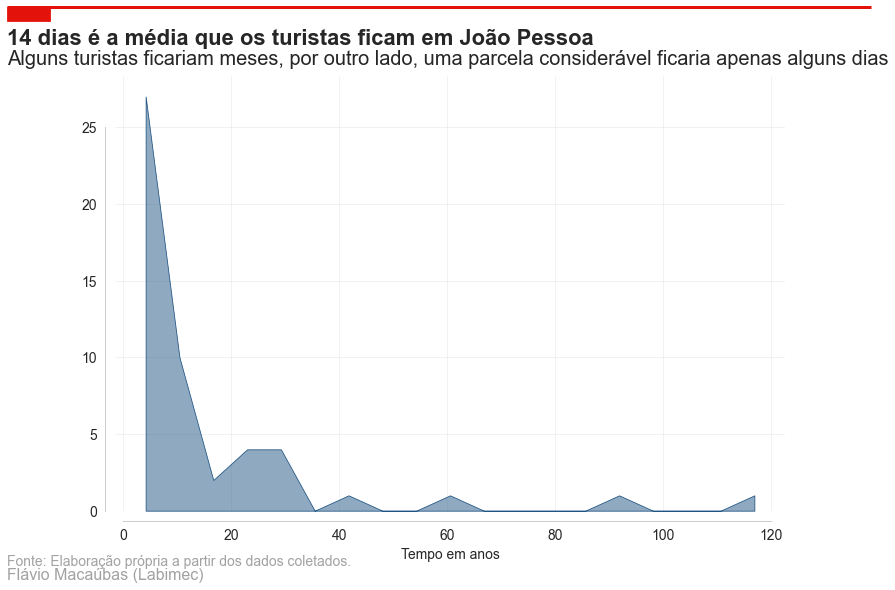

In [81]:
# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))



# Estética
template_grafico(TITULO = "14 dias é a média que os turistas ficam em João Pessoa",
                SUB_TITULO = "Alguns turistas ficariam meses, por outro lado, uma parcela considerável ficaria apenas alguns dias");


fig = sns.histplot(demanda_turista['1_5_QUANTOS_DIAS_FICARA_EM_JOAO_PESSOA'], 
                  color = '#215584',
                  element="poly",
                  alpha = 0.5)


# Configurações dos eixos
ax.set(xlabel = 'Tempo em anos', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixo
sns.despine(offset=10, trim=True)

plt.show();

> 86,8% dos turistas encontraram o que procuravam na Feira

Daqueles que sentiram falta citaram os seguintes itens:

* Castanhas
* Enxoval Infantil
* Mandalas de Palha
* Biscuit
* Vestuário
* Bancos de madeira
* Uma rede específica

In [82]:
#print((demanda_turista['1_6_VOCE_ENCONTROU_O_QUE_PROCURAVA_NA_FEIRA'].value_counts(normalize = True)*100))

In [83]:
#print((demanda_turista['1_7_SENTIU_FALTA_DE_ALGUM_PRODUTO'].value_counts(normalize = True)*100))

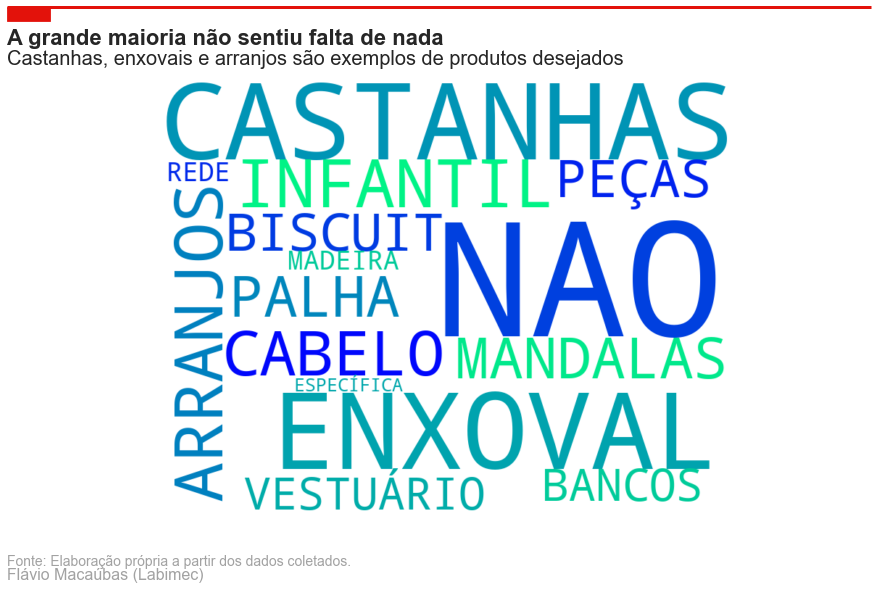

In [84]:
#@title
# Criando texto dos turista_falta_produto
turista_falta_produto = demanda_turista.loc[demanda_turista['1_7_SENTIU_FALTA_DE_ALGUM_PRODUTO'] != 'NAN', '1_7_SENTIU_FALTA_DE_ALGUM_PRODUTO'].values
turista_falta_produto = list(turista_falta_produto)
turista_falta_produto = ' '.join(turista_falta_produto)
turista_falta_produto = turista_falta_produto.split()
turista_falta_produto = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in turista_falta_produto] # Retira caracteres indesejados
turista_falta_produto = [pal for pal in turista_falta_produto if pal not in STOP_WORD_PT] # Retira stop word



turista_falta_produto = ' '.join(turista_falta_produto)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 2,
                      background_color = 'white').generate(turista_falta_produto)


template_grafico(TITULO = "A grande maioria não sentiu falta de nada",
                SUB_TITULO = "Castanhas, enxovais e arranjos são exemplos de produtos desejados");

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Graficos/turista_desejos.png", dpi=1200, bbox_inches = "tight");
plt.show()

> Uma grande parte dos turistas **gostaram de tudo**

Peças de madeira e crochê foram bastantes citadas. Há uma grande diversidade de respostas o que indica que, possivelmente, a diversidade foi um fator determinante para o agrado dos turistas.

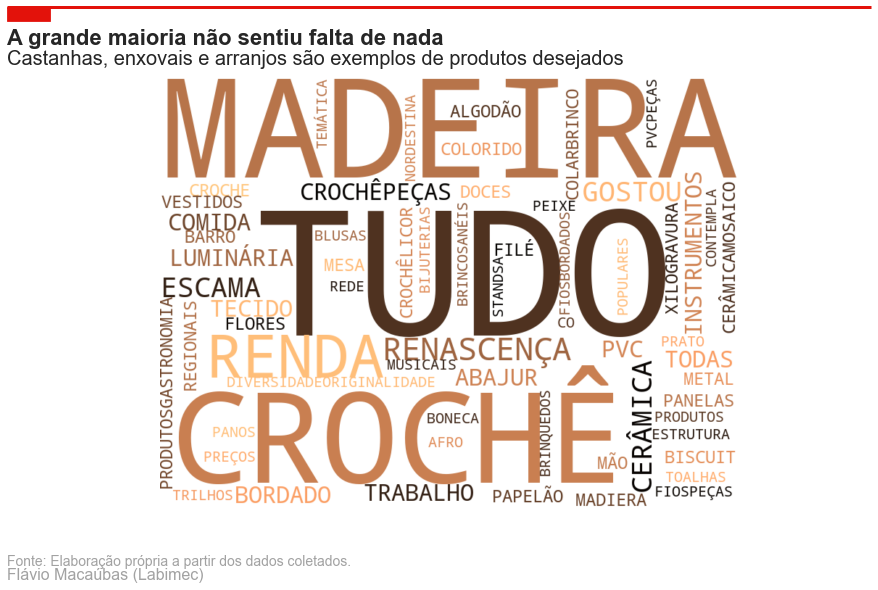

In [85]:
#@title
# Criando texto dos turista_gostaram
turista_gostaram = demanda_turista.loc[demanda_turista['1_8_DO_QUE_MAIS_GOSTOU'] != 'NAN', '1_8_DO_QUE_MAIS_GOSTOU'].values
turista_gostaram = list(turista_gostaram)
turista_gostaram = ' '.join(turista_gostaram)
turista_gostaram = turista_gostaram.split()
turista_gostaram = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in turista_gostaram] # Retira caracteres indesejados
turista_gostaram = [pal for pal in turista_gostaram if pal not in STOP_WORD_PT] # Retira stop word
turista_gostaram = [pal for pal in turista_gostaram if pal != 'PEÇAS'] # Retirando palavra peças
turista_gostaram = [pal for pal in turista_gostaram if pal != 'ARTESANATO'] # Retirando palavra peças



turista_gostaram = ' '.join(turista_gostaram)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='copper',
                      random_state = 2,
                      background_color = 'white').generate(turista_gostaram)


template_grafico(TITULO = "A grande maioria não sentiu falta de nada",
                SUB_TITULO = "Castanhas, enxovais e arranjos são exemplos de produtos desejados");

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Graficos/turista_faltas.png", dpi=1200, bbox_inches = "tight");
plt.show()

> Os turista **gastaram em média R\$ 167,00** 

Houve uma grande dispersão entre as respostas dos turistas. Em alguns casos chegaram a gastar mais de 800 reais. 

~~~
Tabela - Estatística descritiva do gasto dos turistas com artesanato local
~~~

|       |   1_9_QUANTO_COMPROU_DE_ARTESANATO_NESSA_VIAGEM |
|:------|------------------------------------------------:|
| count |                                           53    |
| mean  |                                          167.92 |
| std   |                                          291.27 |
| min   |                                            0    |
| 25%   |                                            0    |
| 50%   |                                           35    |
| 75%   |                                          150    |
| max   |                                         1100    |

In [86]:
#print(round(demanda_turista['1_9_QUANTO_COMPROU_DE_ARTESANATO_NESSA_VIAGEM'].describe(),2).to_markdown())

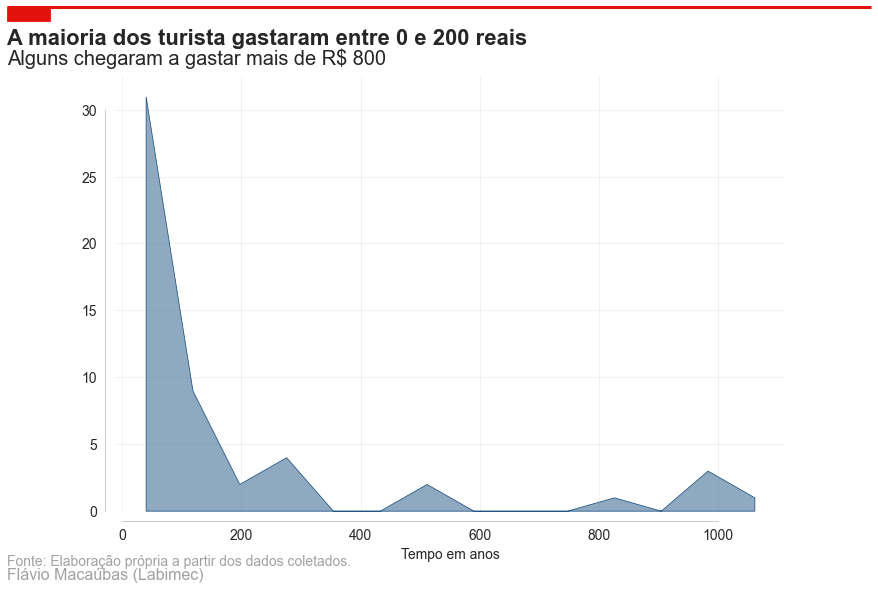

In [87]:
# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Estética
template_grafico(TITULO = "A maioria dos turista gastaram entre 0 e 200 reais",
                SUB_TITULO = "Alguns chegaram a gastar mais de R$ 800");


fig = sns.histplot(demanda_turista['1_9_QUANTO_COMPROU_DE_ARTESANATO_NESSA_VIAGEM'], 
                  color = '#215584',
                  element = 'poly',
                  alpha = 0.5)


# Configurações dos eixos
ax.set(xlabel = 'Tempo em anos', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixo
sns.despine(offset=10, trim=True)
#plt.savefig("Graficos/turista_gastos.png", dpi=1200, bbox_inches = "tight");
plt.show();

> 52,8 dos turista preferem o **artesanato tradicional**

Apenas 5% preferem artesanato contemporâneo, 41% não soube responder.

> 43,39% dos turistas indicaram que a compra foi para **uso próprio**

Presente representa 15% das respostas e 41,50% não quiseram opinar.

In [88]:
#print(demanda_turista['1_10_COMPROU_PRINCIPALMENTE'].value_counts(normalize = True)*100)

In [89]:
#print(demanda_turista['1_12_DESTINO_DA_COMPRA'].value_counts(normalize = True)*100)

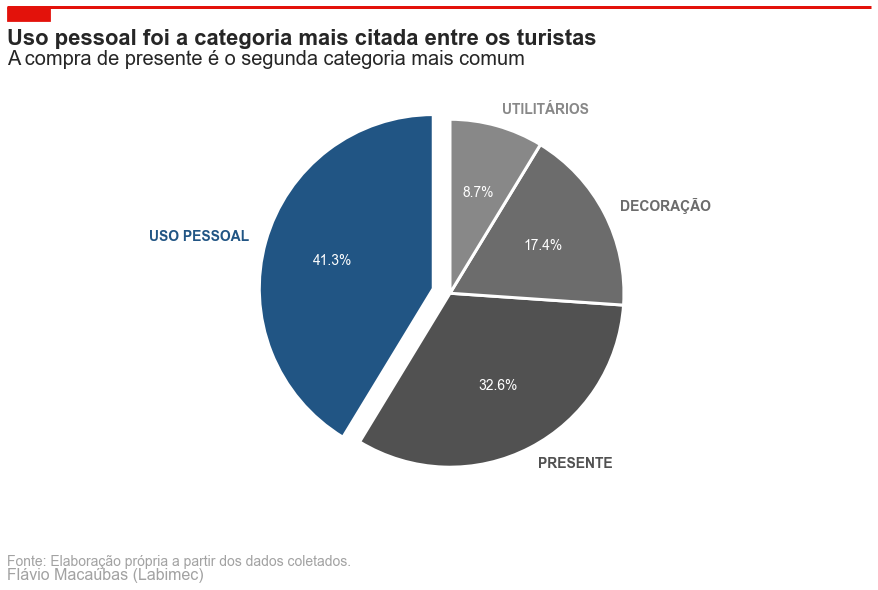

In [90]:
# Informações
uso_compra_turista = demanda_turista['1_11_O_ARTESANATO_QUE_VOCE_COMPROU_FOI_DE_USO'].values    
uso_compra_turista = list(uso_compra_turista)

# Separa as opções selecionadas
uso_compra_turista = [item.split(',') if ',' in item else item for item in uso_compra_turista]

# Cria uma nova lista onde cada opção é 1 elemento
uso_compra_turista_final = []
for opcao in uso_compra_turista:
    if isinstance(opcao, list):
        for opcao_2 in opcao: 
            uso_compra_turista_final.append(opcao_2.strip())
    else:
        uso_compra_turista_final.append(opcao.strip())

# Cria dicionário de frequência
RESPOSTAS = ['USO PESSOAL',
             'DECORAÇÃO',
             'PRESENTE',
             'UTILITÁRIOS']

freqs = {'RESPOSTA':RESPOSTAS, 'QUANTIDADE':[0,0,0,0]}

for resp in uso_compra_turista_final:
    if resp == RESPOSTAS[0]:
        freqs['QUANTIDADE'][0] += 1
    elif resp == RESPOSTAS[1]:
        freqs['QUANTIDADE'][1] += 1
    elif resp == RESPOSTAS[2]:
        freqs['QUANTIDADE'][2] += 1
    elif resp == RESPOSTAS[3]:
        freqs['QUANTIDADE'][3] += 1


# Cria data frame com frequência das respostas
uso_compra_turista_df = pd.DataFrame(freqs)

# Cria porcentagem
uso_compra_turista_df['PORCENTAGEM'] = uso_compra_turista_df.QUANTIDADE*100/uso_compra_turista_df.QUANTIDADE.sum()     

# Ordena as listas
uso_compra_turista_df = uso_compra_turista_df.sort_values('PORCENTAGEM', ascending = False)

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[0] = '#215584'

# Gráfico de pizza
values = uso_compra_turista_df['QUANTIDADE']
names = uso_compra_turista_df['RESPOSTA']

patchs, texts, pcts = ax.pie(
    values, labels=names, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0.1, 0, 0, 0))

for i, patch in enumerate(patchs):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600);

# Estética
sns.despine(offset=10, trim=True)


template_grafico(TITULO = "Uso pessoal foi a categoria mais citada entre os turistas",
                SUB_TITULO = "A compra de presente é o segunda categoria mais comum");

> **Beleza do produto** foi responsável por 37,7% das escolhas dos turistas


~~~
Tabela - Principais razões para compra do artesanato pelos turistas
~~~
|           |   1_13_PRINCIPAL_MOTIVACAO_DA_COMPRA |
|:----------|-------------------------------------:|
| NÃO RESPONDEU       |                                41.51 |
| BELEZA    |                                37.74 |
| PREÇO     |                                 9.43 |
| UTILIDADE |                                 7.55 |
| NOVIDADE  |                                 3.77 |


> 58% dos turistas são **frequentadores ocasionais** de feiras de artesanato

O número de frequentadores assíduos é consideravelmente maior do que os turistas locais.

In [91]:
motivacao_compra_turista = demanda_turista['1_13_PRINCIPAL_MOTIVACAO_DA_COMPRA'].value_counts(normalize = True)*100

#print(round(motivacao_compra_turista,2).to_markdown())

In [92]:
#print(demanda_turista['1_14_VOCE_SE_CONSIDERA_UM_COMPRADOR_DE_ARTESANATO'].value_counts(normalize = True)*100)

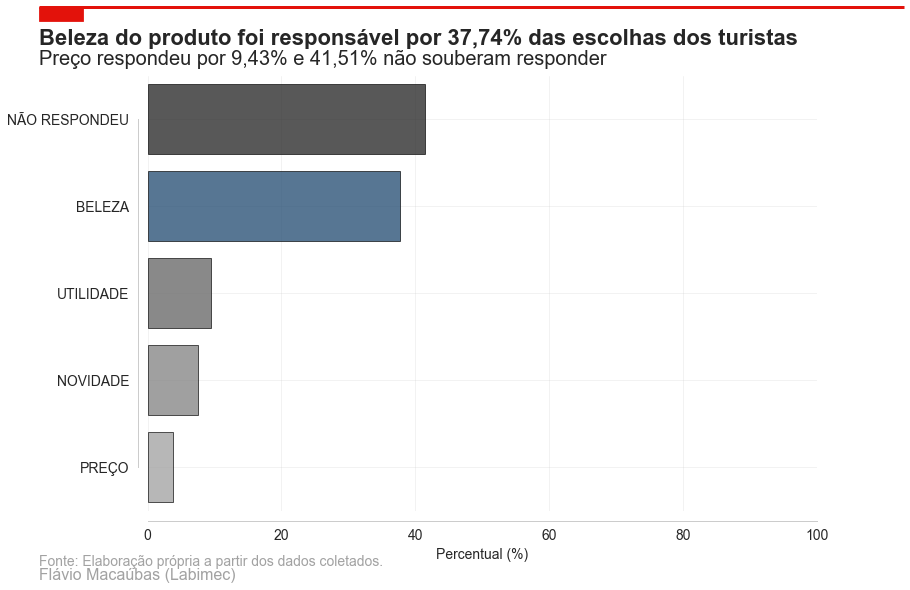

In [93]:
#@title

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Diferentes tons de cinza
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.45, 5)))

# Cor em destaque
colors[1] = '#215584'
 

# Paleta de cores
pal = sns.color_palette('crest', 10)
pal = list(pal.as_hex())

# Estética
template_grafico(TITULO = "Beleza do produto foi responsável por 37,74% das escolhas dos turistas",
                SUB_TITULO = "Preço respondeu por 9,43% e 41,51% não souberam responder");

# Ajustando labels
LABELS = list(motivacao_compra.index)
LABELS[0] = 'NÃO RESPONDEU'

# Gráfico
ax = sns.barplot(y = LABELS,
                 x = motivacao_compra_turista.values,
                 data = clientes,
                 palette=colors,
                 alpha = 0.8,
                 edgecolor='black')

# Configurações dos eixos
ax.set(xlabel = 'Percentual (%)', 
       ylabel = '')

# Limite do eixo para melhor visualização
ax.set_xlim(0,100)

# Opacidade do grid
ax.grid(alpha = 0.3)

# Estética
sns.despine(offset=10, trim=True)

> O número de peças de artesanato que os turistas possuem em casa é **similar** a quantidade de peças que são da Paraíba

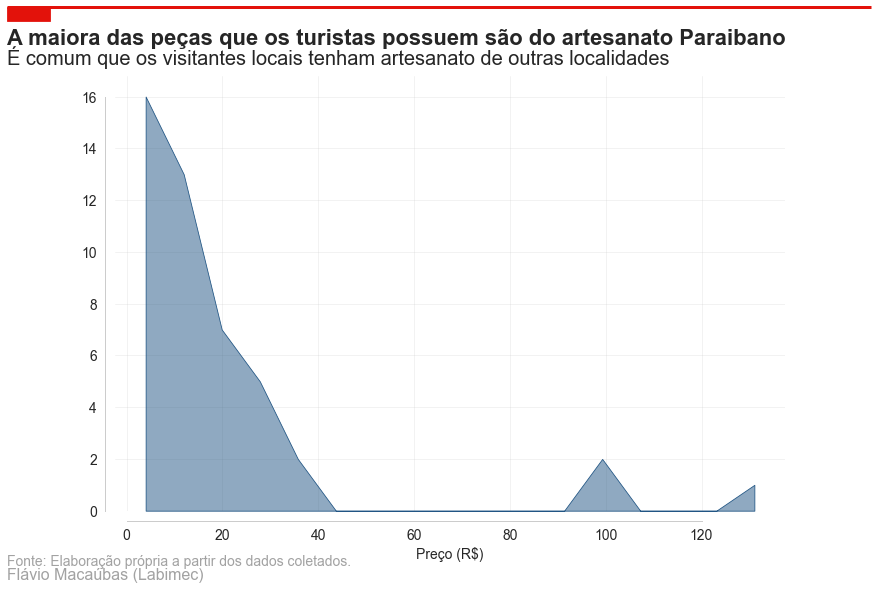

In [94]:
# Informação
demanda_turista['DIF_PECA_LOCAL'] = demanda_turista['1_15_QUANTAS_PECAS_DE_ARTESANATO_VOCE_ESTIMA_TER_EM_SUA_CASA'] - demanda_turista['1_16_QUANTAS_SAO_DO_ARTESANATO_PARAIBANO']

# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Estética
template_grafico(TITULO = "A maiora das peças que os turistas possuem são do artesanato Paraibano",
                SUB_TITULO = "É comum que os visitantes locais tenham artesanato de outras localidades");


fig = sns.histplot(demanda_turista['DIF_PECA_LOCAL'], 
                   color = '#215584',
                   element = 'poly',
                   alpha = 0.5)


# Configurações dos eixos
ax.set(xlabel = 'Preço (R$)', 
       ylabel = '')

# Opacidade do grid
ax.grid(alpha = 0.3)

# Eixo
sns.despine(offset=10, trim=True)

plt.show();

> Trabalho bem feito, criatividade, originalidade e acabamento foram feedbacks dados pelos turistas.

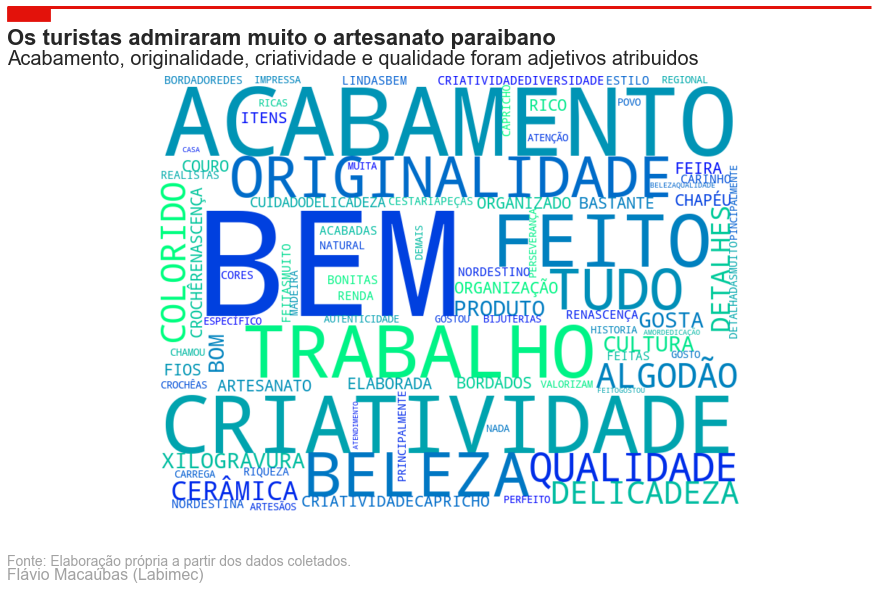

In [95]:
#@title
# Criando texto dos turista_admiracao
turista_admiracao = demanda_turista.loc[demanda_turista['1_17__O_QUE_MAIS_ADMIRA_NO_ARTESANATO_PARAIBANO'] != 'NAN', '1_17__O_QUE_MAIS_ADMIRA_NO_ARTESANATO_PARAIBANO'].values
turista_admiracao = list(turista_admiracao)
turista_admiracao = ' '.join(turista_admiracao)
turista_admiracao = turista_admiracao.split()
turista_admiracao = [pal.replace('(','').replace(')','').replace('.','').replace(',','').strip() for pal in turista_admiracao] # Retira caracteres indesejados
turista_admiracao = [pal for pal in turista_admiracao if pal not in STOP_WORD_PT] # Retira stop word
turista_admiracao = [pal for pal in turista_admiracao if pal != 'PEÇAS']


turista_admiracao = ' '.join(turista_admiracao)


# Dimensões
fig, ax = plt.subplots(figsize=(12, 8))

# Create the wordcloud object
wordcloud = WordCloud(width=800, 
                      height=600, 
                      margin=0, 
                      colormap='winter',
                      random_state = 2,
                      background_color = 'white').generate(turista_admiracao)


template_grafico(TITULO = "Os turistas admiraram muito o artesanato paraibano",
                SUB_TITULO = "Acabamento, originalidade, criatividade e qualidade foram adjetivos atribuidos");

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("Graficos/turista_desejos.png", dpi=1200, bbox_inches = "tight");
plt.show()

## Considerações Finais


### Quem é o artesão?

A maioria dos artesões são de João Pessoa (57,14%), possuem idade média de 55 anos e moram na cidade em média a 25 anos. A grande maioria possue ensino médio completo e aprenderam o ofício através de parentes e do autodidatismo. A maioria deles são casados (46,2%) e 61,34% alegaram que possuem membros da família do artesanato - em que os parentes diretos são os mais comuns. A maior parcela dos profissionais são cooperados/associados em que Associação de Artesãos de Cabedelo é a mais citada. Aproximadamente 69% deles não são formalizados.

A maior parcela dos artesãos ensinaram entre 1-5 pessoas, todavia, uma parcela considerável já ensinou pra mais de 100 pessoas. Metade deles fizeram algum curso de artes e o maior número possuem mais de 20 anos de experiência.

Os profissionais preferem trabalhar com artigo de decoração (43,7%) - bonecas, bolsas, vestuários, esculturas e mesas são os produtos preferidos pelos artesãos. As matérias-primas mais utilizadas são fios, tecidos e madeira. Os artesãos se expiram para produzir seu trabalho em sua história pessoal, mais de 60% deles são da Paraíba e mais de quarenta já moraram em algum município da Paraíba. As regiões Norte e Sudeste são as mais representativas quando desconsiderado o nordeste.

Cerca de 84% dos artesãos alegaram que não contrataram ajudantes, daqueles que contrataram, a média é de 6 colaboradores. A maior parcela dos artesãos (76%) alegam que desejam participar de algum curso de capacitação. Os maiores desejos estão em como criar novos produtos de sucesso e como divulgar seu trabalho em redes sociais - a rede social mais comum é o Instagram.

A maior parcela respondeu que o artesanato é sua atividade principal. Mais de 90% da clientela é nacional se dividindo, em grau de participação, em pessoas da região, do estado, do país. A parcela predominante trabalham entre 6h e 8h por dia. Corroborando a informação de ajudantes, a maioria dos artesãos trabalham sozinhos.

Os produtos mais vendidos são de vestuários, bonecas e chaveiros. A média de preços do atacado é 14,6% menor do que no varejo. Os principais determinantes do preço são o tempo de trabalho e a matéria prima gasta, esta última, é majoritariamente adquirida na cidade do artesão.

No geral, os artesão não possuem excesso de estoque, a grande maioria acerta na quantidade de peças produzidas e vendidas. Entre aqueles que tem o artesanato como atividade principal, a renda média nos melhores meses é de 2150,00 reais por mês, nos piores meses chega a 745,00 por mês.

Os artesãos que possuem o artesanato como atividade principal faturam, em média, 28,58% mais nos melhores meses. Quando considerado os piores meses, esse percentual é um pouco maior, chegando a 29,34%. O local de maior venda relatado pelos artesãos são as feiras.

O principal anseio dos artesãos é o aumento de vendas, alarmantemente, apenas 5,95% deles desejam se formalizar. Dificuldades com espaço e condições de trabalho foi citada por 34,3% dos artesões como a principal carência, seguidos por acesso ao crédito com 20,7%.

O principal objetivo dos artesãos é de cunho pessoal - 43,3% desejam melhorar a qualidade de vida e 27% desejam conhecer mais lugares e pessoas. Quando consideramos esses dois elementos juntos, 70,3% dos desejam são relacionados ao aspecto privado (não profissional). Aproximadamente 80% dos entrevistados relataram que desejam participar de uma feira dominical no centro de João Pessoa.

As principais sugestões dos artesãos vão na mesma direção das carência relatadas - apoio, incentivo, transporte, eventos e feiras são exemplos de eixos relatados.

### Quem é o consumidor local?

A maioria dos visitantes locais moram na região da praia - os bairros mais citados são Cabo Branco (11,9%) e Bancários (10,9%). Mais de 50% deles relataram que vivem com a família, quando consideramos companheiros(as), o montante chega a 77,2%. A maioria deles nasceram em João Pessoa, seguidos e Rio de Janeiro (7,9%) e São Paulo (5,9%). A Paraíba é responsável por 63% da origem dos consumidores locais.

Os consumidores locais moram, em média, há 10 anos em João Pessoa. A esmagadora maioria (92%) encontram o que procuravam nas feiras e 75% não sentiu falta de nada. Peças de crochê, madeira e cerâmica são as prediletas dentre estes consumidores. O gasto média dos visitantes locais foi de 111 reais - a maior parte gastou até 100 reais.

Cerca de 43% dos consumidores locais preferem o artesanato tradicional. A maior parte (55,4%) relataram que compraram itens de uso pessoal ou decoração. A principal razão para compra dos produtos foi a beleza (34,6%), o fator preço foi o menos determinante - apenas 7,9%. Aproximadamente 72% dos entrevistados relataram que vão a ferias ocasionalmente e maior parte dos artesanatos que possuem são da Paraíba.

A principal sugestão dos consumidores locais é a divulgação - mais feiras, apoio ao artesanato e divulgação são exemplos de sugestões. Recomenda-se que este item seja avaliado individualmente para que boas propostas sejam melhor entedidas e visualizadas. 

### Quem é o consumidor turista?

Turistas de São Paulo e Paraíba são a maioria e representam, cada um, 13,2% dos entrevistados. Aproximadamente 56% dos turistas visitaram João Pessoa com a família, quando consideramos companheiros este montante chega a 88,7% - eles ficam em média 14 dias na cidade.

Cerca de 86% deles encontram o que procuravam na Feira de Artesanato, aqueles que não encontraram relataram os seguintes itens: castanhas, enxoval infantil, mandalas de palha, biscuit, vestuário, bancos de madeira e uma rede específica. A maior parte dos turistas gostaram de tudo, castanhas, enxovais e arranjos são exemplos de produtos apreciados.

O gasto médio destes consumidores foi de 167 reais - cerca de 50% maior que os turistas locais. A maior parte dos turistas gastaram até 200 reais - intervalo superior ao consumidor local. Cerca de 53% dos entrevistados relataram preferir artesanato tradicional e 43% indicaram compras para uso próprio. Assim como os consumidores locais, a beleza dos produtos foi o principal fator determinante de compra. Em contraponto, o preço perfomou melhor entre os turias representando 9,43% das decisões - a maior parcela dos turistas são frequentadores ocasionais de feiras de artesanato.

Igualmente ao consumidores locais, a maior parte das peças de artesanatos do turistas também são da Paraíba. A maior parcela deles não sentiram falta de nada e elogiaram fatrores como criatividade, acabamento, originalidade, qualidade e beleza.

In [96]:
!jupyter nbconvert C:/Users/Macaubas/Desktop/Python/Labimec/Artesanato/Analise/ARTESANATO_PB.ipynb --to=html --TemplateExporter.exclude_input=True


[NbConvertApp] Converting notebook C:/Users/Macaubas/Desktop/Python/Labimec/Artesanato/Analise/ARTESANATO_PB.ipynb to html
[NbConvertApp] Writing 8584604 bytes to C:\Users\Macaubas\Desktop\Python\Labimec\Artesanato\Analise\ARTESANATO_PB.html
